In [205]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# **Data Reading**


In [147]:
data = pd.read_csv("../data/raw_data.csv")
data["seller_id"] = data["seller_id"].astype("str")
data.head()

element_id    site_id   seller_id   Dominio_normalizado   
0  ARG1000130348  ARGENTINA   924394736   COMPUTER_PROCESSORS  \
1  ARG1002056504  ARGENTINA    60385780     COMPUTER_MONITORS   
2  ARG1002630435  ARGENTINA  1085316688            SUNGLASSES   
3  ARG1003499360  ARGENTINA   189266308  HARD_DRIVES_AND_SSDS   
4  ARG1004623658  ARGENTINA   127503700    RAM_MEMORY_MODULES   

                                              Titulo     Marca    Precio Rule   
0  Microprocesador Intel Core I3 12100 12mb Bx807...     Intel  222599.0  NaN  \
1  Monitor Gamer Samsung Con Pantalla De 25  60hz...   Samsung  767000.0  NaN   
2  Anteojos De Sol Polarizados Ray-ban Erika Clas...   Ray-Ban  246510.0  NaN   
3  Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...  Kingston  179999.0  NaN   
4  Memoria Ram Valueram Color Verde 8gb 1 Kingsto...  Kingston   22399.0  NaN   

   Score  Total  Moderado  Fake  Rollback  FK_TEST1  FK_TEST2  
0   0.11      1         0     0         0         0         0  
1   0.29      1         0     0         0         0         0  
2   0.51      1         0     0         0         0         0  
3   0.32      1         0     0         0         0         0  
4   0.80      1         0     0         0         0         0

In [151]:
data.dtypes

element_id              object
site_id                 object
seller_id               object
Dominio_normalizado     object
Titulo                  object
Marca                   object
Precio                 float64
Rule                    object
Score                  float64
Total                    int64
Moderado                 int64
Fake                     int64
Rollback                 int64
FK_TEST1                 int64
FK_TEST2                 int64
dtype: object

# **Vendor Analysis**


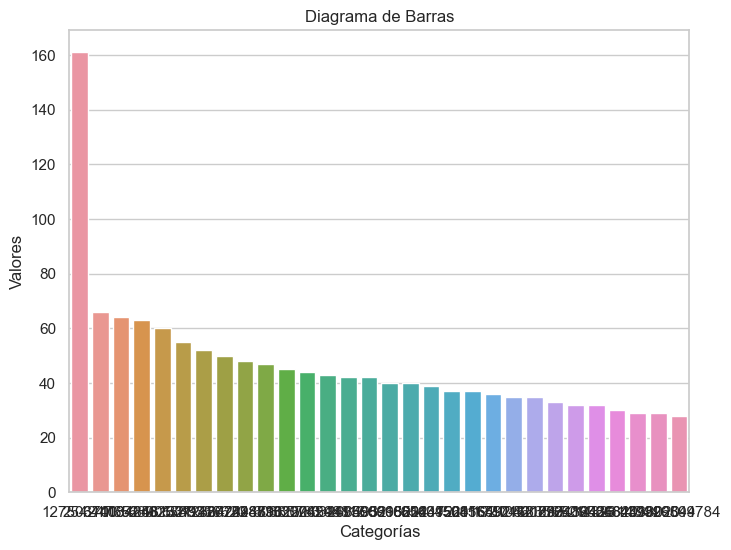

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtered = data.groupby("seller_id")["Fake"].sum().reset_index()
df_filtered = df_filtered.sort_values(by="Fake", ascending=False).head(30)

plt.figure(figsize=(8, 6))

sns.barplot(x="seller_id", y="Fake", data=df_filtered)

# Personalizar el gráfico
plt.title("Diagrama de Barras")
plt.xlabel("Categorías")
plt.ylabel("Valores")
plt.show()

In [156]:
df_filtered

seller_id  Fake
113    127503700   161
412    254247652    66
880    644034648    64
86    1184256132    63
819   5689057492    60
687   4625372304    55
191   1588356620    52
67    1142674448    50
1070   877298796    48
409   2528810220    47
853     60385780    45
579   3330742488    44
765    526594116    43
574    331664932    42
401   2495083952    42
805    560968004    40
809   5618522472    40
894    665601564    39
154   1434500164    37
1110   950856592    37
320   2111710412    36
289   1921052128    35
823   5716635652    35
683   4607971324    33
1069   876416436    32
427   2609586820    32
153   1432314344    30
389   2464433020    29
662    439396844    29
291   1929599784    28

# **Analysis**


## _Global Analysis_


In [78]:
data_fake = data[data["Fake"] == 1]
data_not_fake = data[data["Fake"] == 0]

In [79]:
data_fake.describe()

seller_id        Precio        Score   Total     Moderado    Fake   
count  4.489000e+03  4.489000e+03  4489.000000  4489.0  4489.000000  4489.0  \
mean   1.945295e+09  1.653326e+05     0.949664     1.0     0.880374     1.0   
std    1.801535e+09  4.580234e+05     0.040844     0.0     0.324560     0.0   
min    4.281520e+05  1.117000e+01     0.770000     1.0     0.000000     1.0   
25%    6.561662e+08  4.050000e+02     0.930000     1.0     1.000000     1.0   
50%    1.235893e+09  2.924500e+03     0.960000     1.0     1.000000     1.0   
75%    2.629176e+09  9.499000e+04     0.980000     1.0     1.000000     1.0   
max    8.880437e+09  7.999950e+06     1.000000     1.0     1.000000     1.0   

       Rollback     FK_TEST1     FK_TEST2  
count    4489.0  4489.000000  4489.000000  
mean        0.0     0.425485     0.062820  
std         0.0     0.494471     0.242666  
min         0.0     0.000000     0.000000  
25%         0.0     0.000000     0.000000  
50%         0.0     0.000000     0.000000  
75%         0.0     1.000000     0.000000  
max         0.0     1.000000     1.000000

In [80]:
data_not_fake.describe()

seller_id        Precio         Score    Total      Moderado   
count  3.588300e+04  3.588300e+04  35883.000000  35883.0  35883.000000  \
mean   1.907388e+09  2.556265e+05      0.363475      1.0      0.009085   
std    1.782149e+09  6.624338e+05      0.290475      0.0      0.094883   
min    4.281520e+05  1.290000e+01      0.000000      1.0      0.000000   
25%    6.440346e+08  7.086250e+02      0.140000      1.0      0.000000   
50%    1.216992e+09  4.499000e+03      0.280000      1.0      0.000000   
75%    2.609587e+09  1.699900e+05      0.590000      1.0      0.000000   
max    8.880437e+09  1.289990e+07      0.990000      1.0      1.000000   

          Fake      Rollback      FK_TEST1      FK_TEST2  
count  35883.0  35883.000000  35883.000000  35883.000000  
mean       0.0      0.008528      0.000195      0.000334  
std        0.0      0.091952      0.013966      0.018284  
min        0.0      0.000000      0.000000      0.000000  
25%        0.0      0.000000      0.000000      0.000000  
50%        0.0      0.000000      0.000000      0.000000  
75%        0.0      0.000000      0.000000      0.000000  
max        0.0      1.000000      1.000000      1.000000

In [134]:
33.78 * 0.1953

6.597234

In [135]:
a = data[data["Precio"] % 1 != 0]
# a.to_excel("../data/fake.xlsx", index=False)
print(
    f"""Of the {len(data)} we only have {len(a)} with decimals which correspondas to {len(a)/len(data)*100:.2f}%"""
)
print(
    f"""Of the {len(a)} with decimals, there are {a["Fake"].sum()} that are fake which constitutes {a["Fake"].sum()/len(a)*100:.2f}% of the total with decimals and {(len(a)/len(data))*(a["Fake"].sum()/len(a))*100:.2f}% of the total data"""
)
print(f"""Number of FK_PRICE with decimal: {a[a["Rule"]=="FK_PRICE"]["Fake"].sum()}""")
print(f"""Number of FK_PRICE Total: {data[data["Rule"]=="FK_PRICE"]["Fake"].sum()}""")
print(
    f"""Ratio FK_PRICE with decimal: {a[a["Rule"]=="FK_PRICE"]["Fake"].sum()/data[data["Rule"]=="FK_PRICE"]["Fake"].sum()*100:.2f}%"""
)

Of the 40372 we only have 13638 with decimals which correspondas to 33.78%
Of the 13638 with decimals, there are 2664 that are fake which constitutes 19.53% of the total with decimals and 6.60% of the total data
Number of FK_PRICE with decimal: 1743
Number of FK_PRICE Total: 2333
Ratio FK_PRICE with decimal: 74.71%


In [158]:
data_2 = data[(data["Score"] >= 0.77)]
a = data_2[(data_2["Precio"] % 1 != 0)]
# a.to_excel("../data_2/fake.xlsx", index=False)
print(
    f"""Of the {len(data_2)} we only have {len(a)} with decimals which correspondas to {len(a)/len(data_2)*100:.2f}%"""
)
print(
    f"""Of the {len(a)} with decimals, there are {a["Fake"].sum()} that are fake which constitutes {a["Fake"].sum()/len(a)*100:.2f}% of the total with decimals and {(len(a)/len(data_2))*(a["Fake"].sum()/len(a))*100:.2f}% of the total data_2"""
)
print(f"""Number of FK_PRICE with decimal: {a[a["Rule"]=="FK_PRICE"]["Fake"].sum()}""")
print(
    f"""Number of FK_PRICE Total: {data_2[data_2["Rule"]=="FK_PRICE"]["Fake"].sum()}"""
)
print(
    f"""Ratio FK_PRICE with decimal: {a[a["Rule"]=="FK_PRICE"]["Fake"].sum()/data_2[data_2["Rule"]=="FK_PRICE"]["Fake"].sum()*100:.2f}%"""
)

Of the 11670 we only have 4898 with decimals which correspondas to 41.97%
Of the 4898 with decimals, there are 2664 that are fake which constitutes 54.39% of the total with decimals and 22.83% of the total data_2
Number of FK_PRICE with decimal: 1743
Number of FK_PRICE Total: 2333
Ratio FK_PRICE with decimal: 74.71%


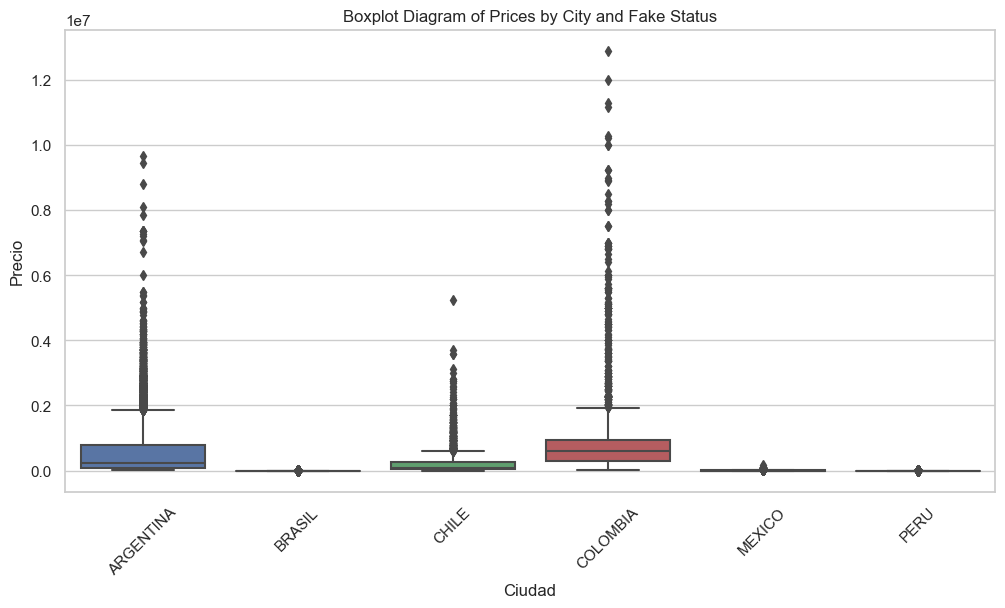

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="site_id", y="Precio")
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

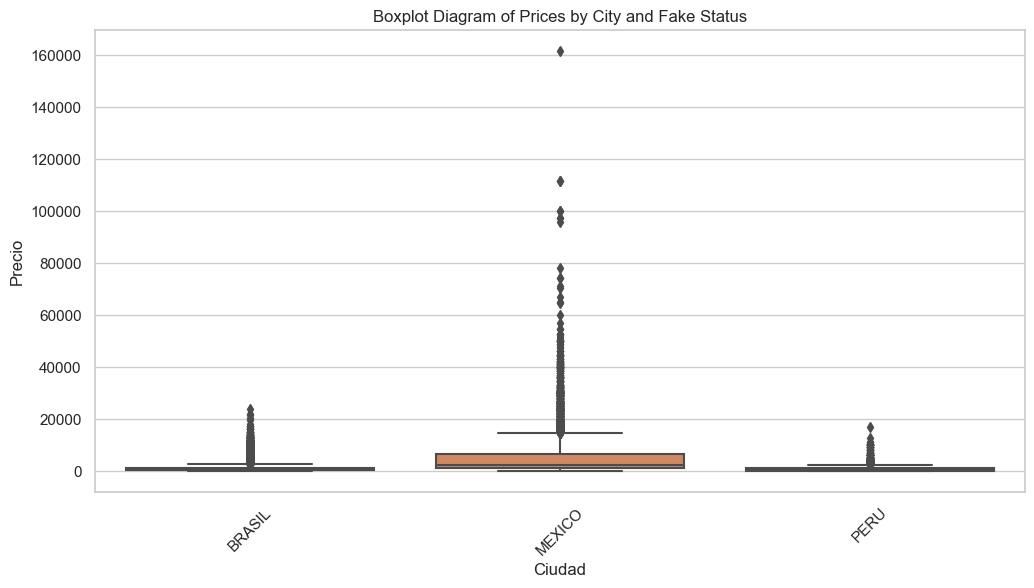

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[~data["site_id"].isin(["ARGENTINA", "COLOMBIA", "CHILE"])],
    x="site_id",
    y="Precio",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

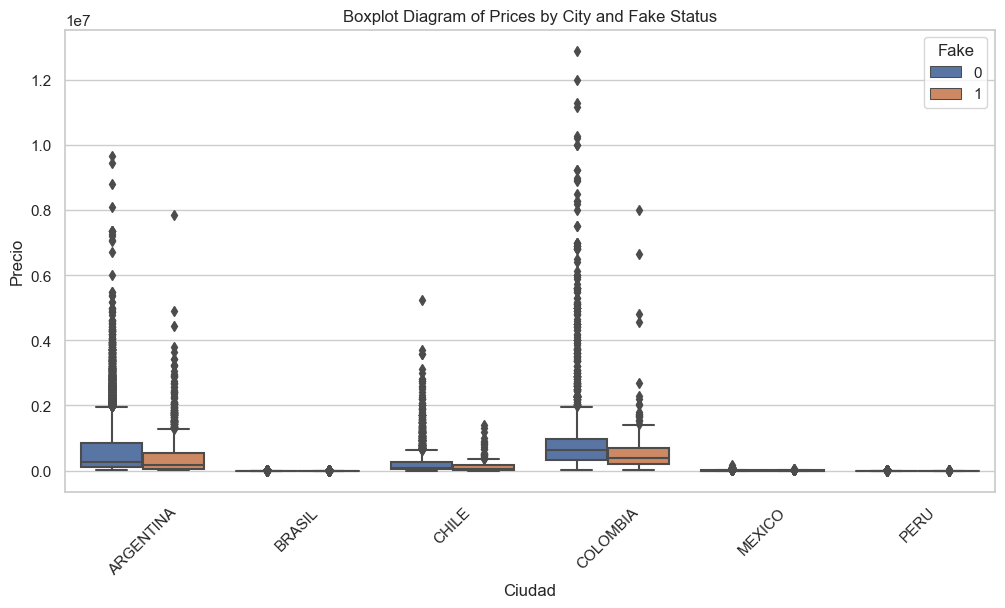

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="site_id", y="Precio", hue="Fake")
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

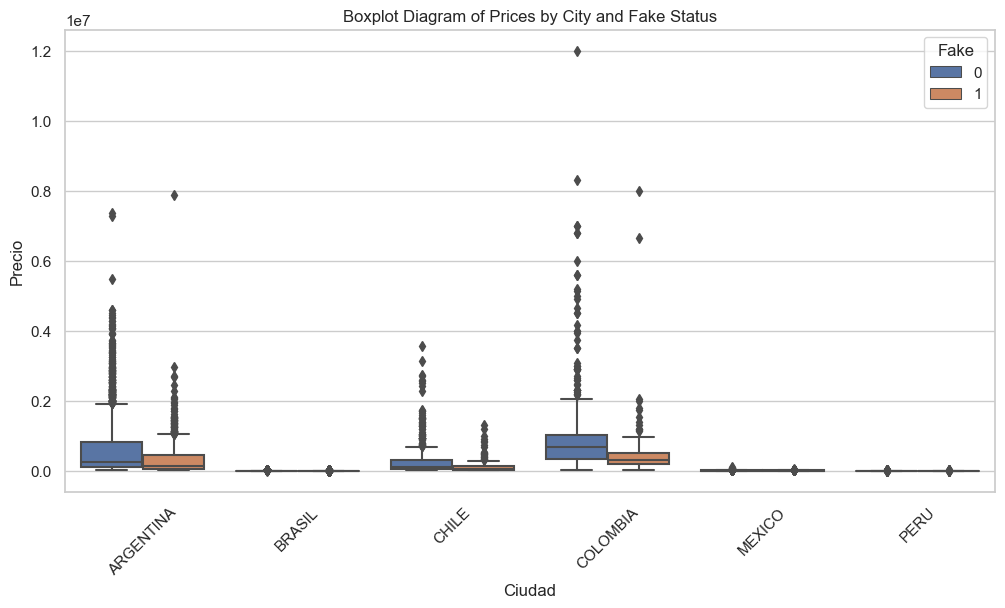

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'df' con las columnas 'ciudad' y 'precio'
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[(data["Rule"].isin([np.NaN, None, "FK_PRICE"])) & (data["Score"] > 0.76)],
    x="site_id",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)  # Rota las etiquetas si son muchas o muy largas
plt.show()

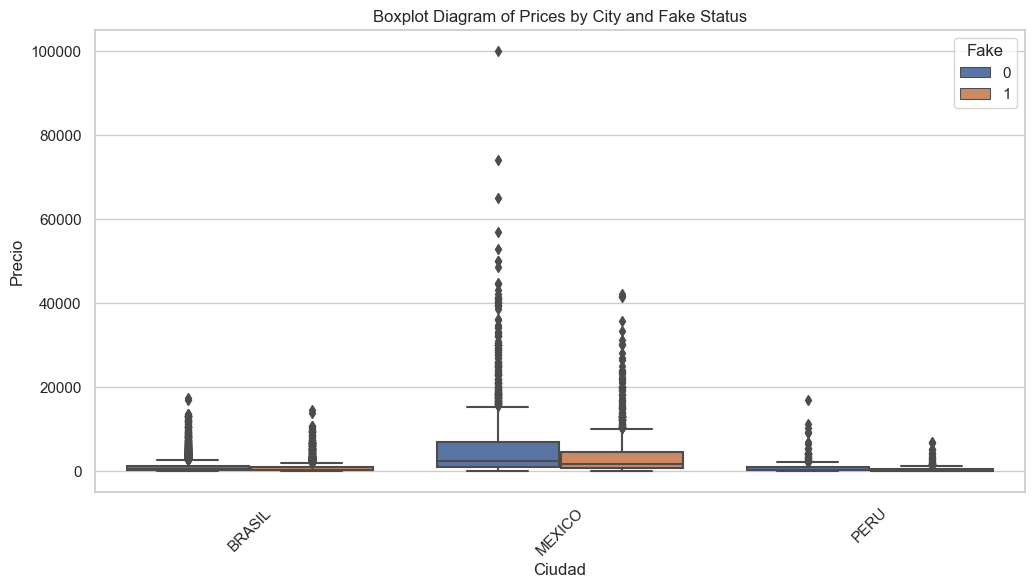

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data[
        (~data["site_id"].isin(["ARGENTINA", "COLOMBIA", "CHILE"]))
        & (data["Score"] > 0.76)
    ],
    x="site_id",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

Regions must be take into consideration in a separate way


## _Argentina_


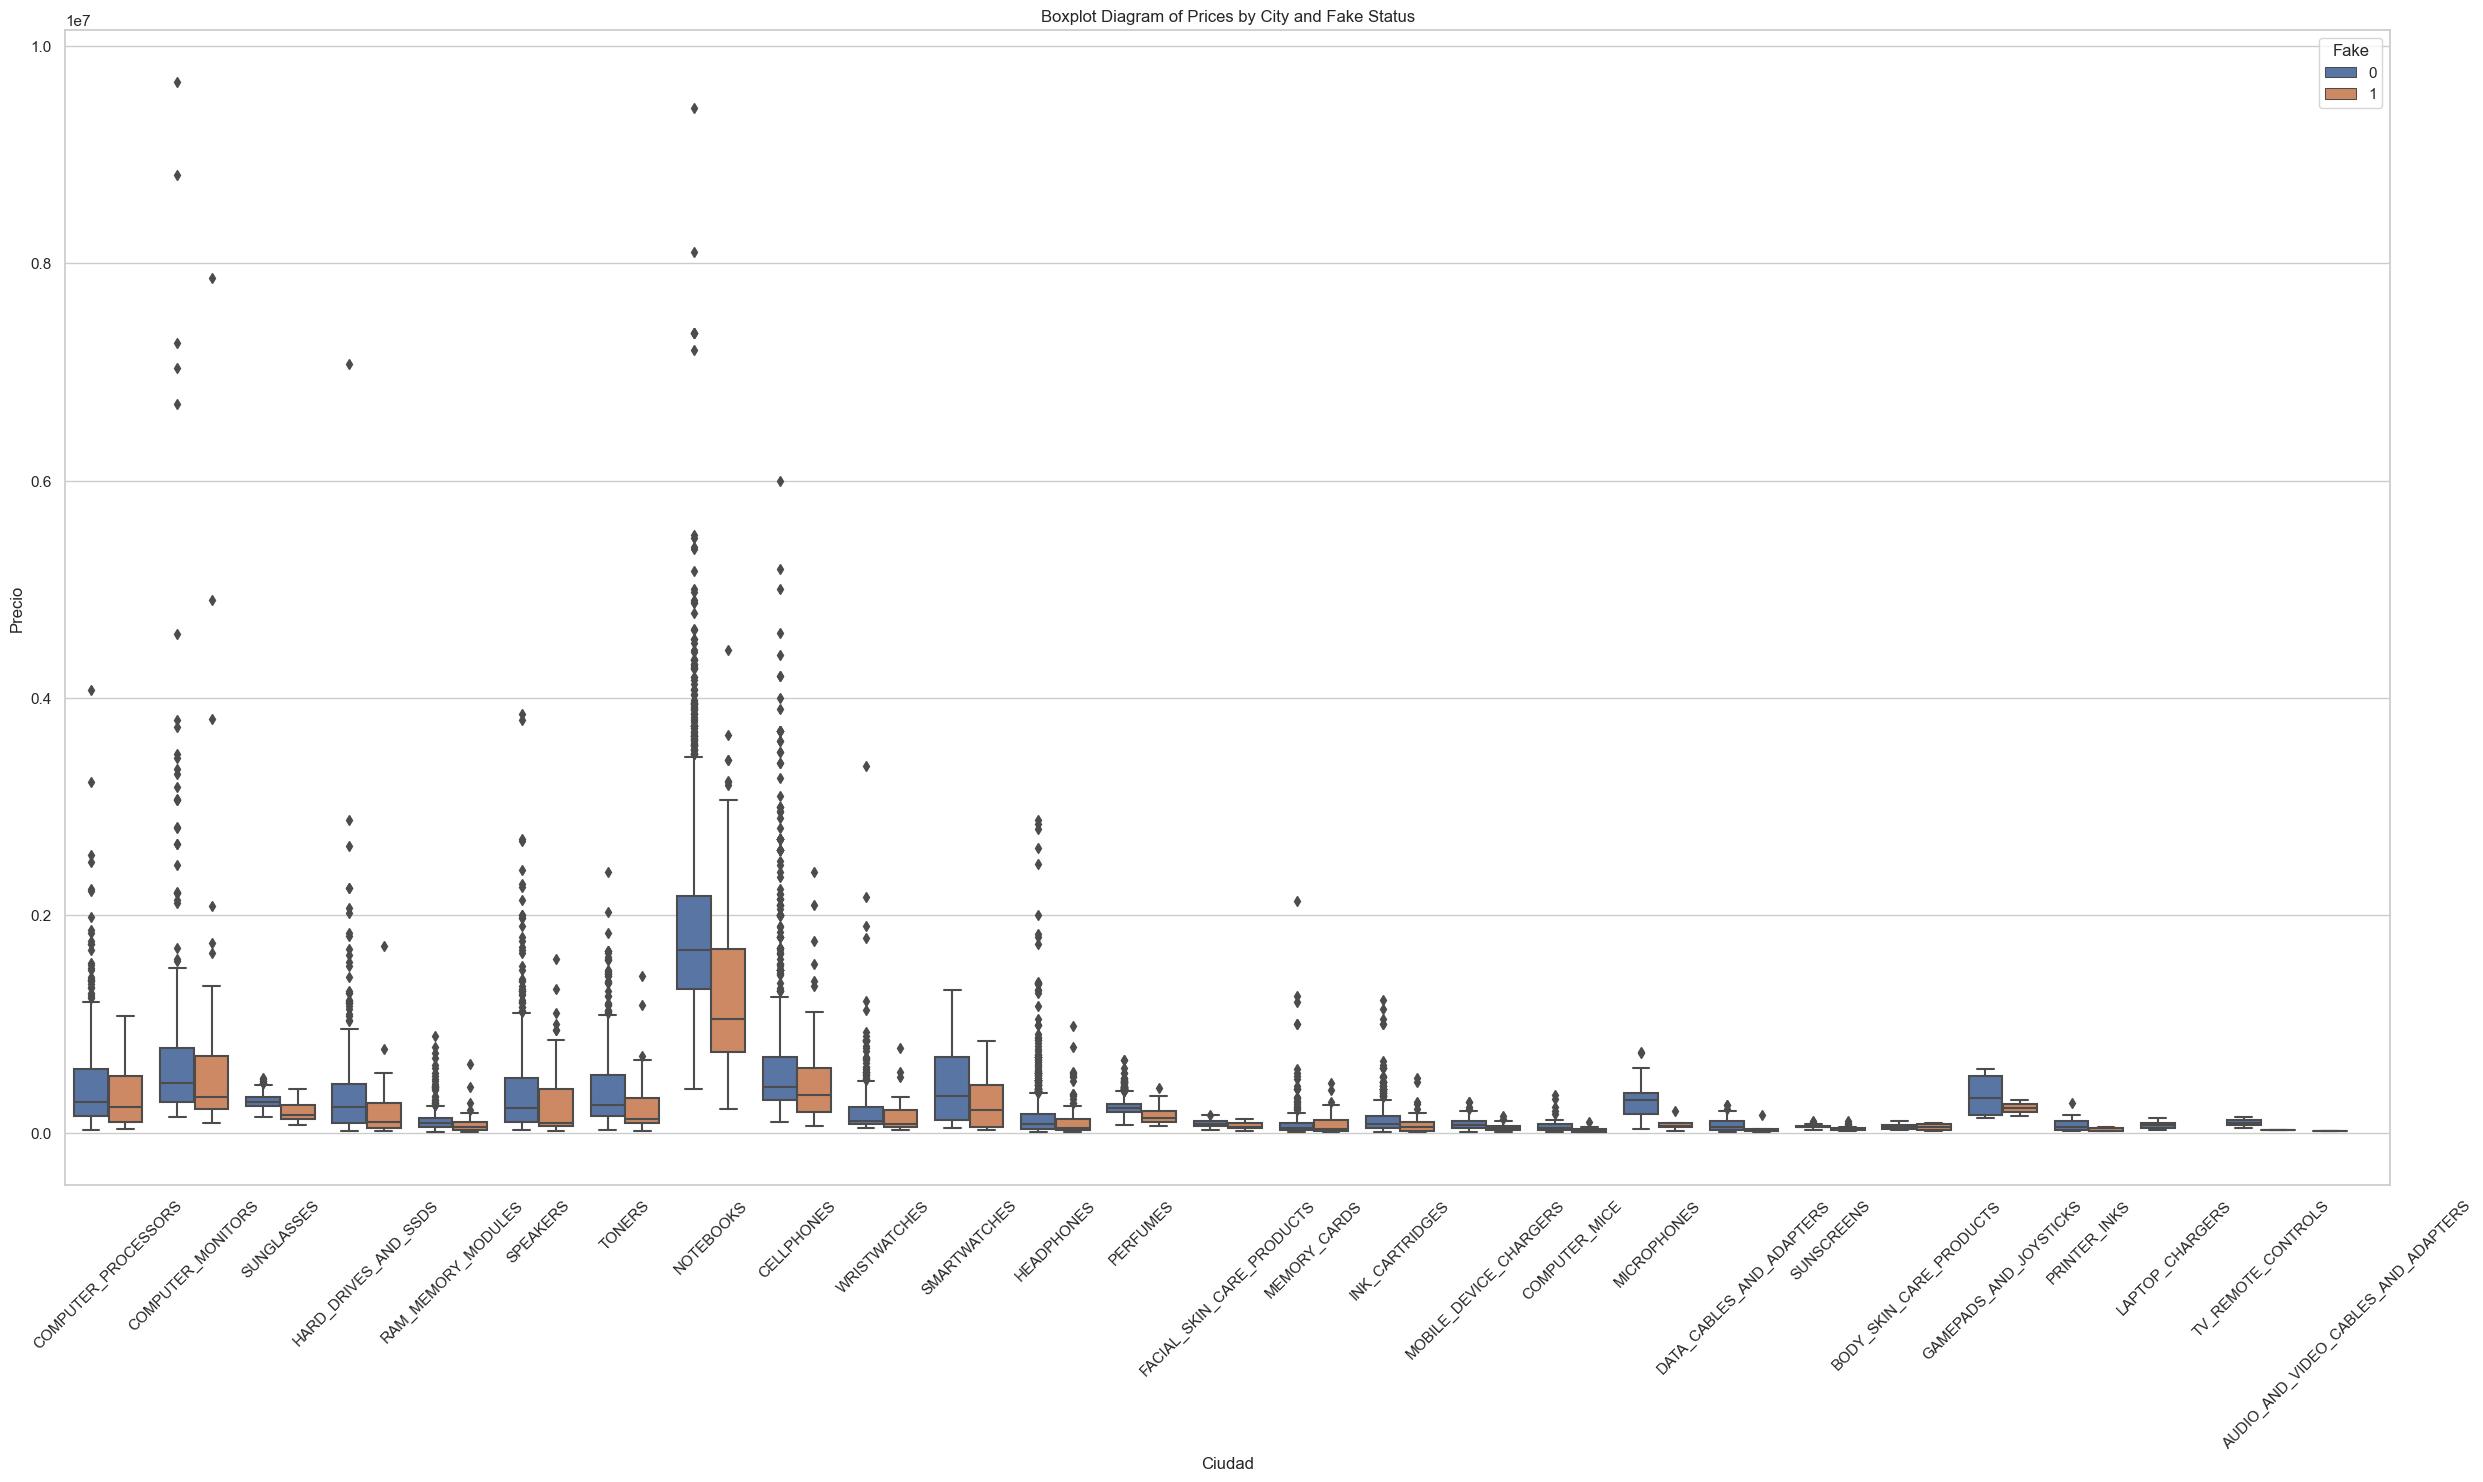

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["ARGENTINA"]))],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

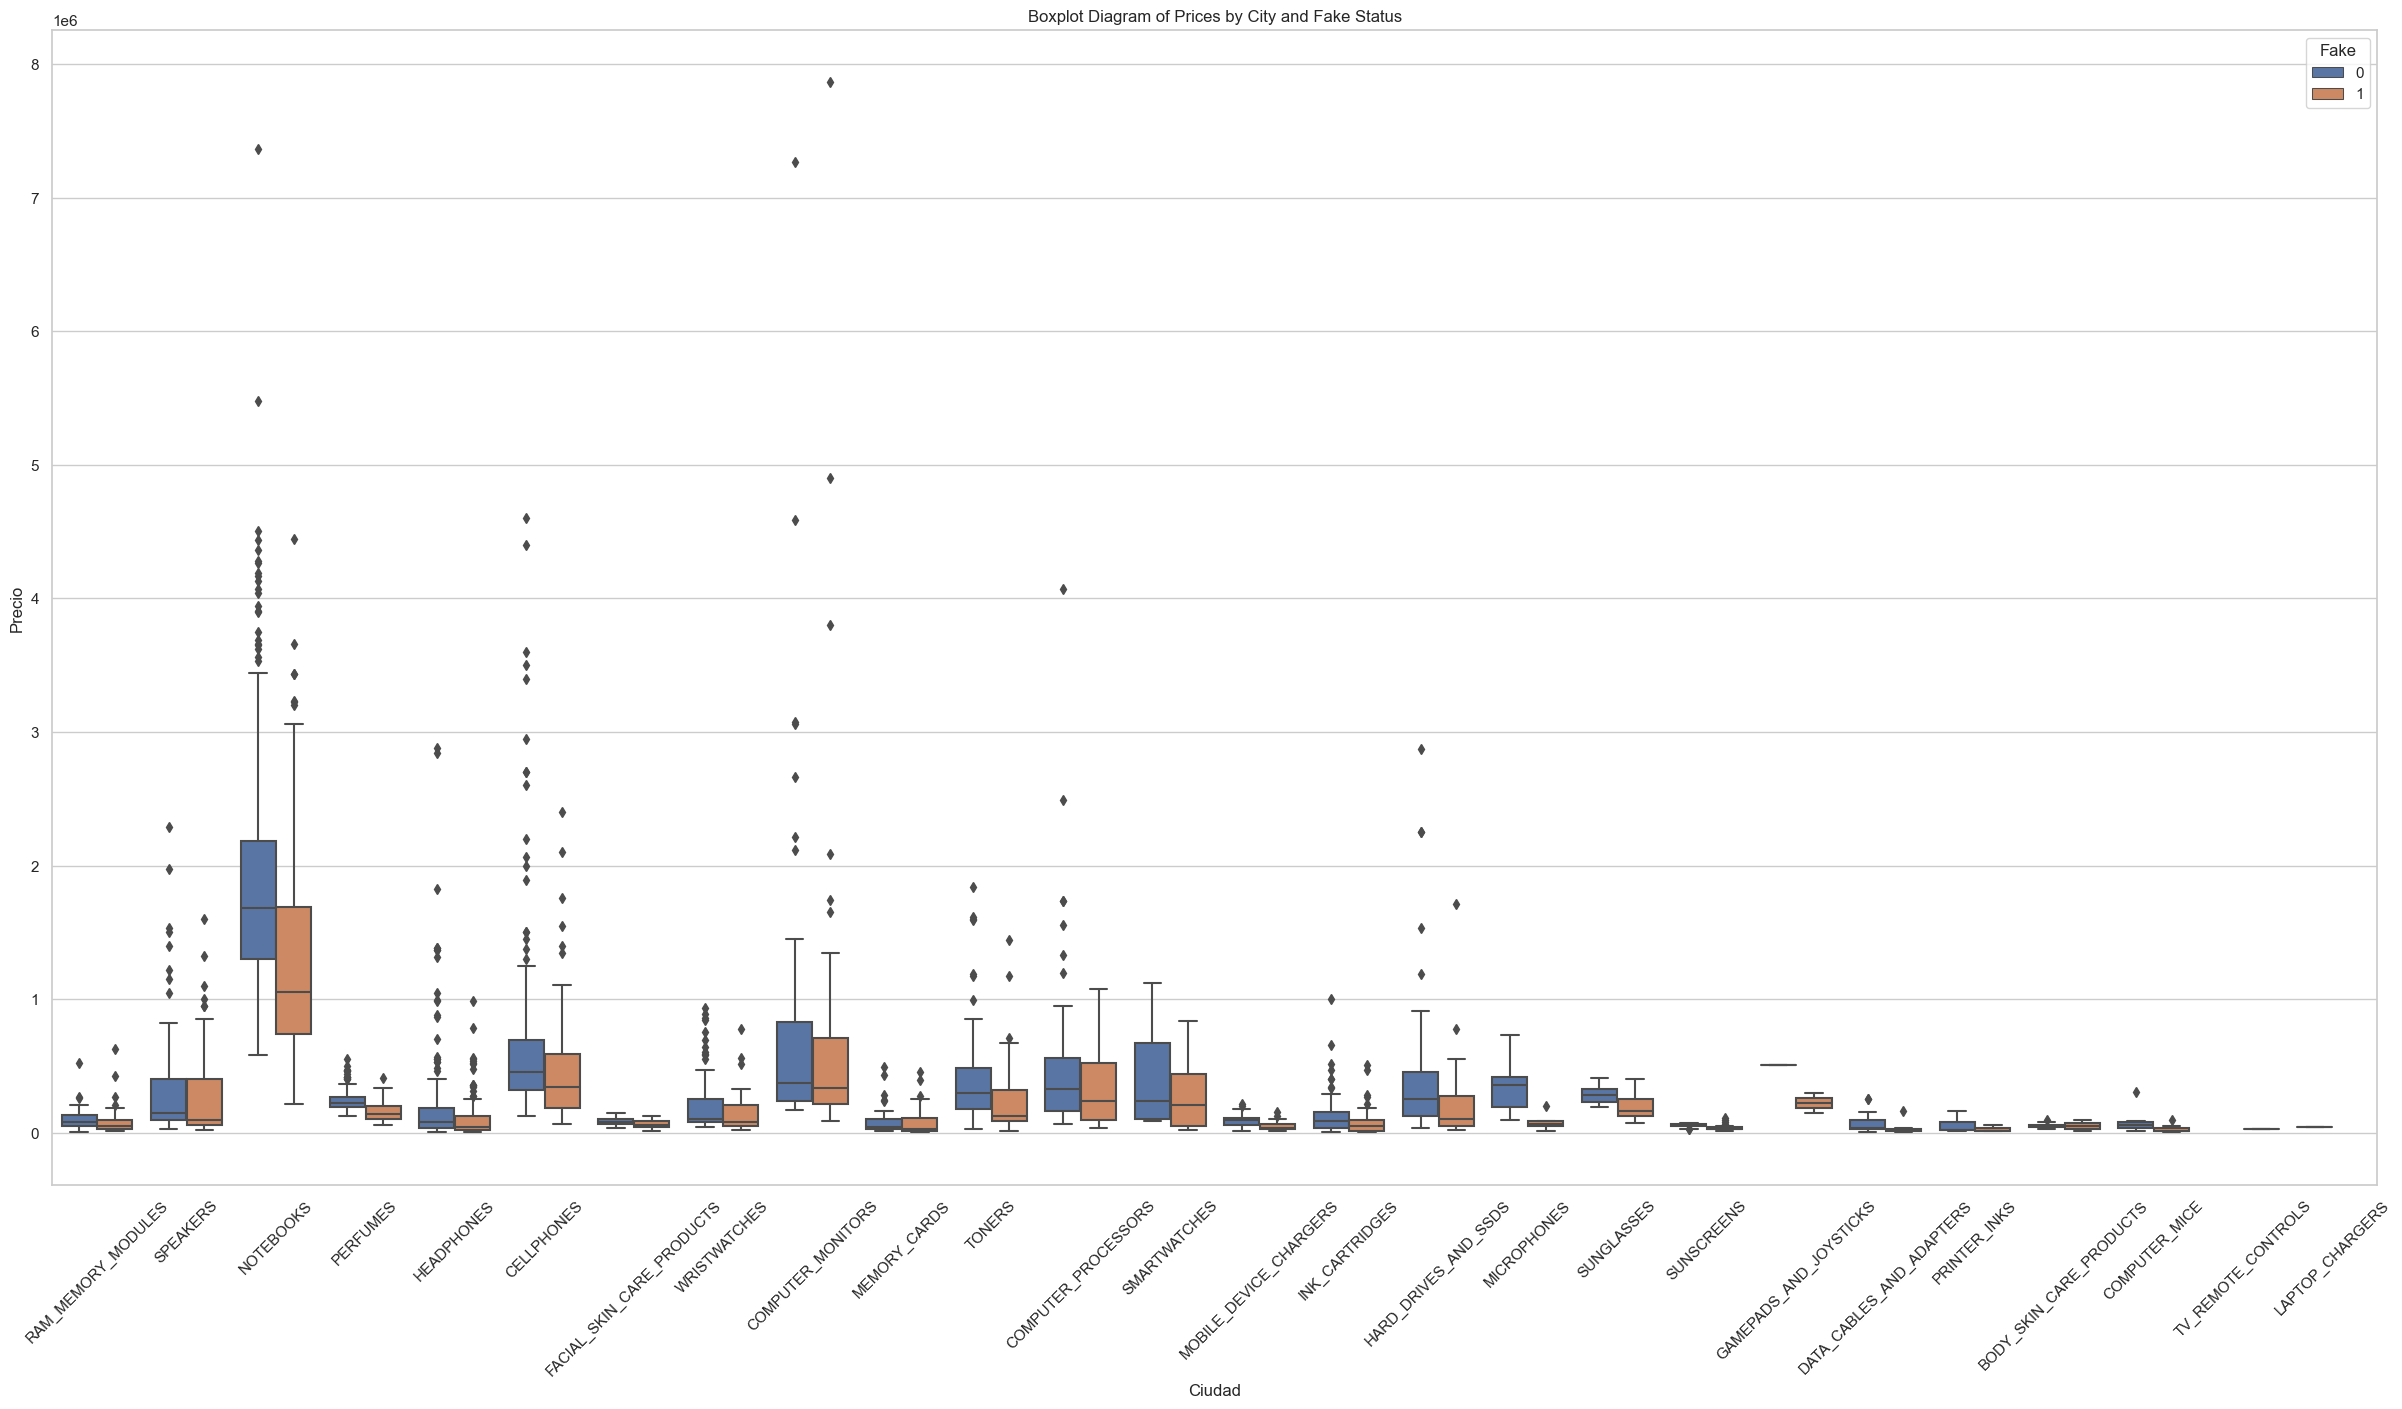

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["ARGENTINA"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

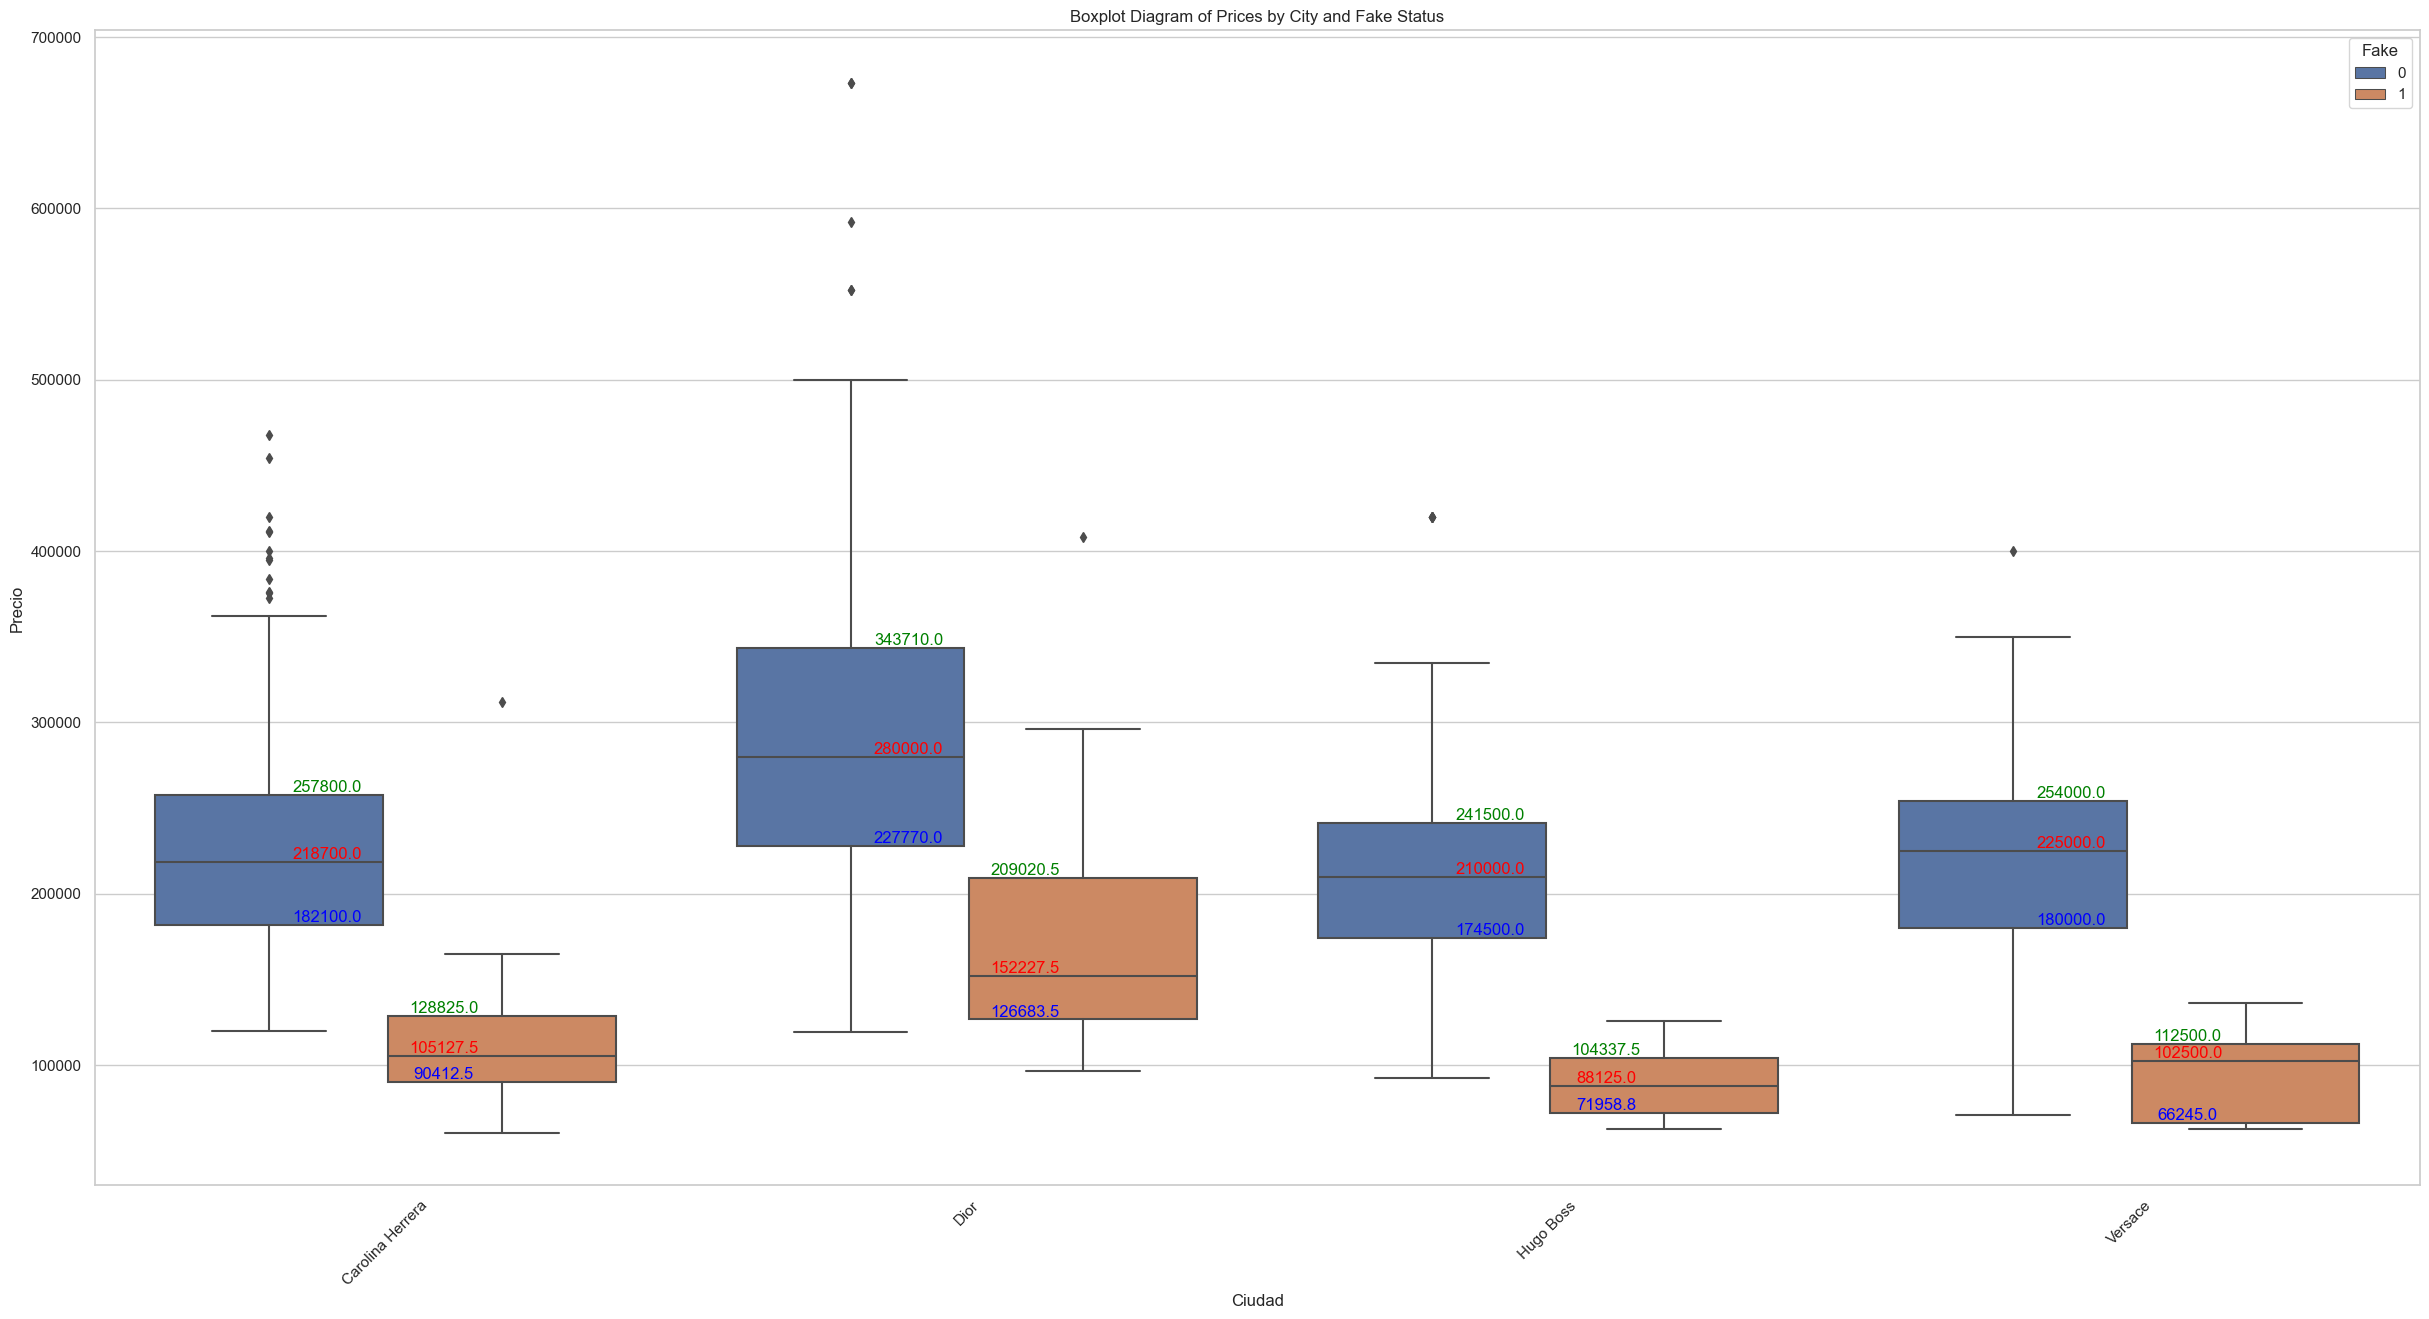

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["ARGENTINA"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

## _Colombia_


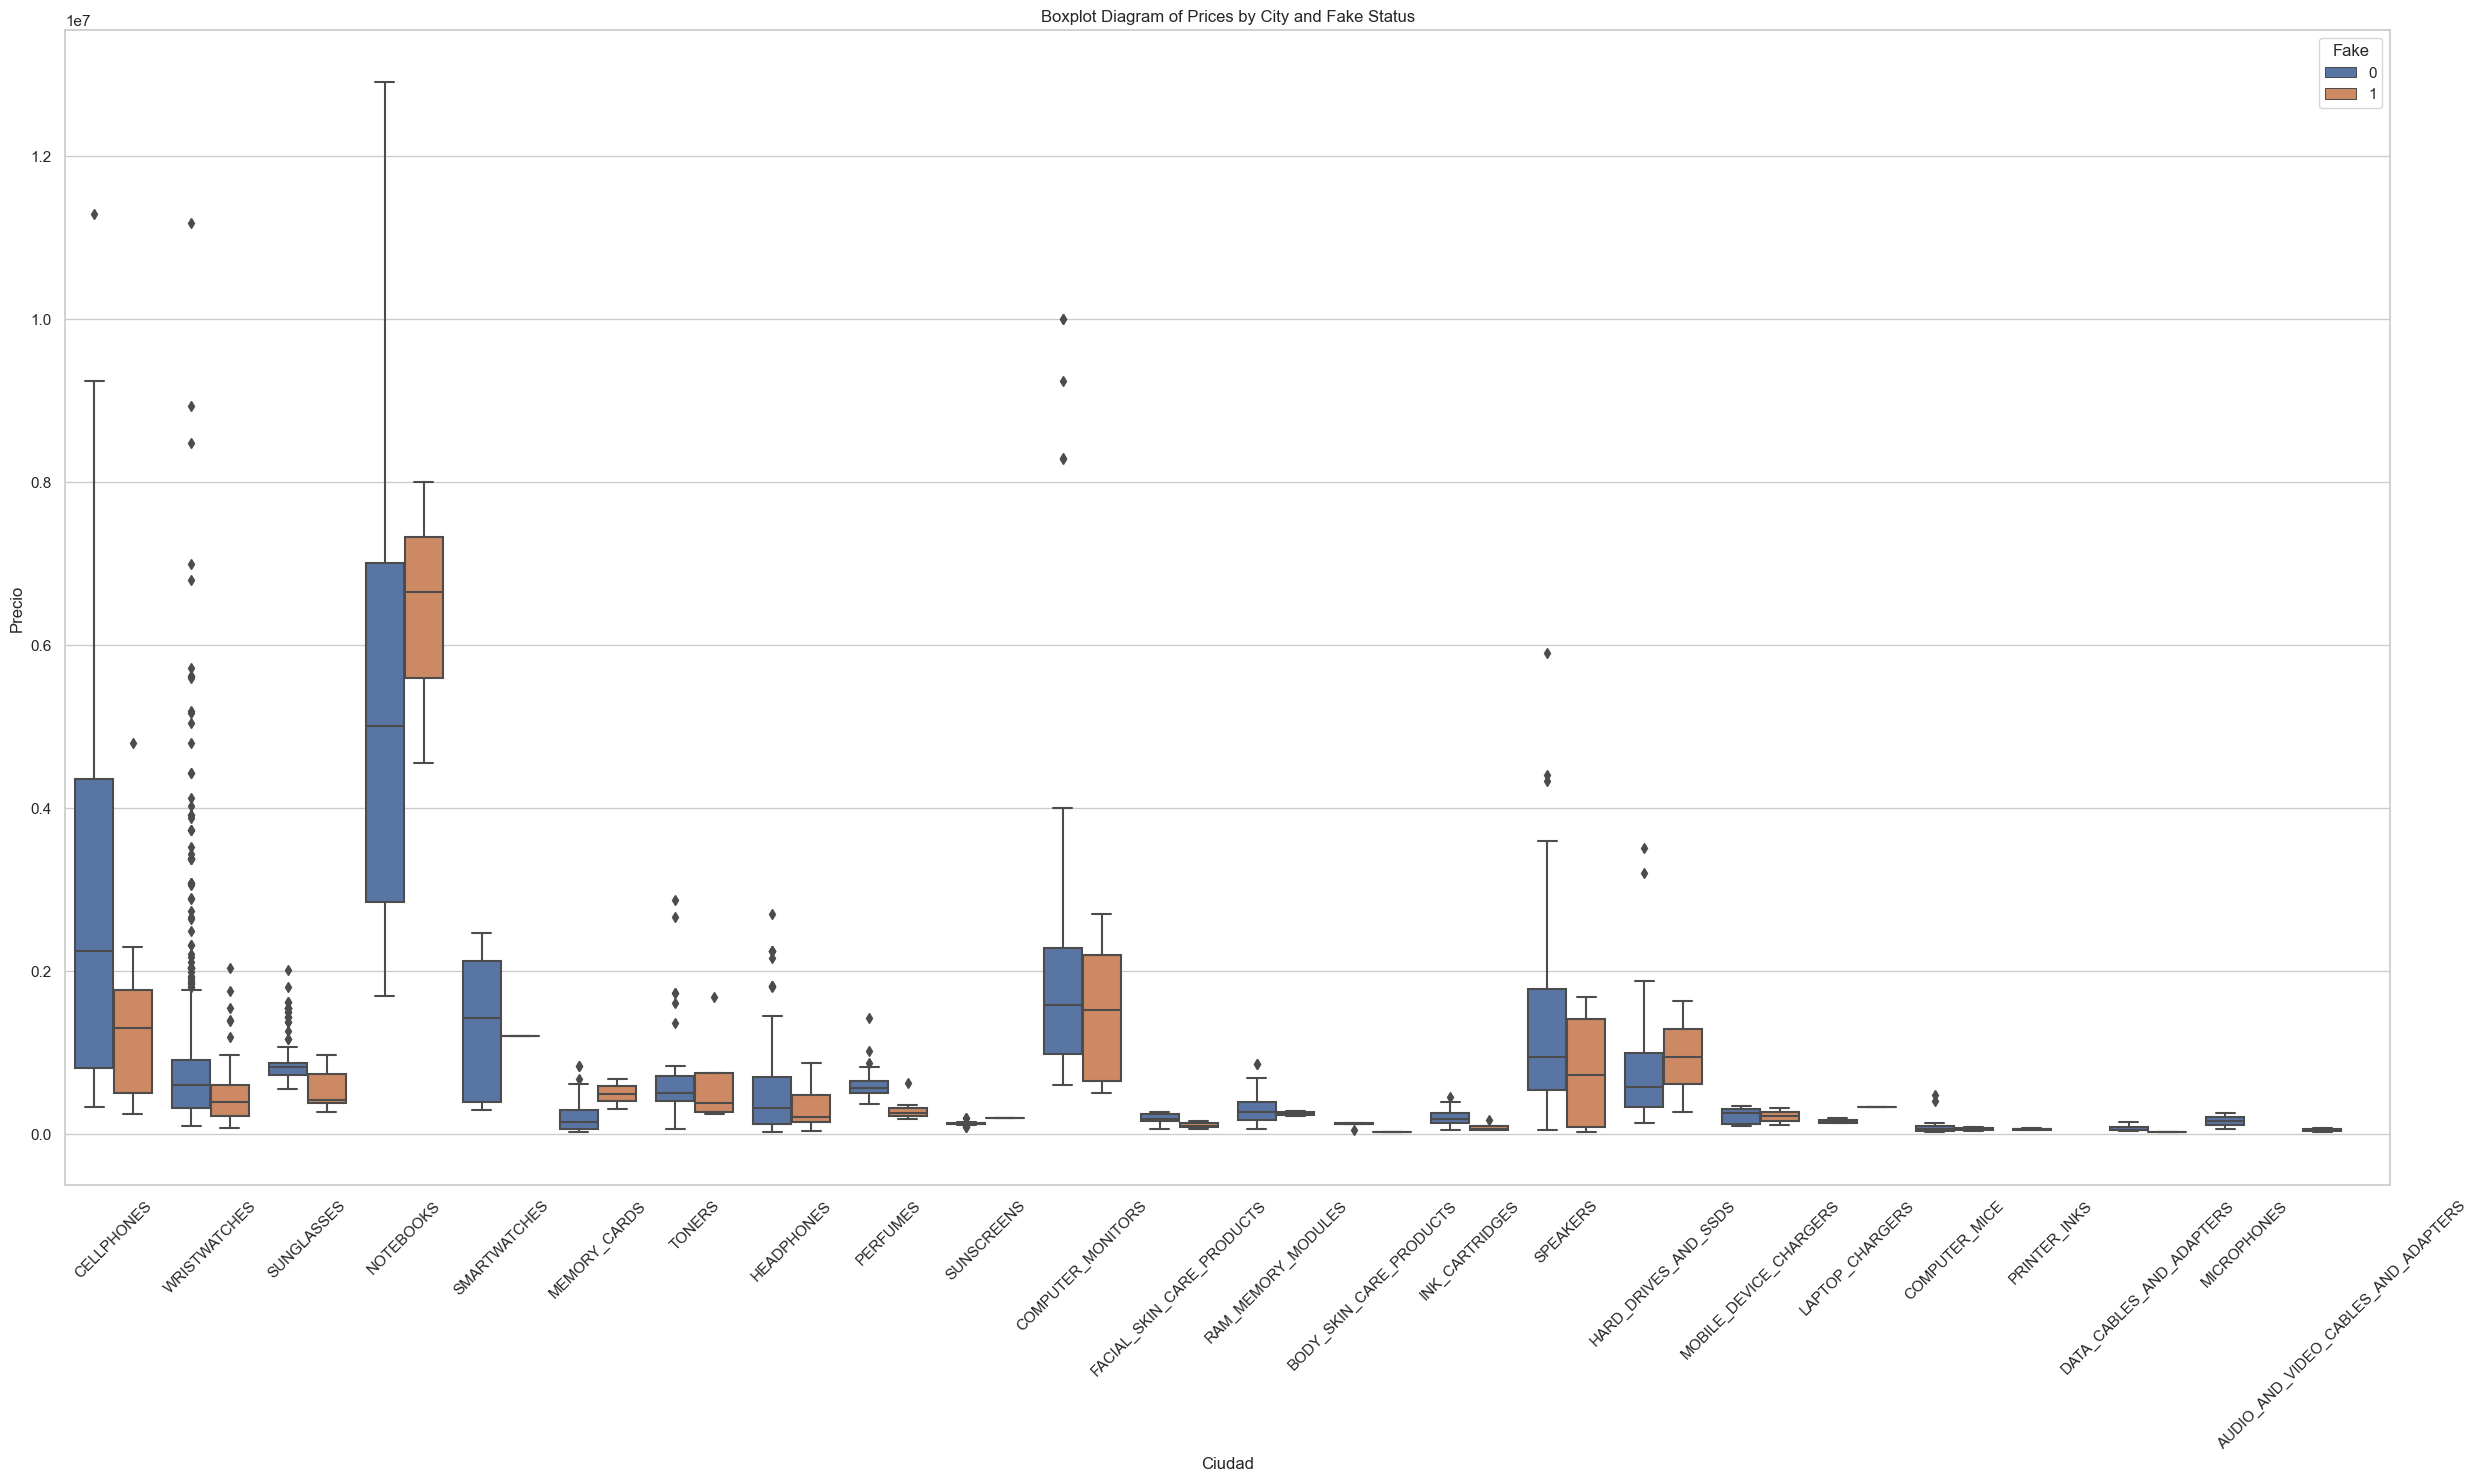

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[data["site_id"].isin(["COLOMBIA"])],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

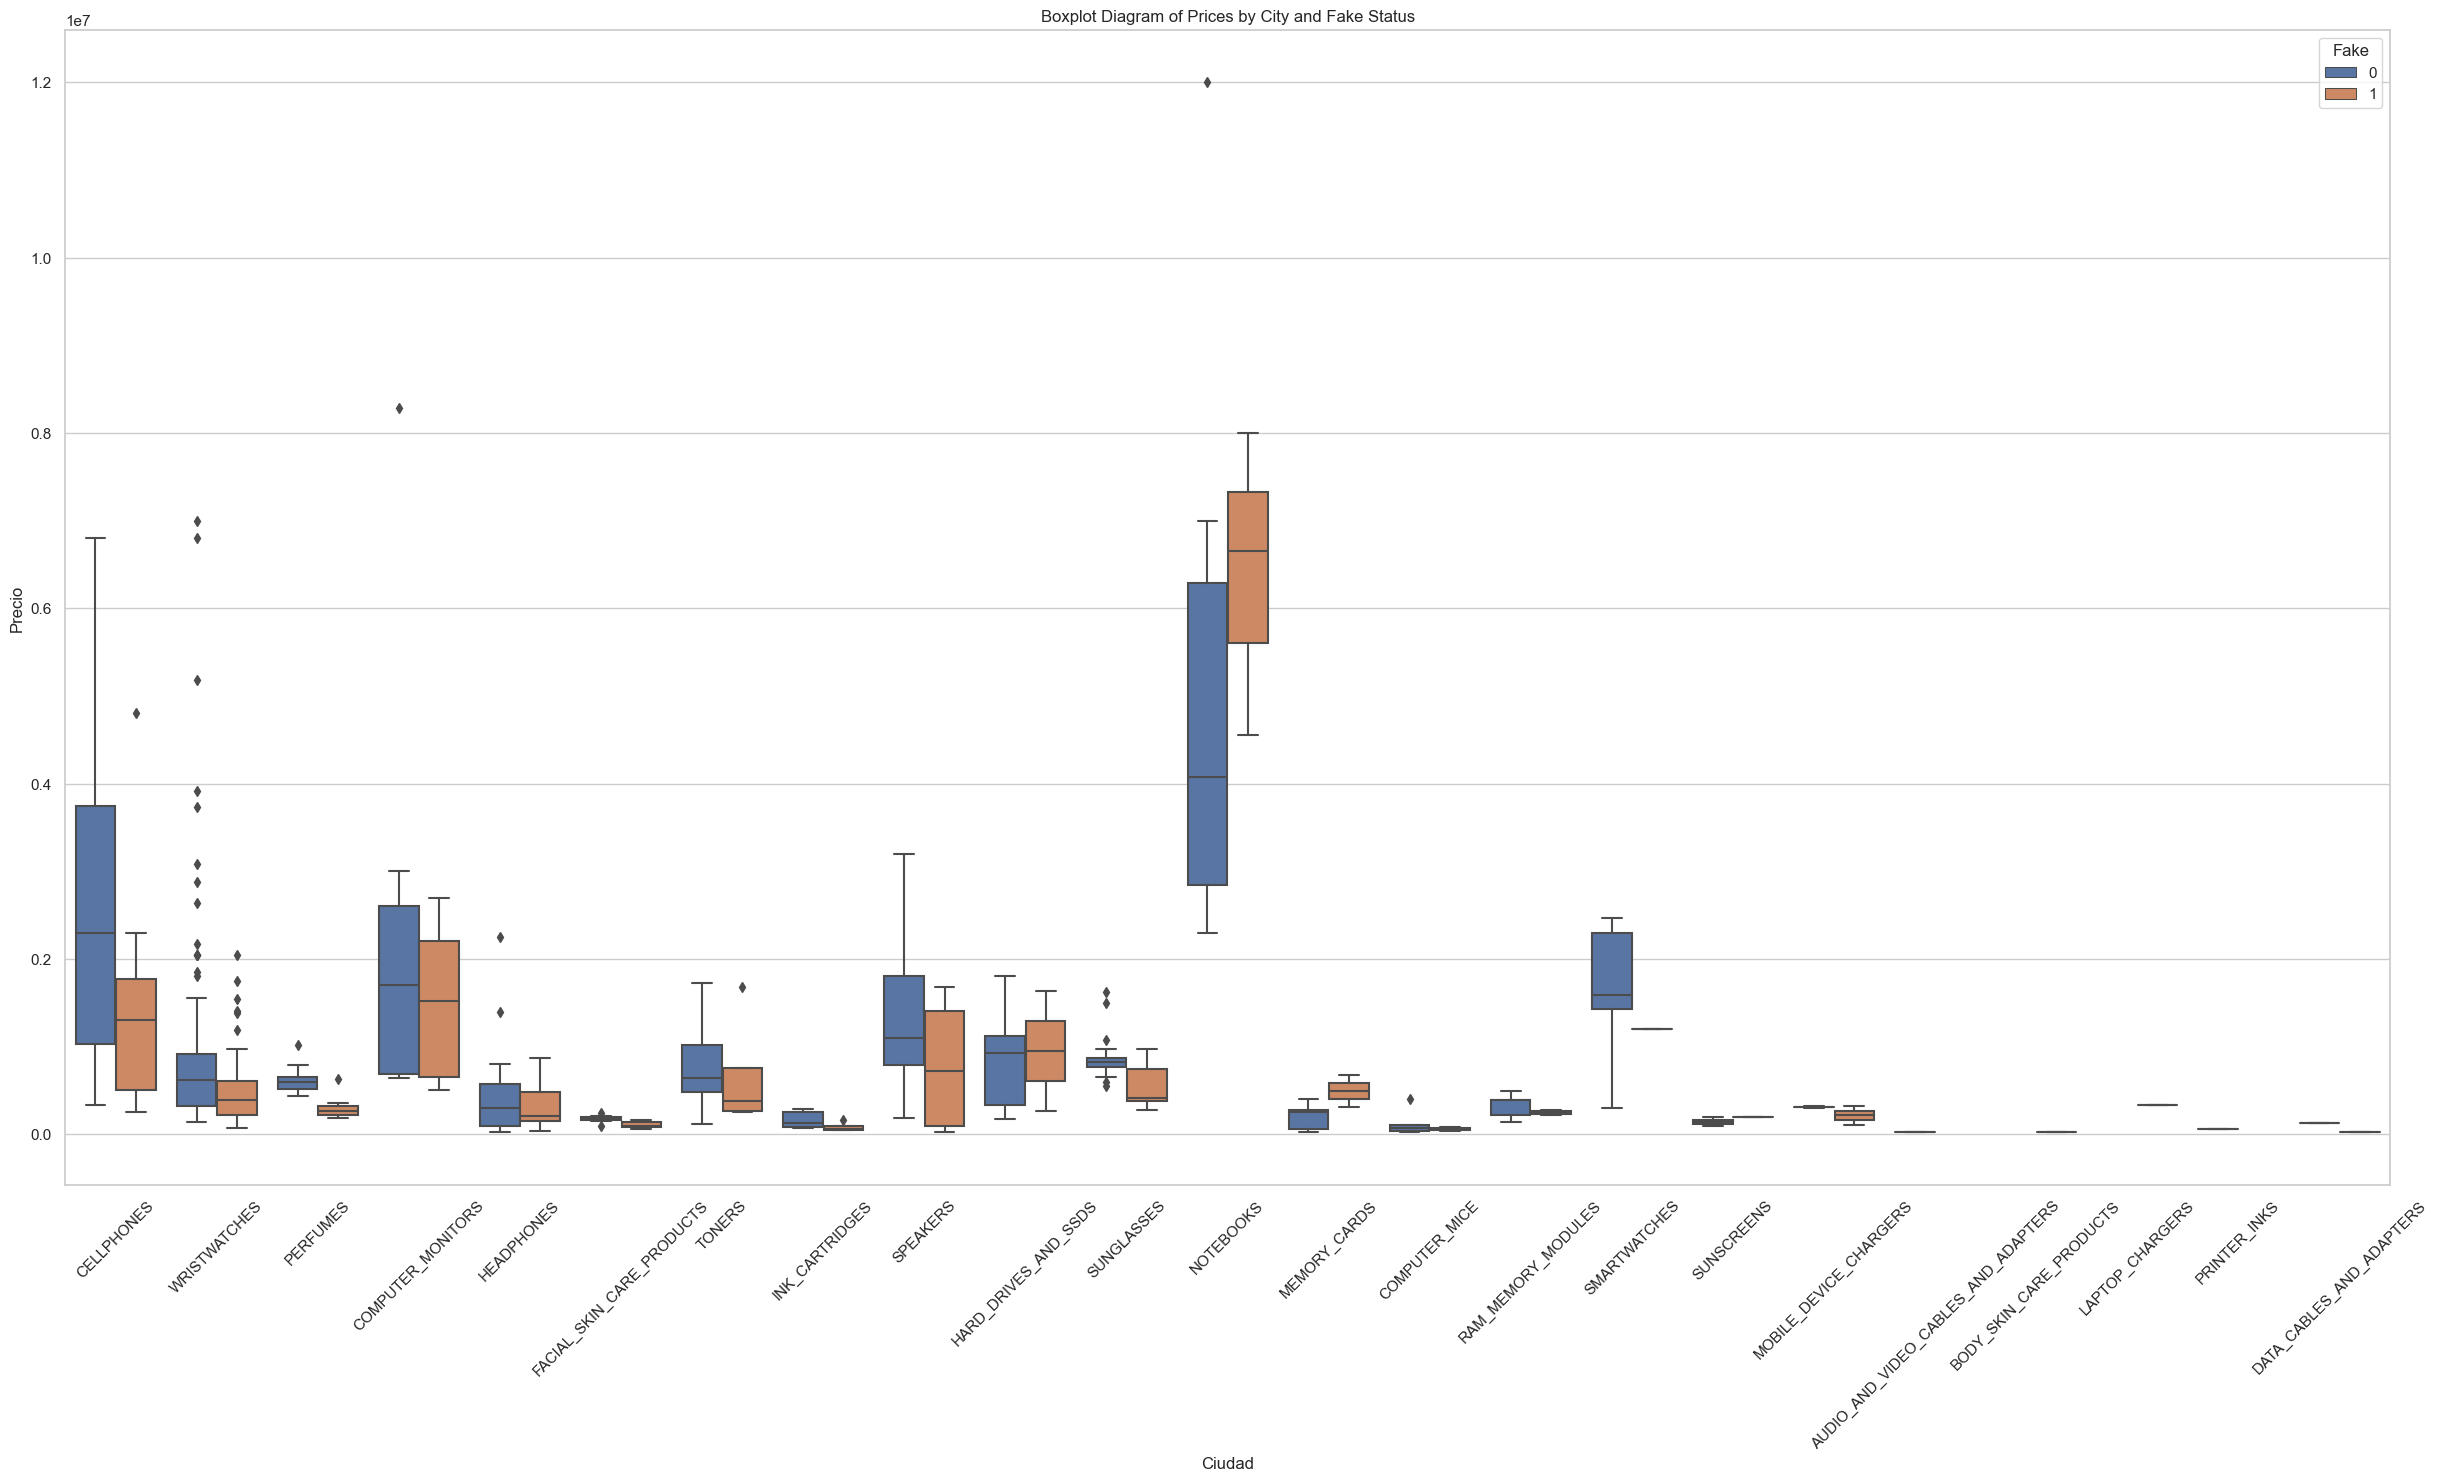

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["COLOMBIA"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

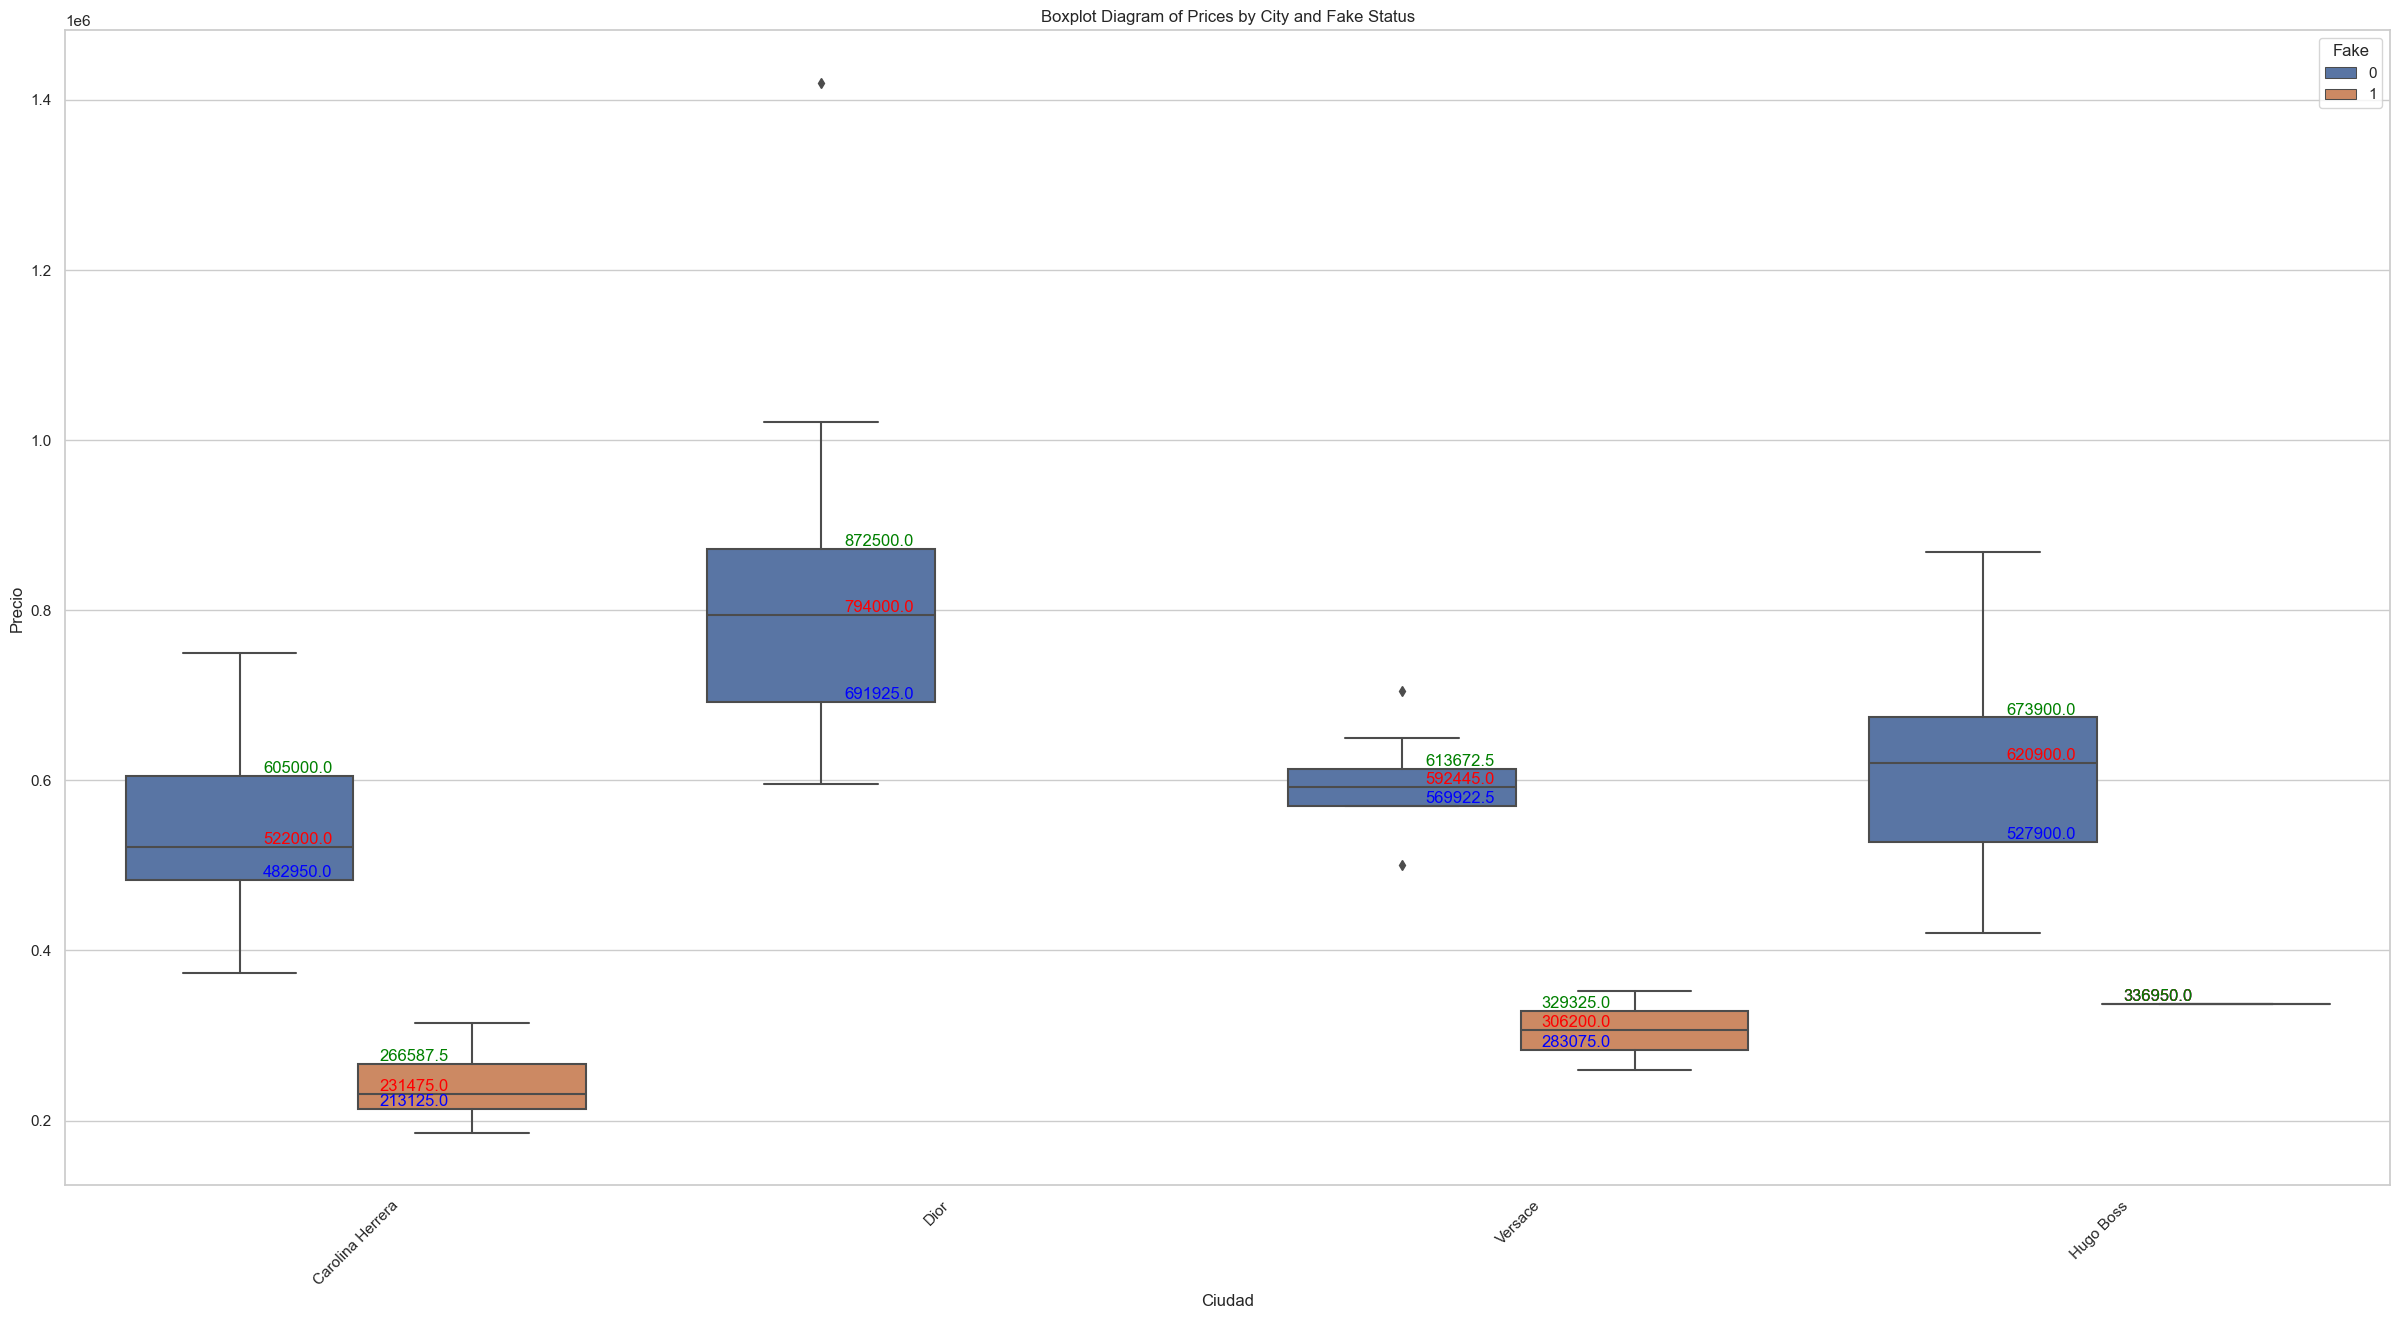

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["COLOMBIA"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

## _Chile_


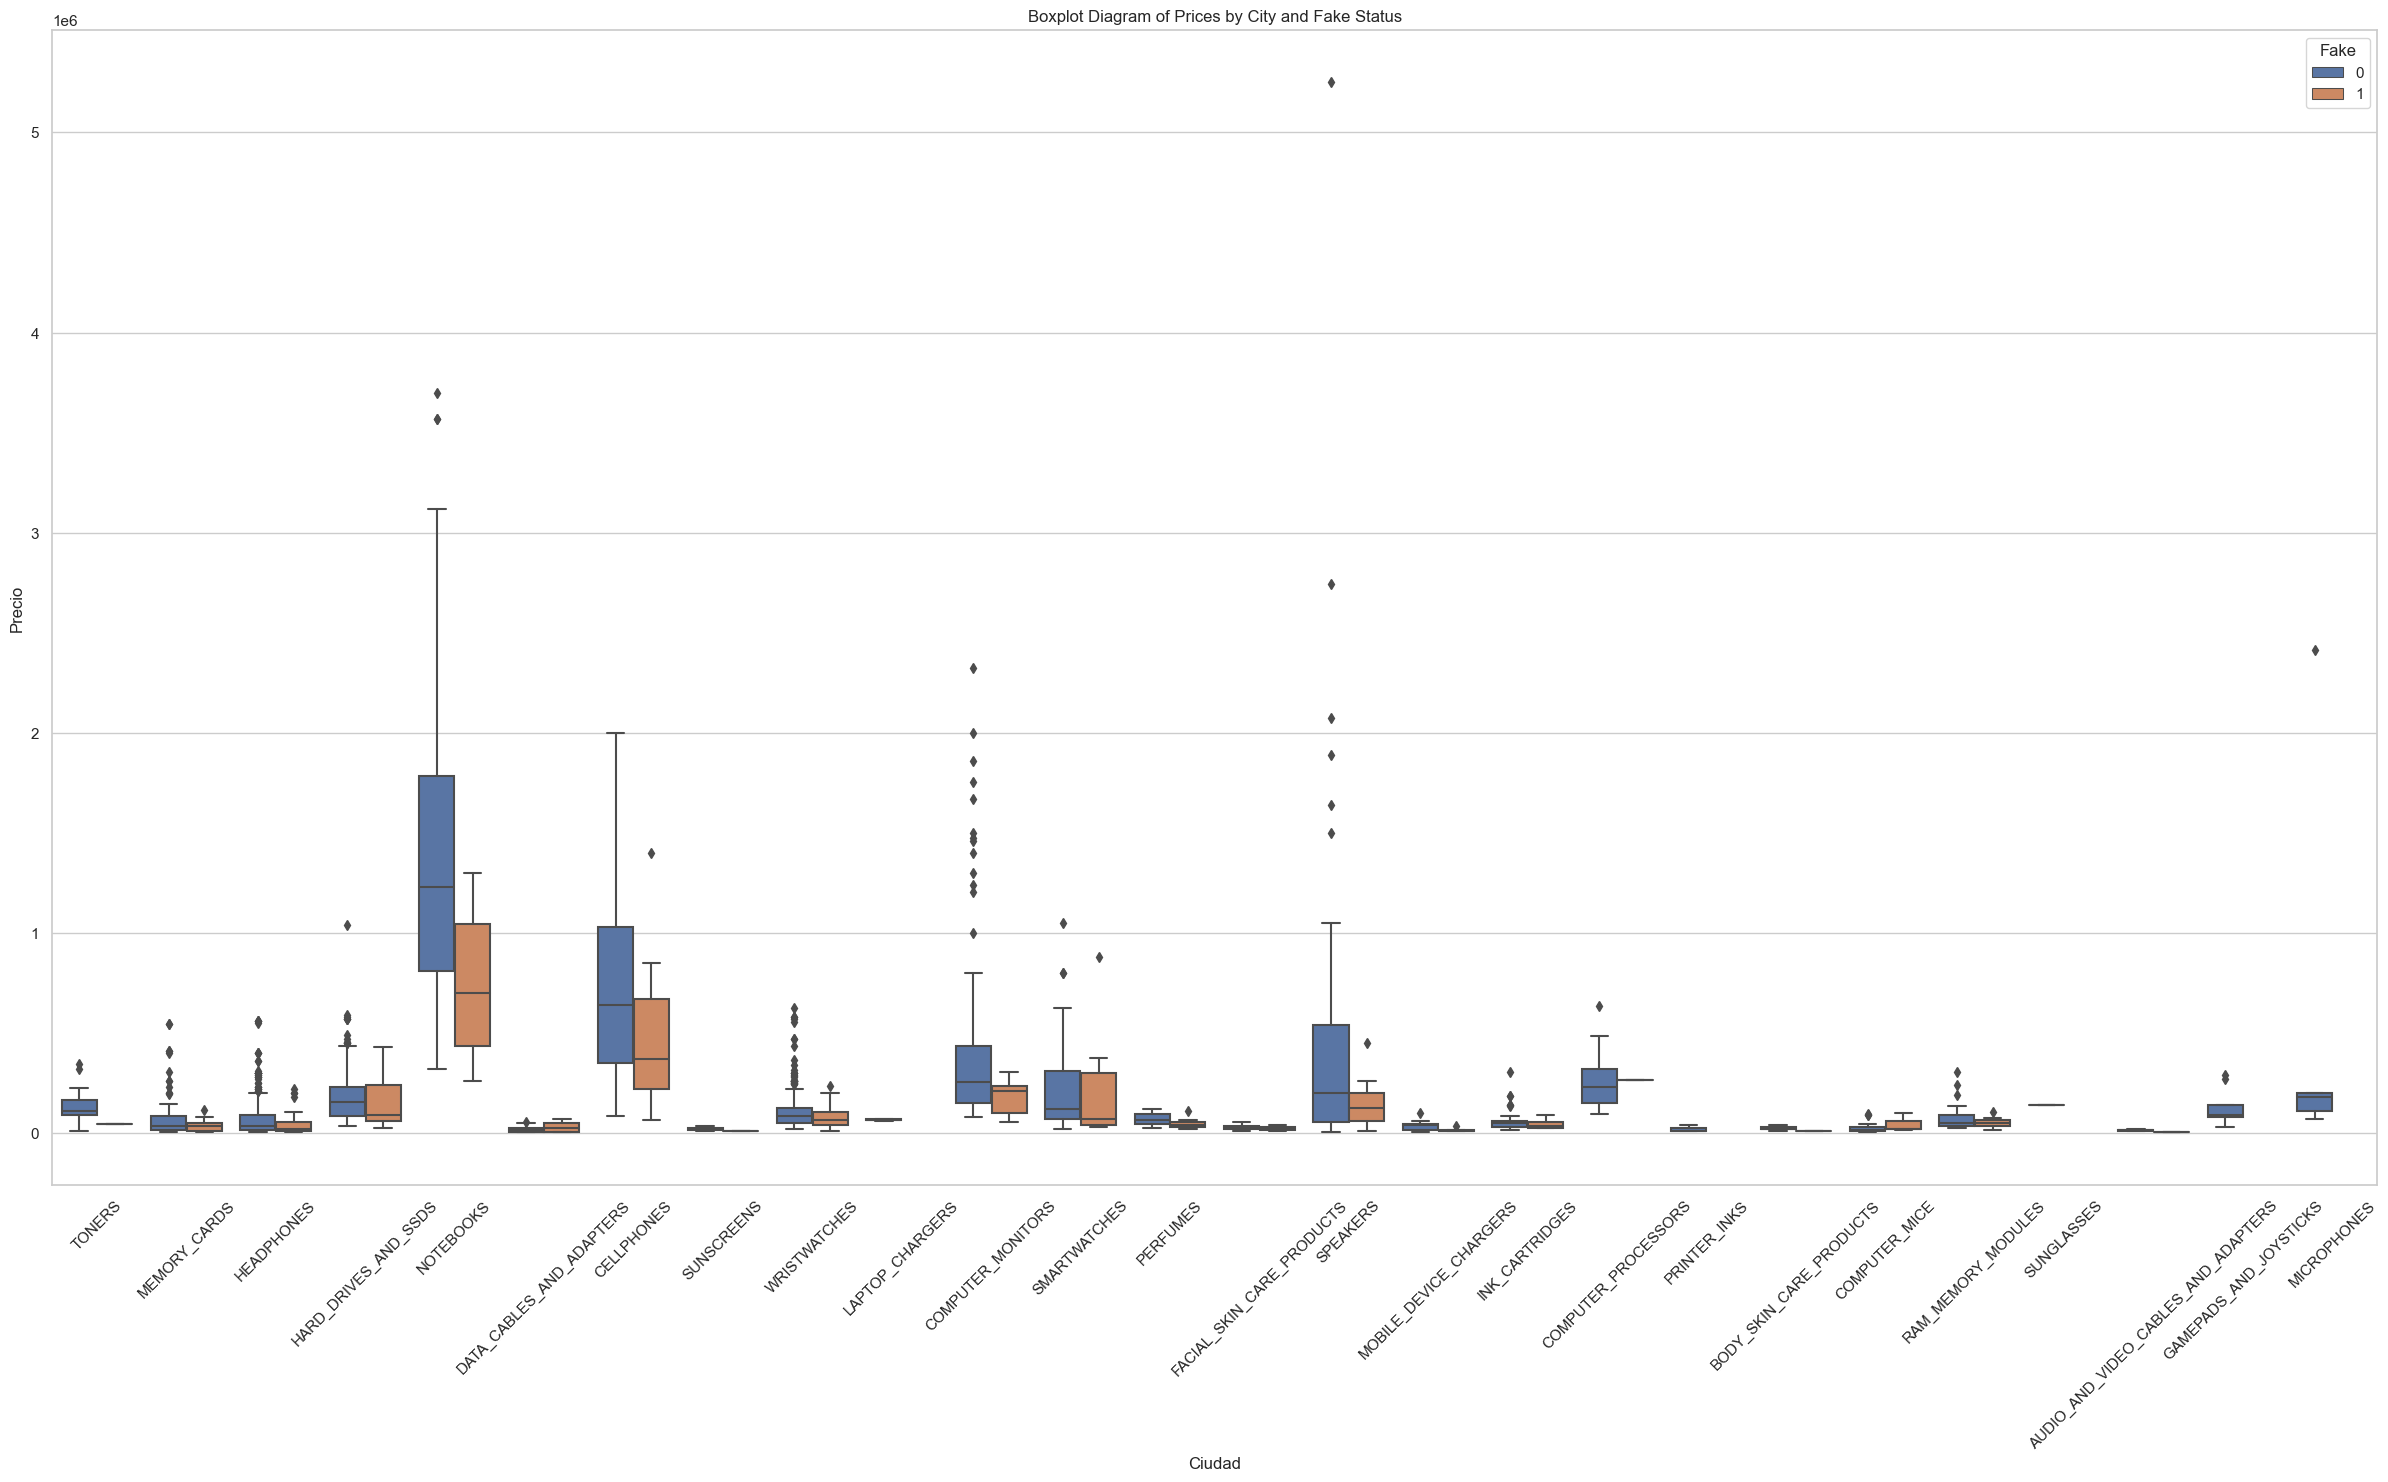

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[data["site_id"].isin(["CHILE"])],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

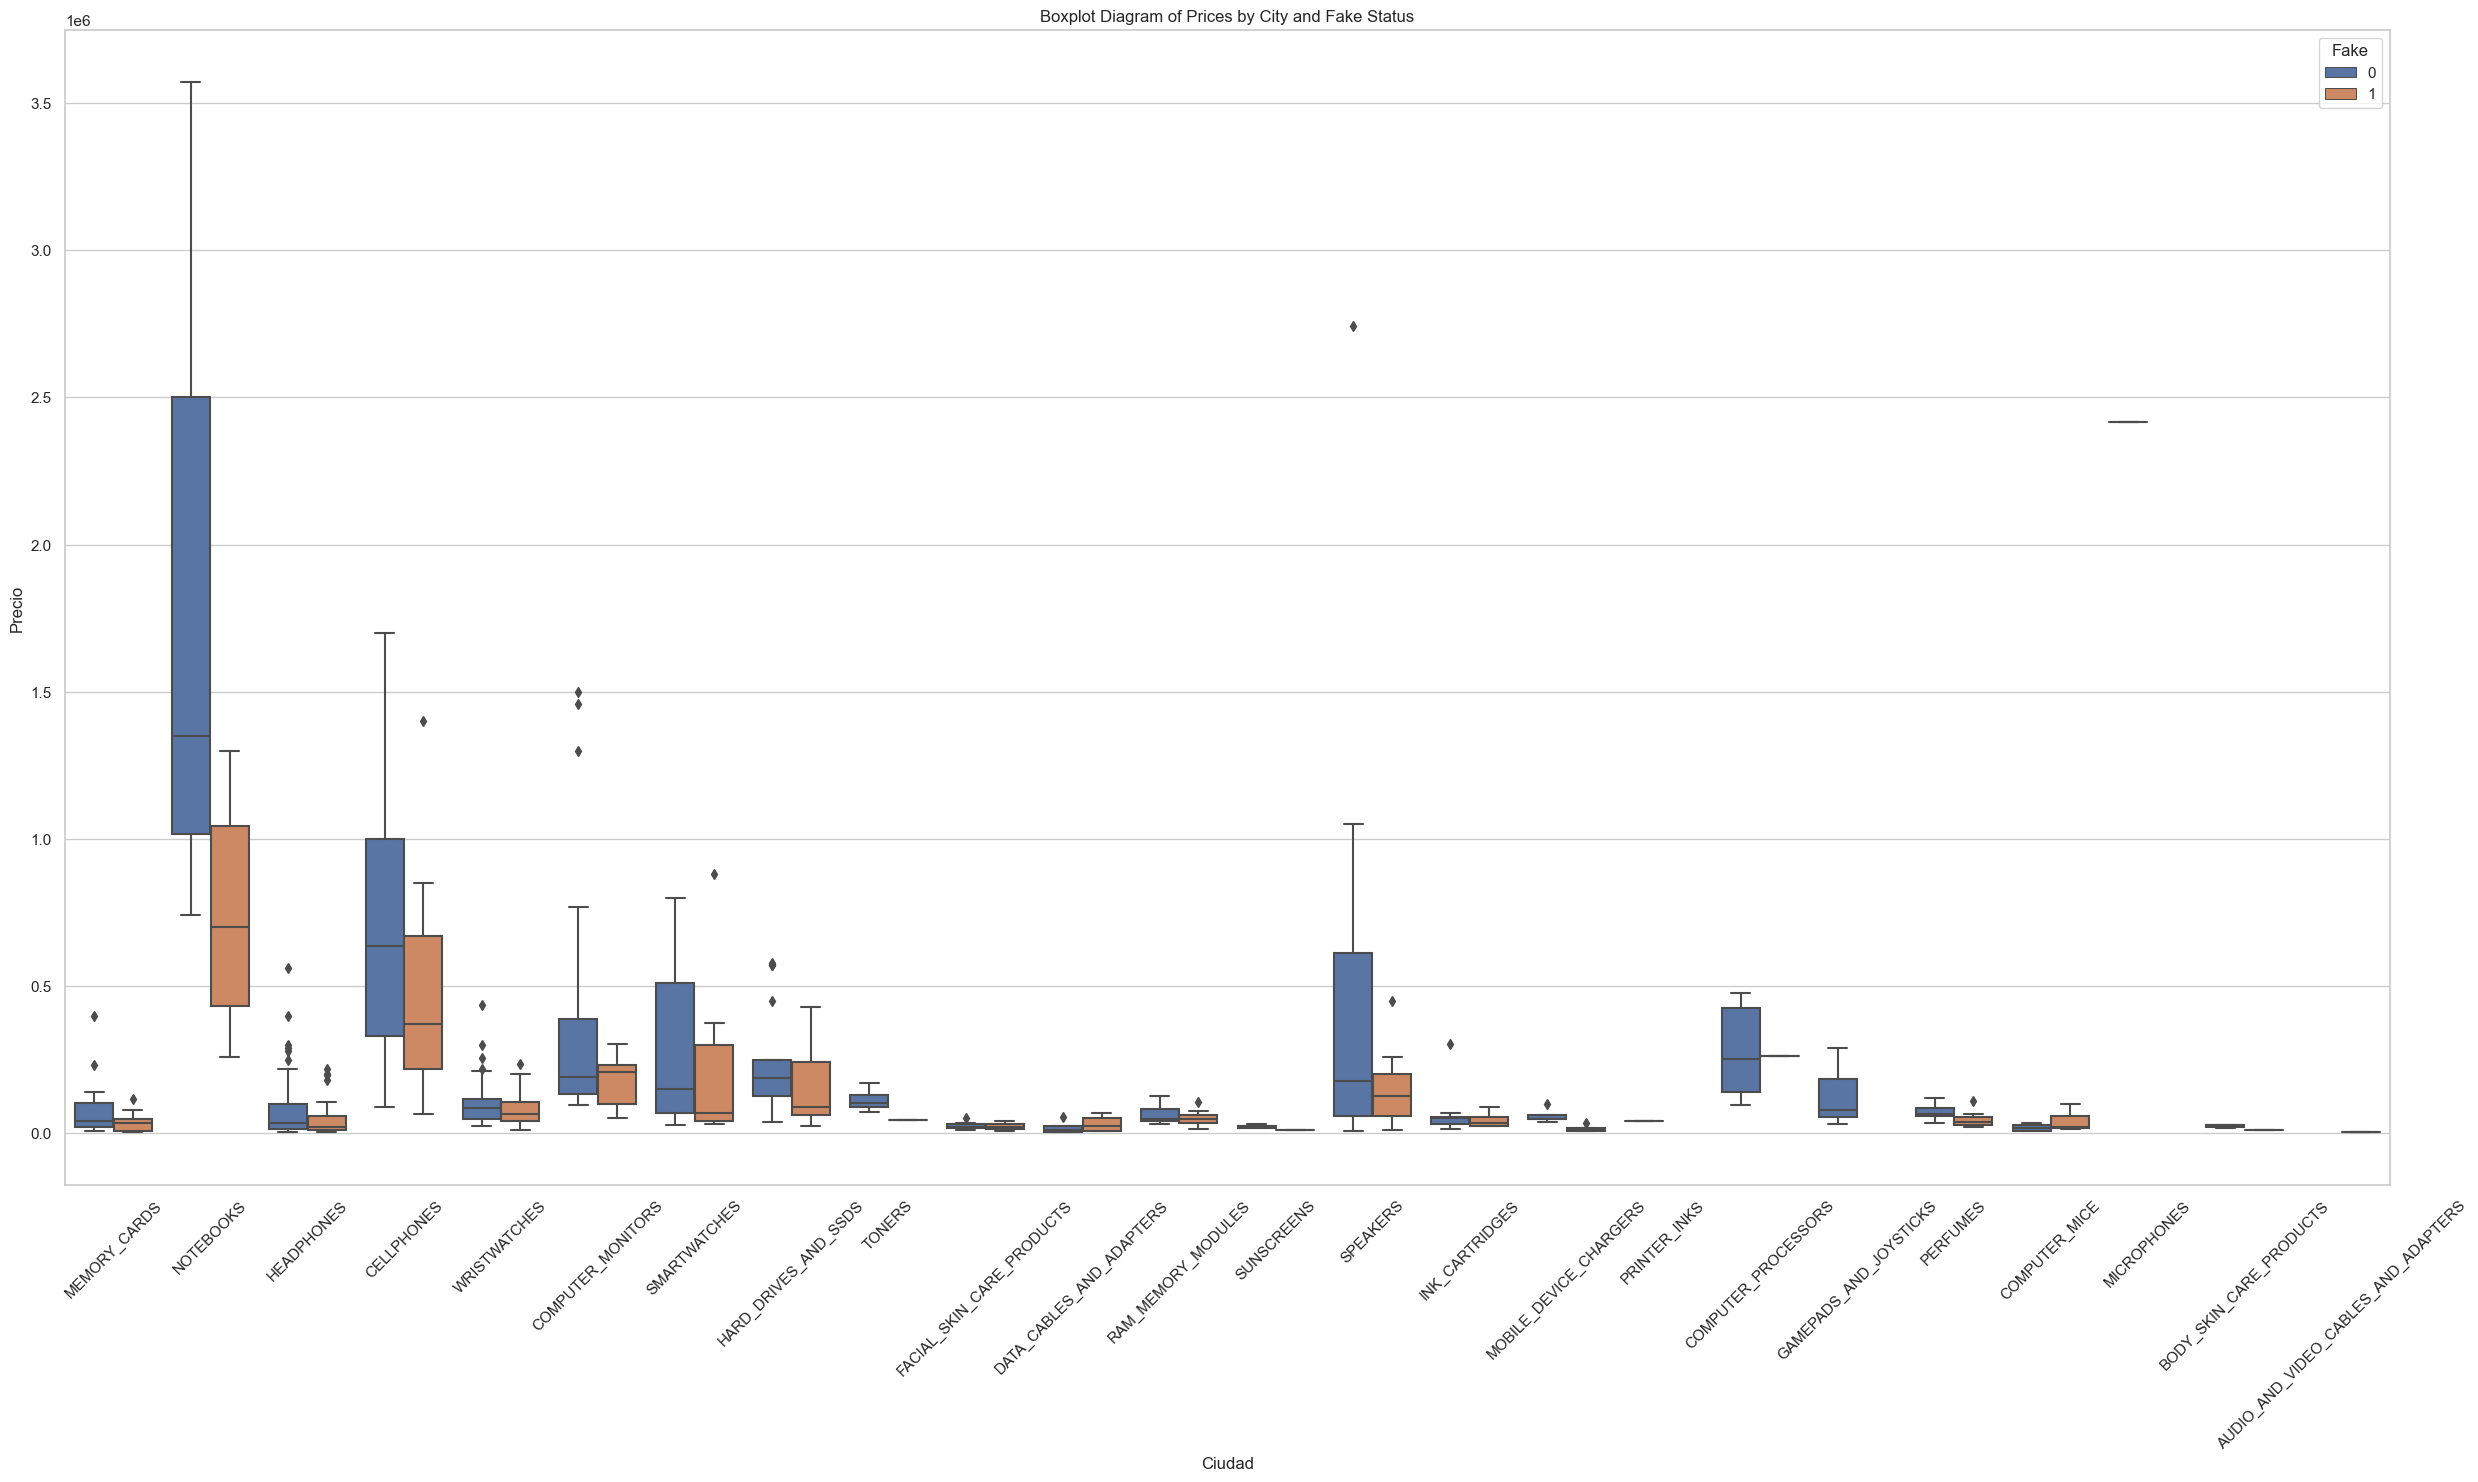

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["CHILE"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

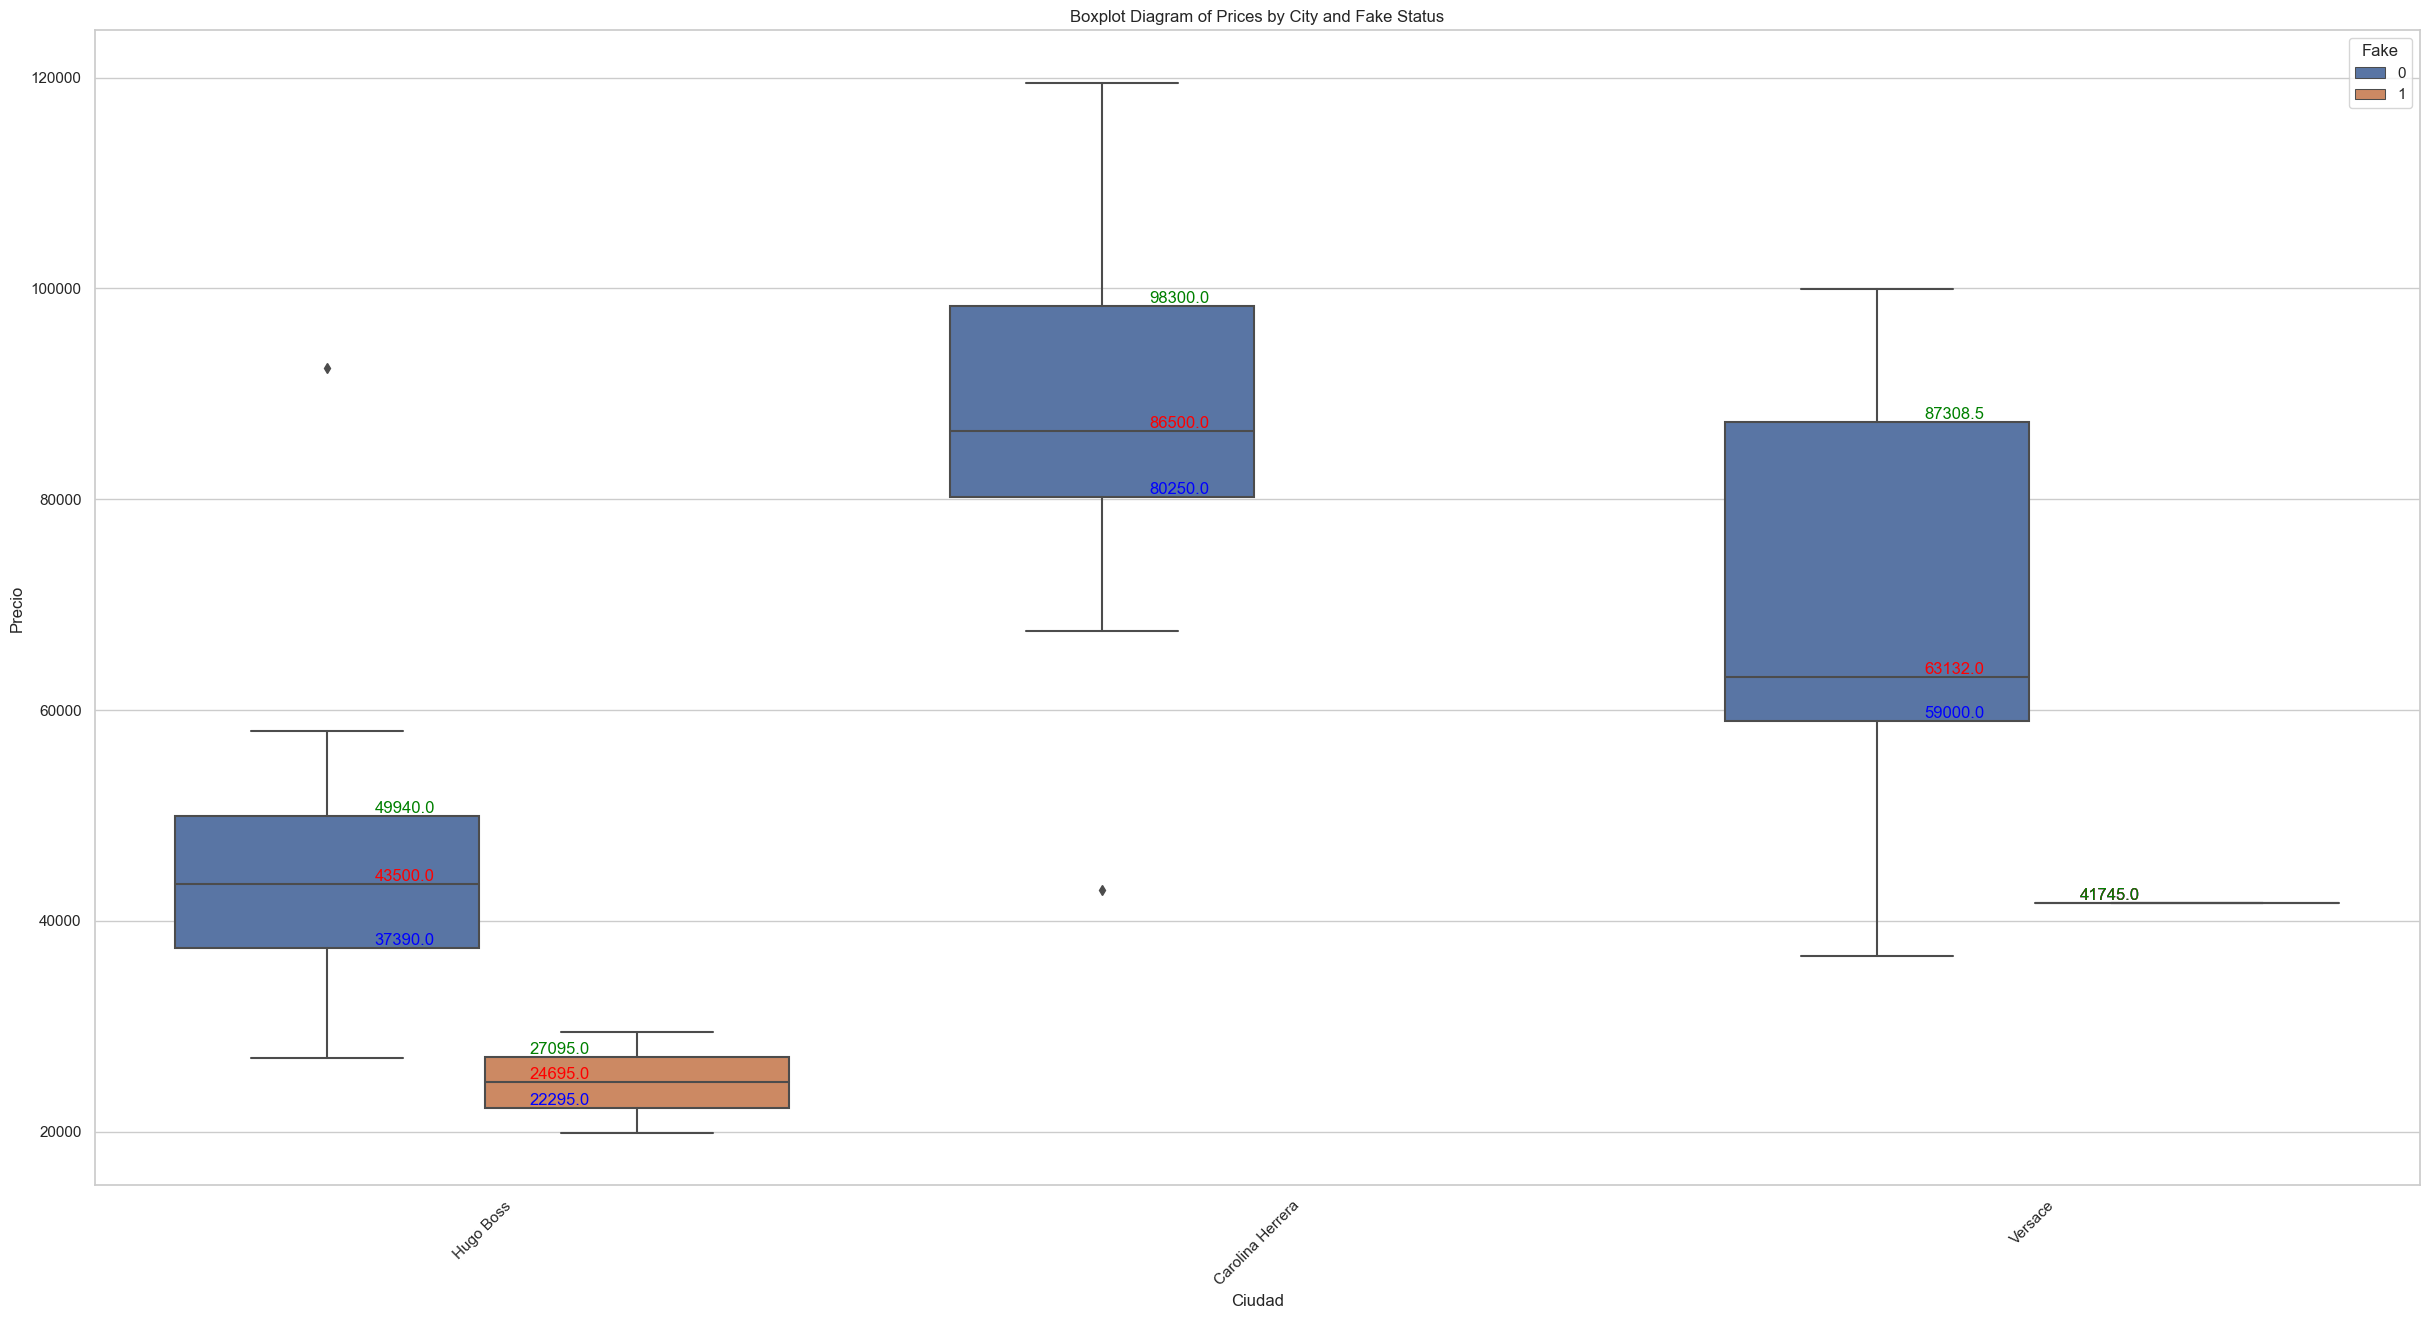

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["CHILE"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

## _Mexico_


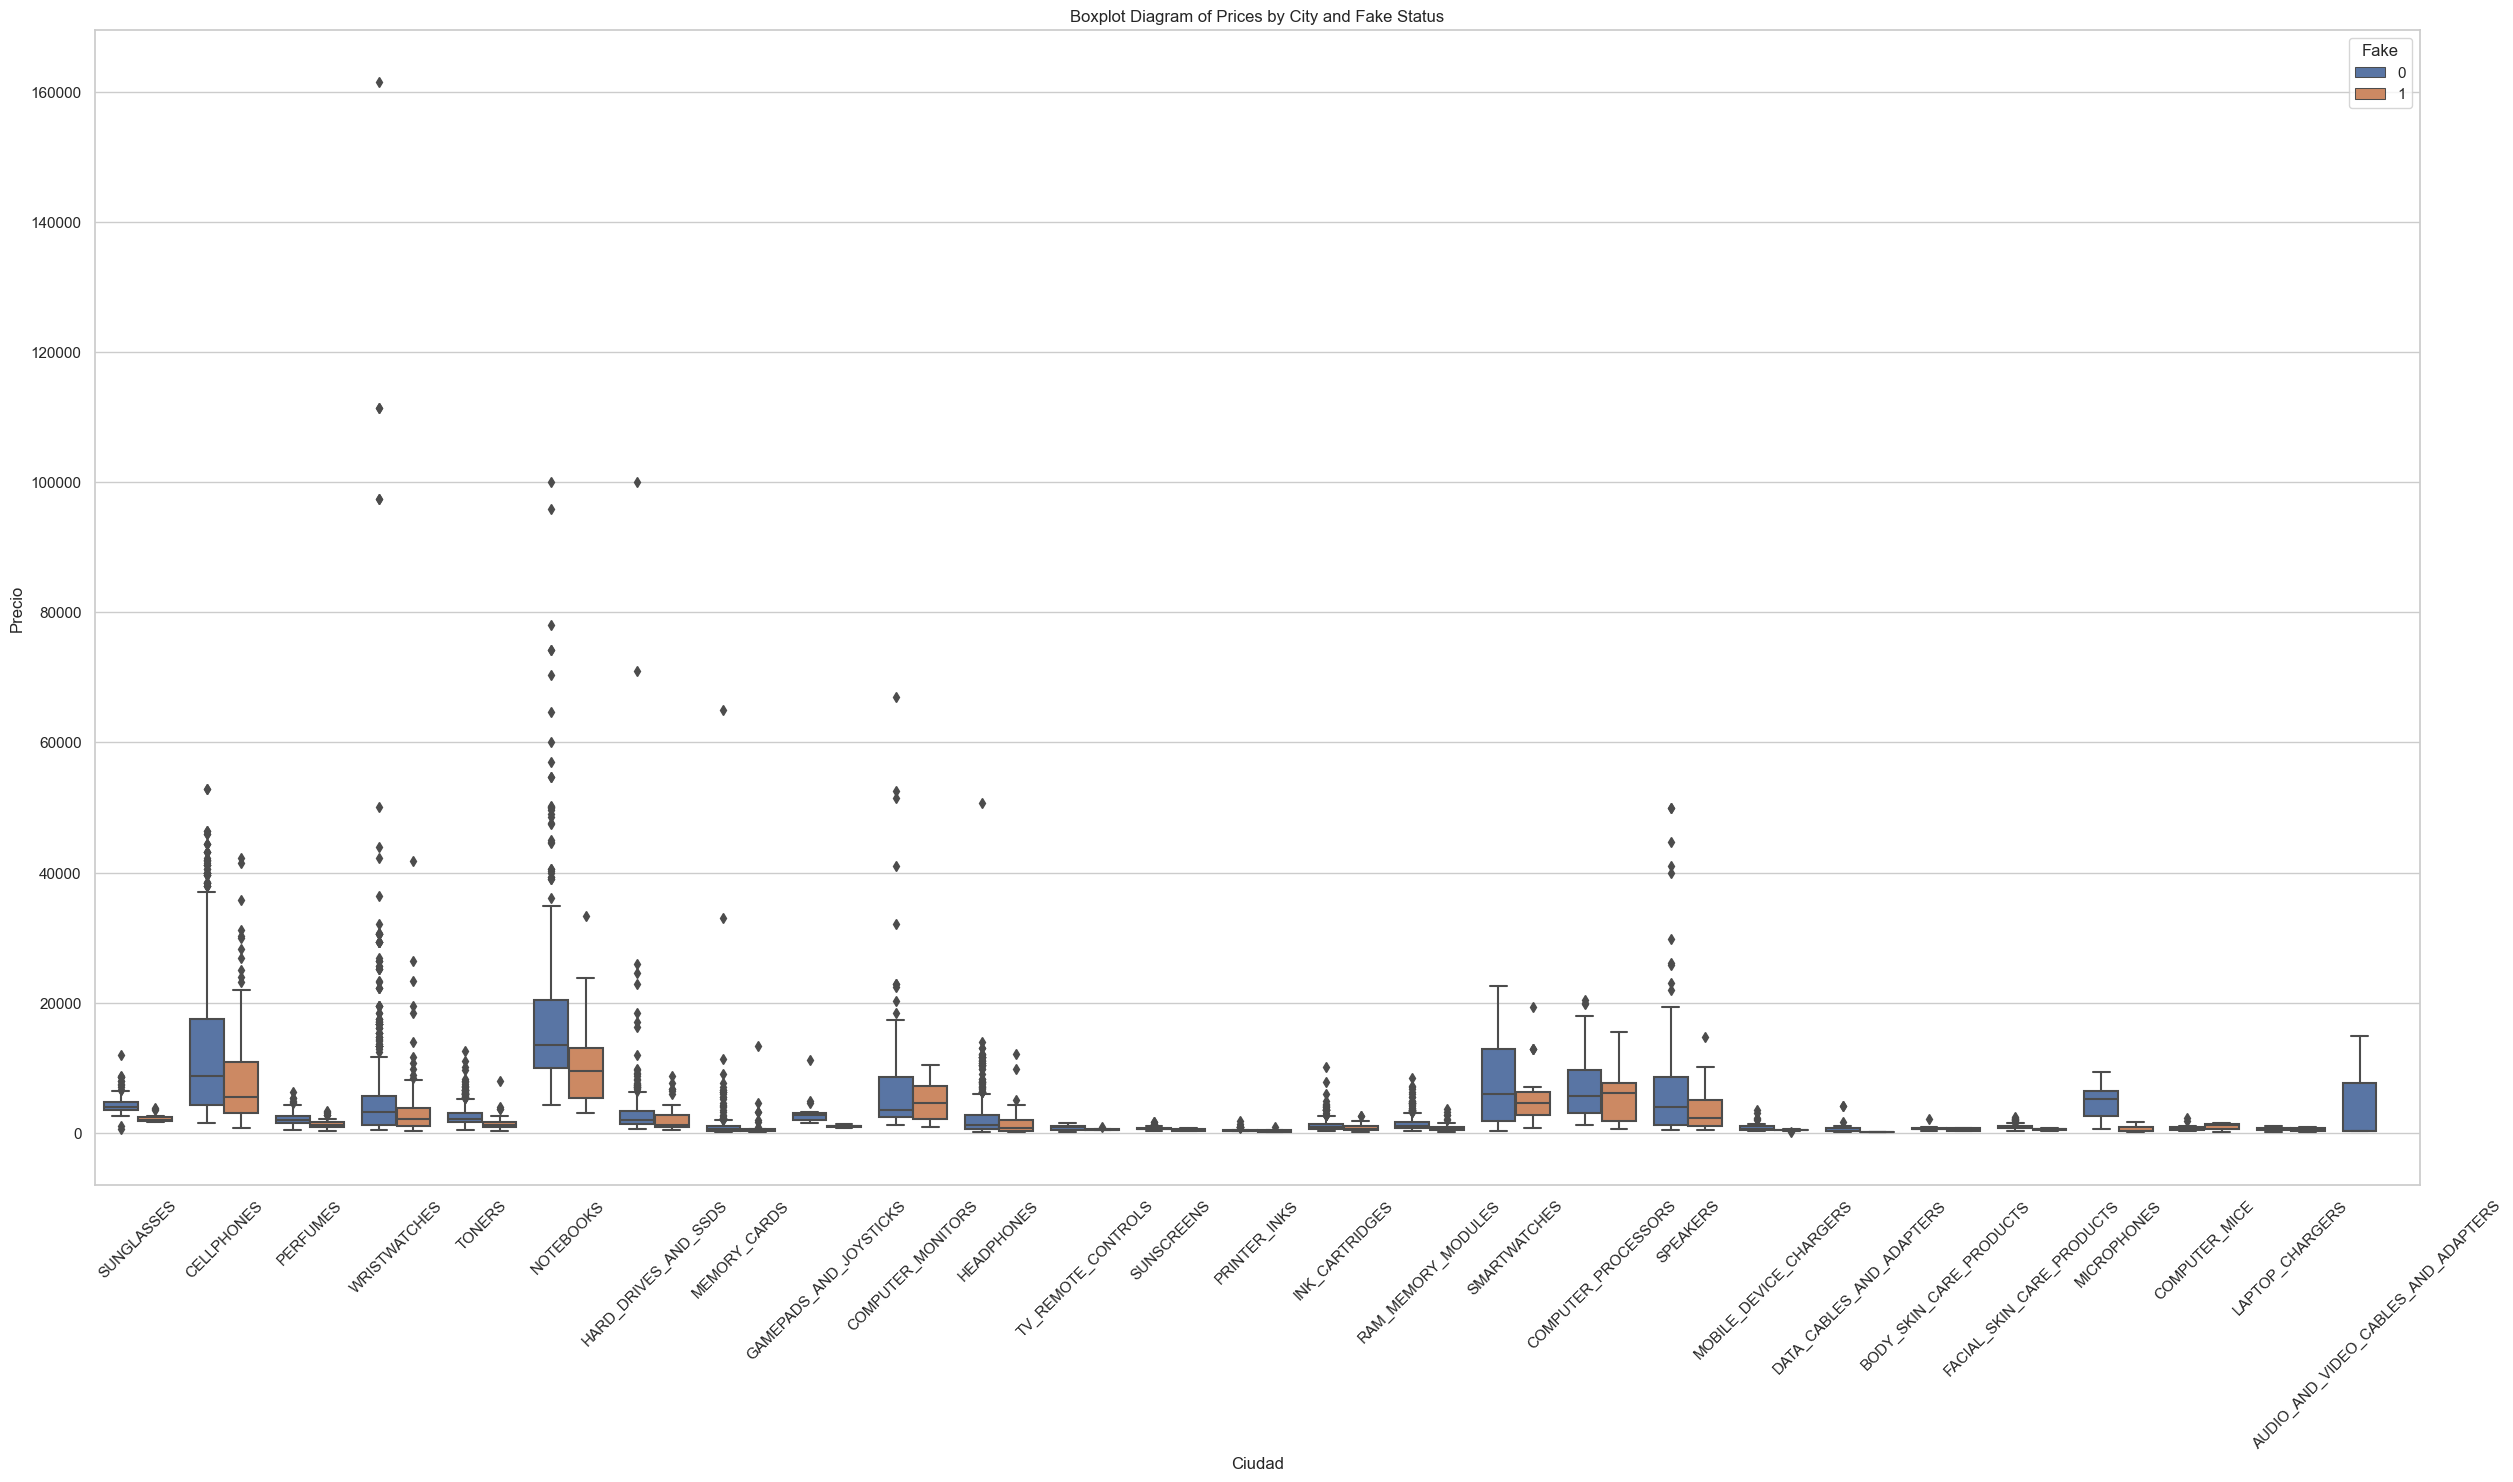

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[data["site_id"].isin(["MEXICO"])],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

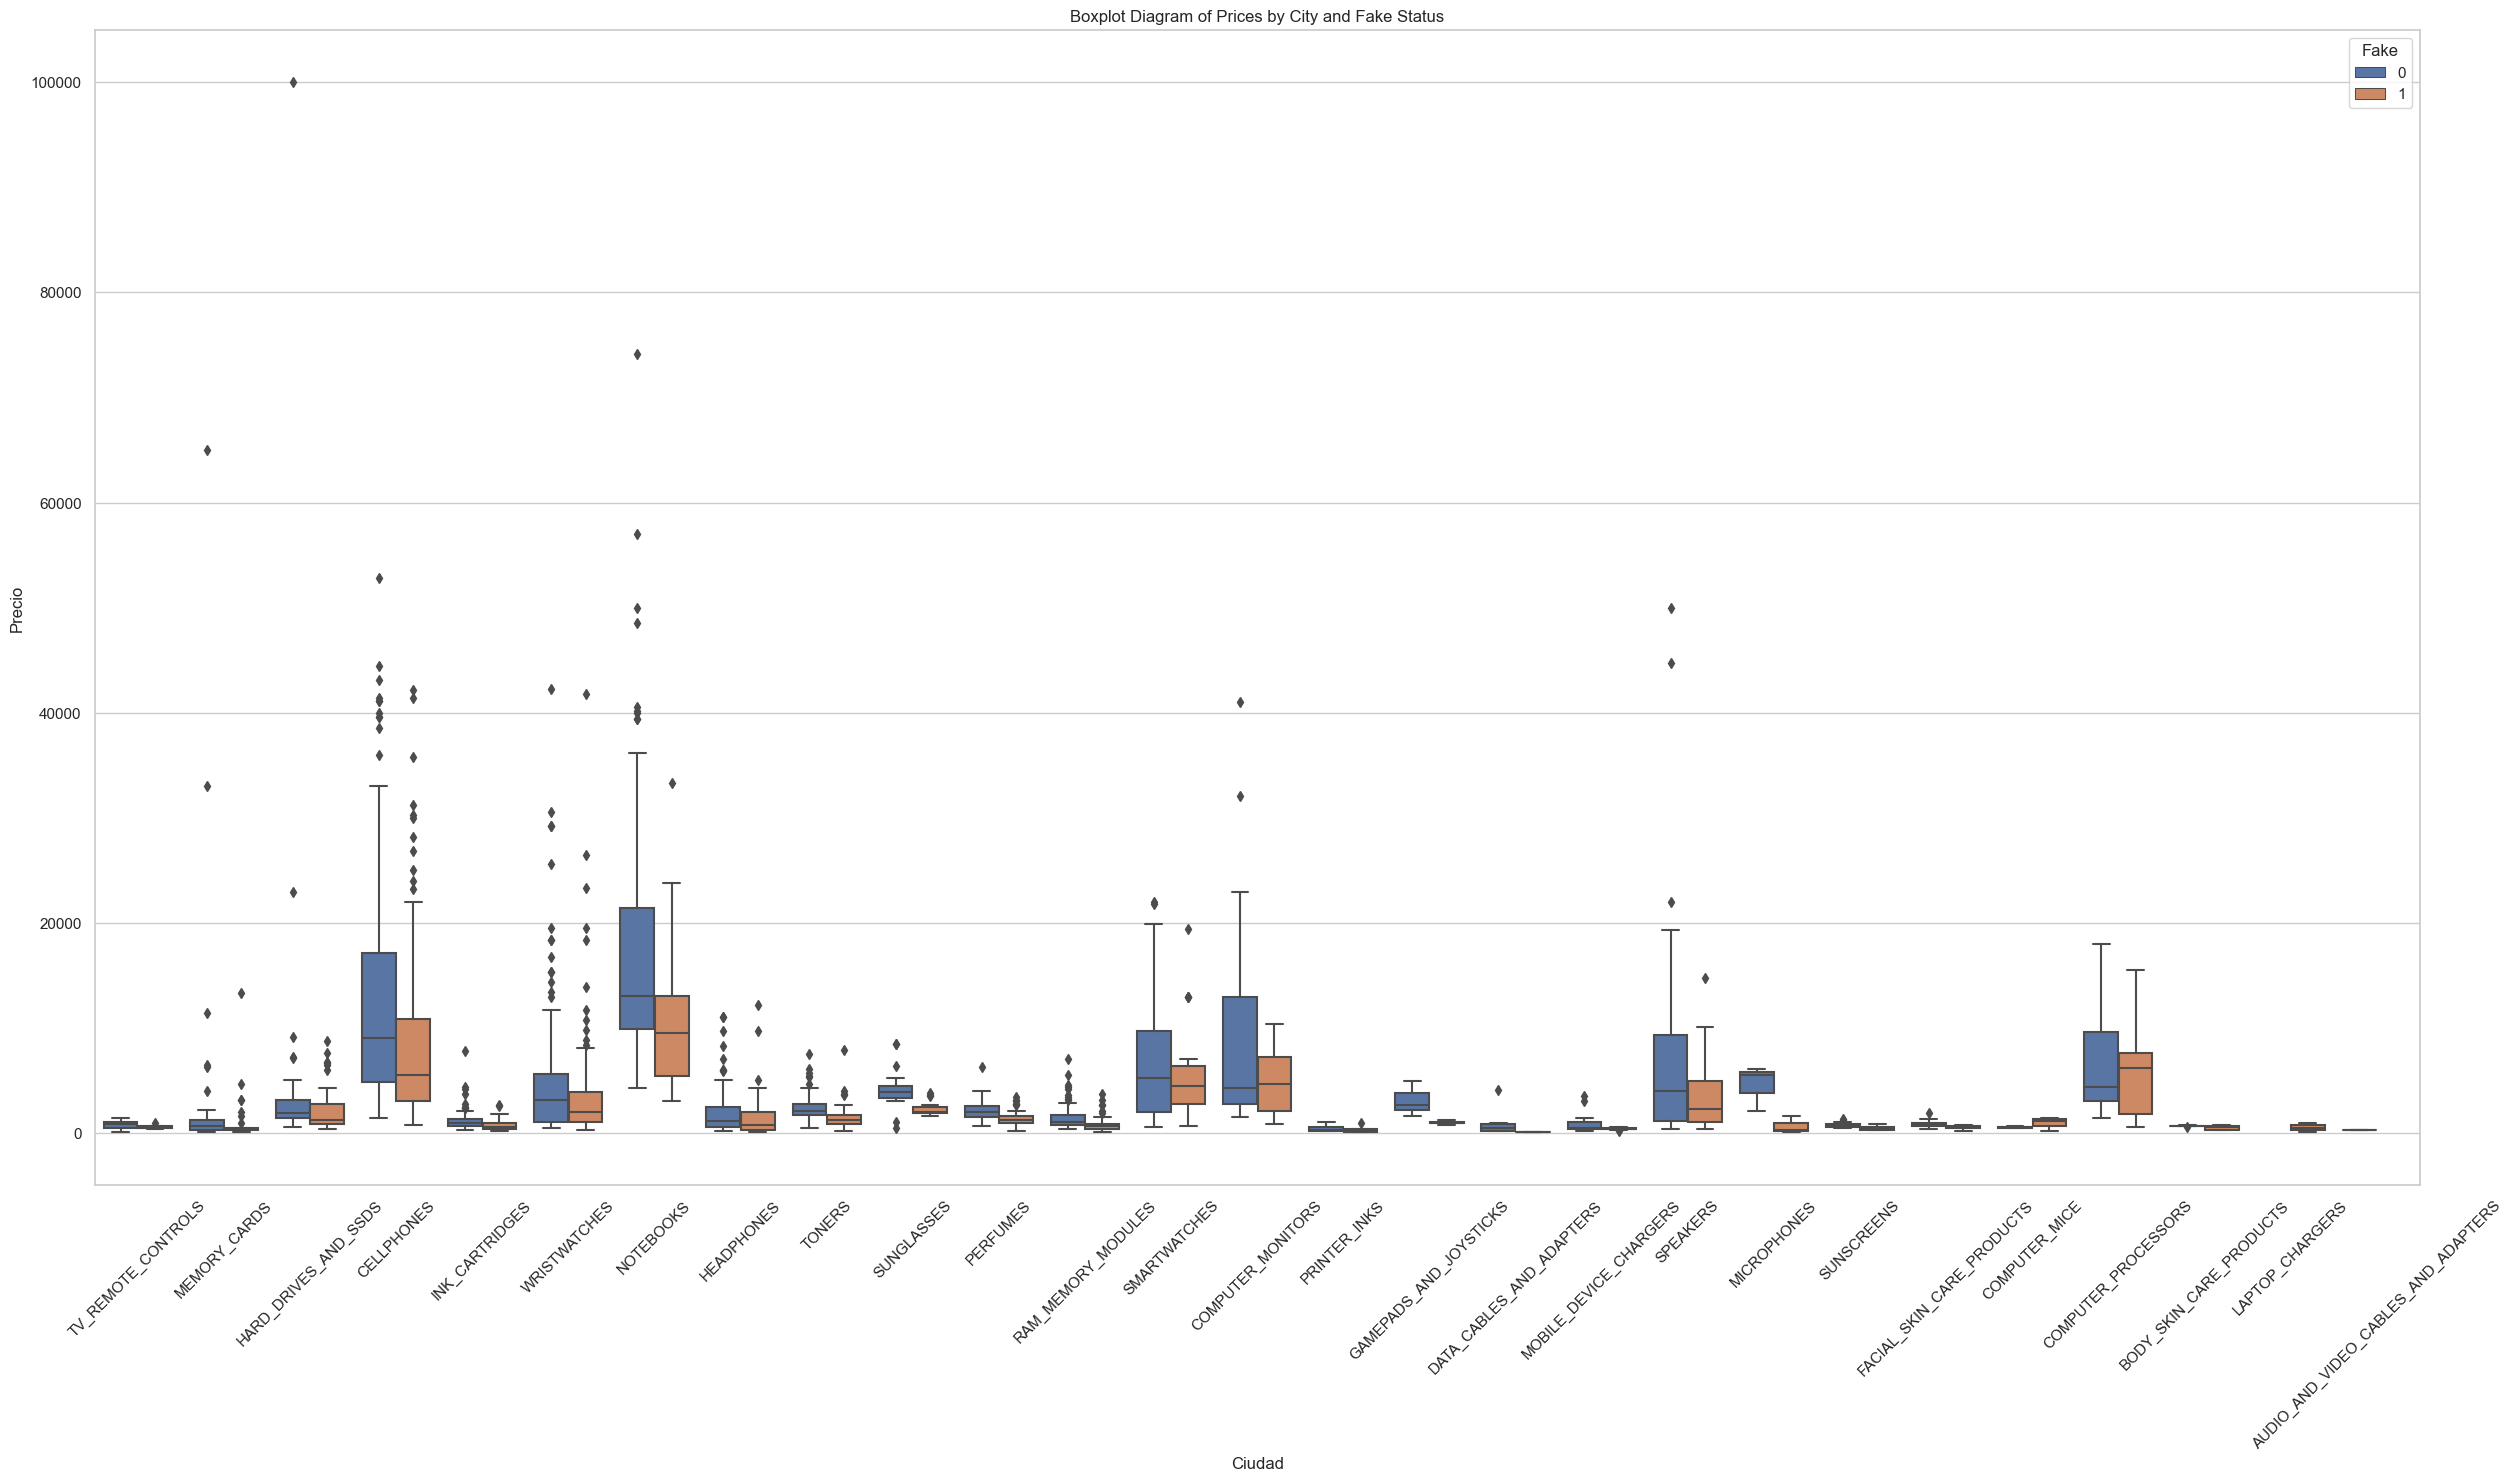

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["MEXICO"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

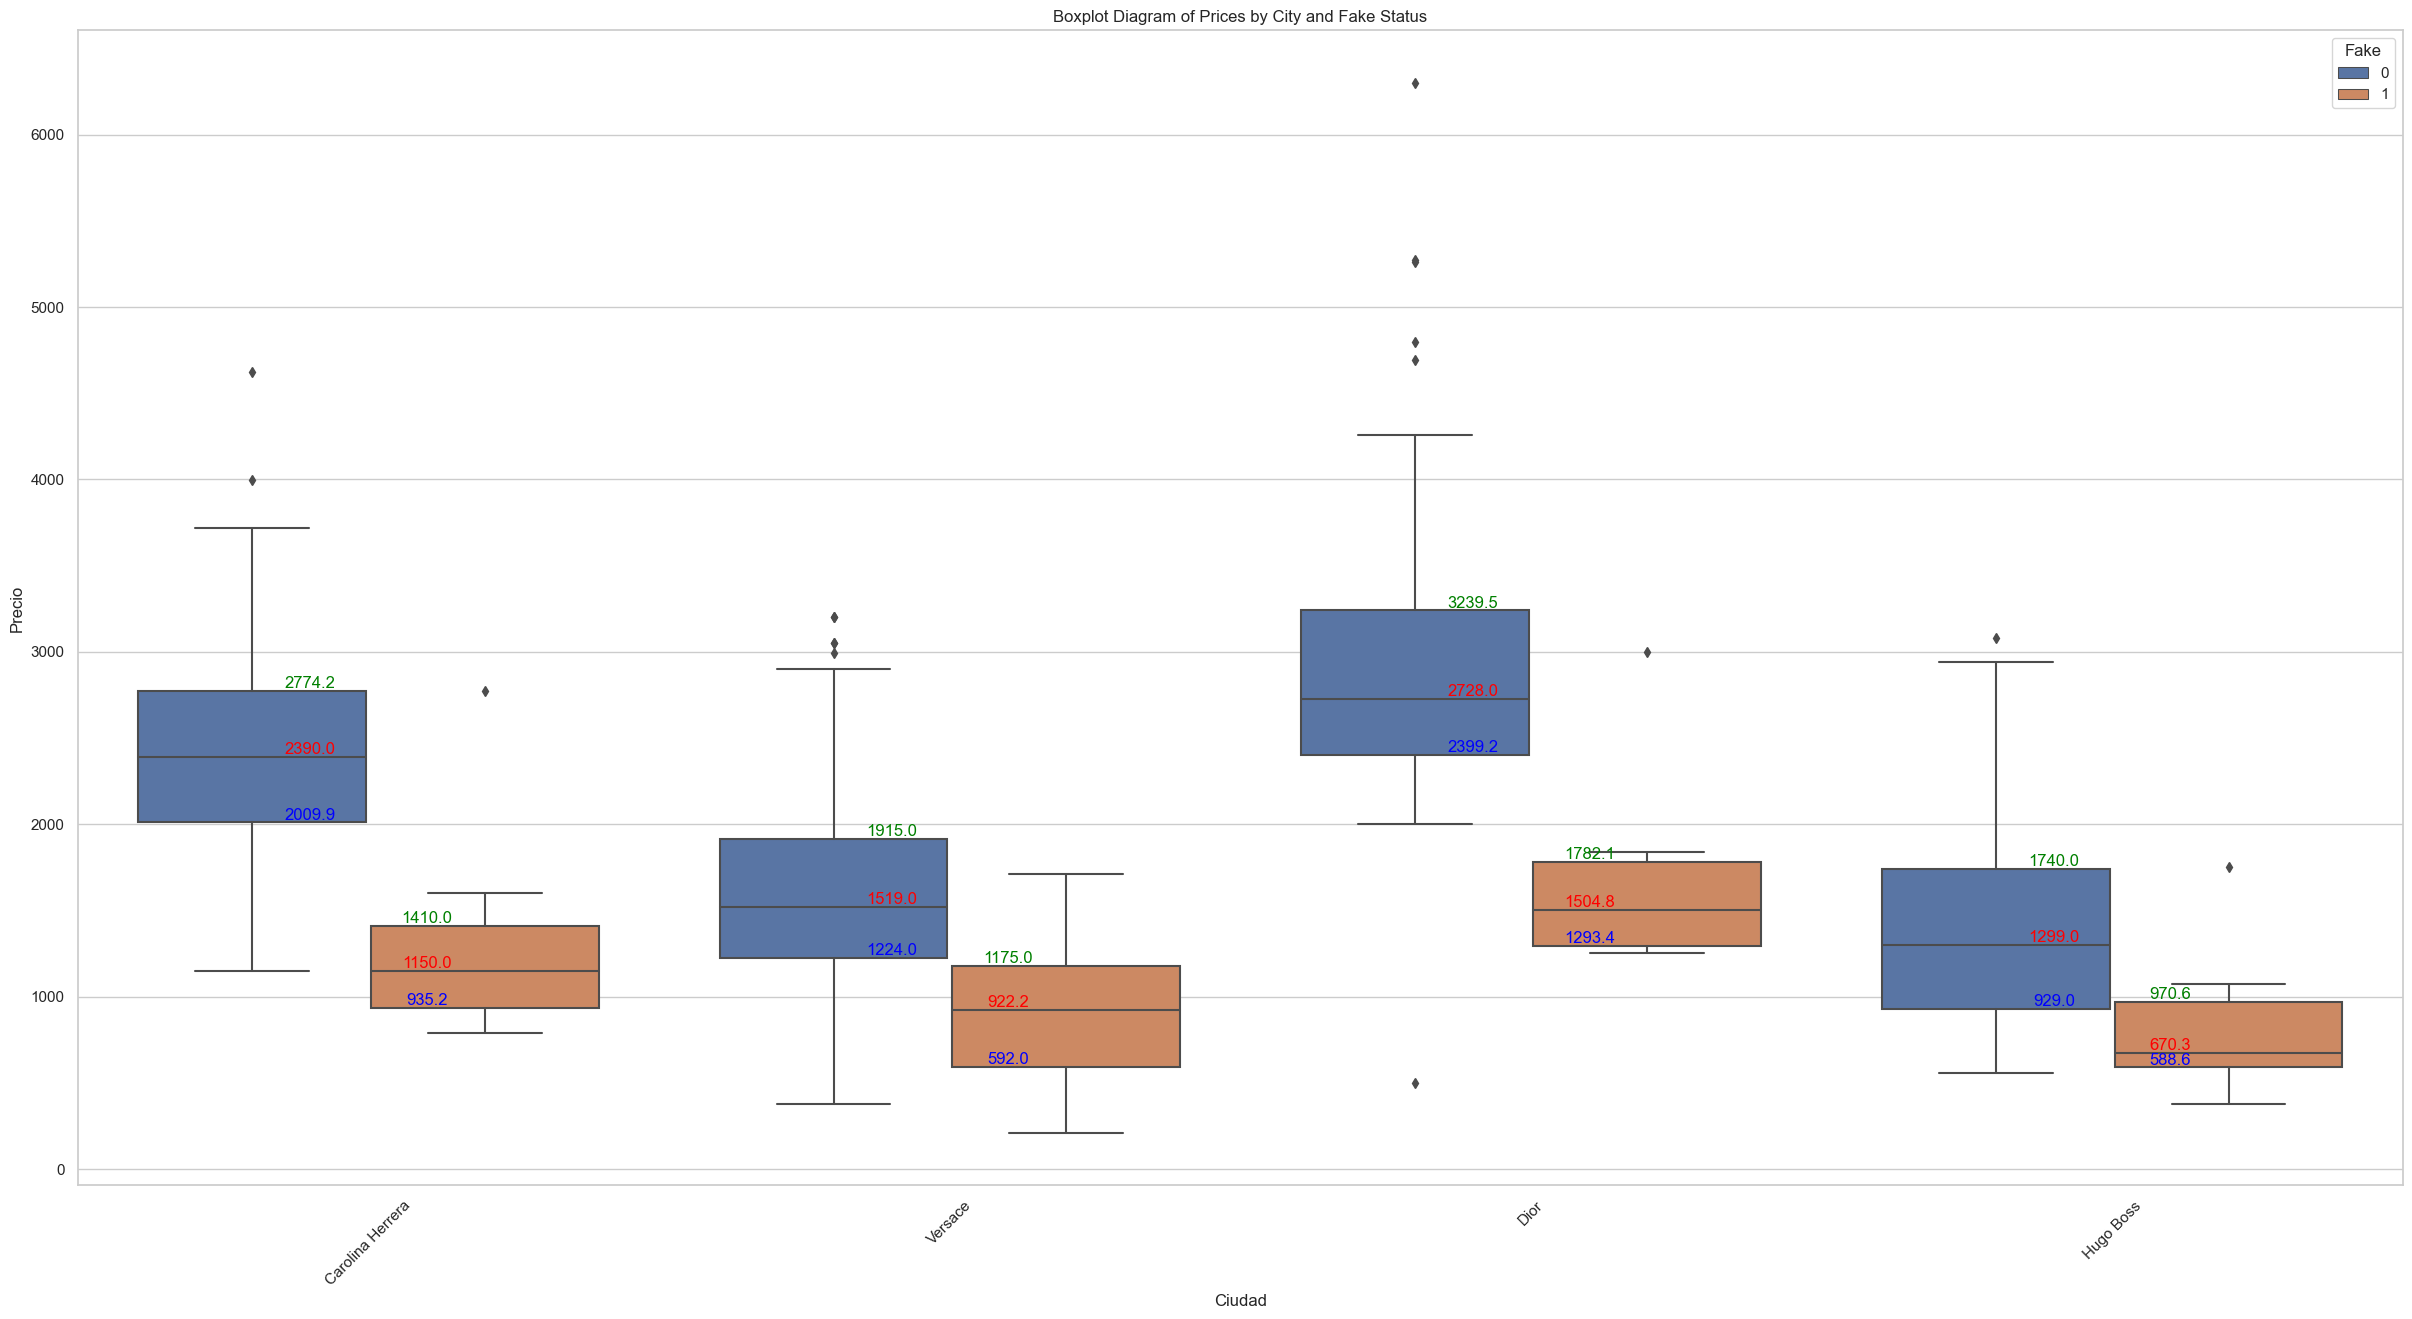

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["MEXICO"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

## _BRAZIL_


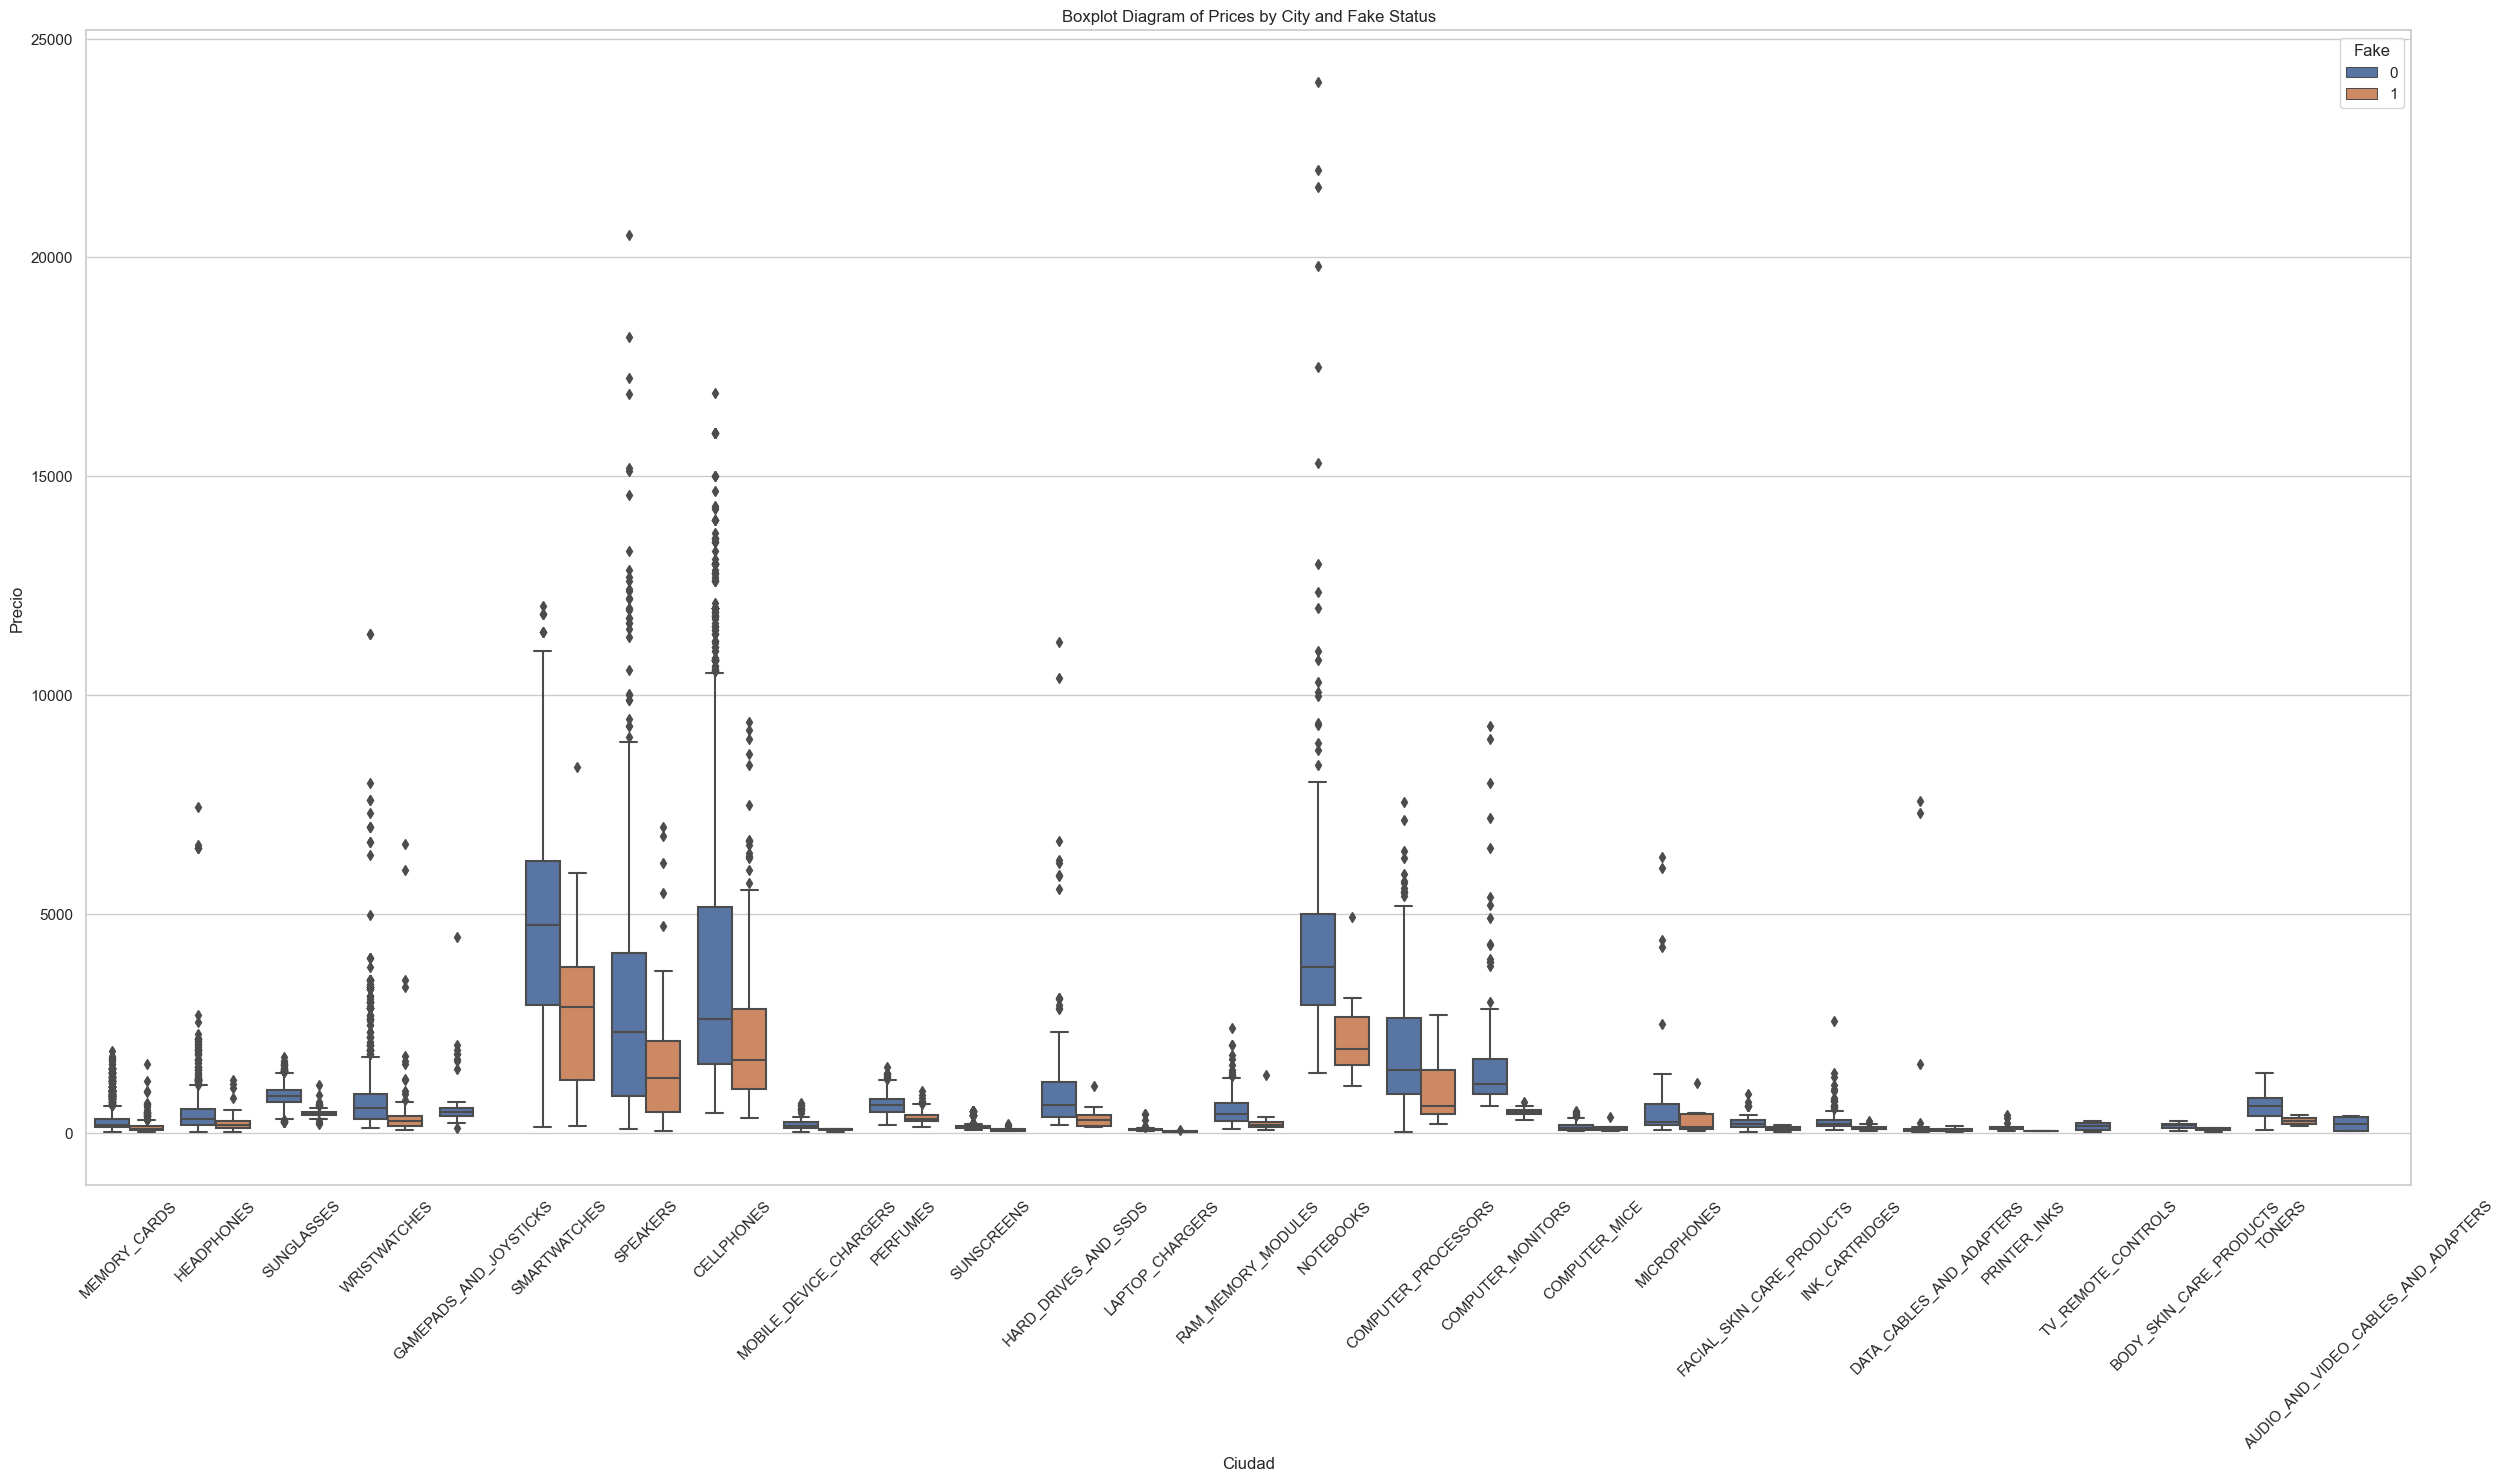

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[
        data["site_id"].isin(["BRASIL"])
        & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
    ],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

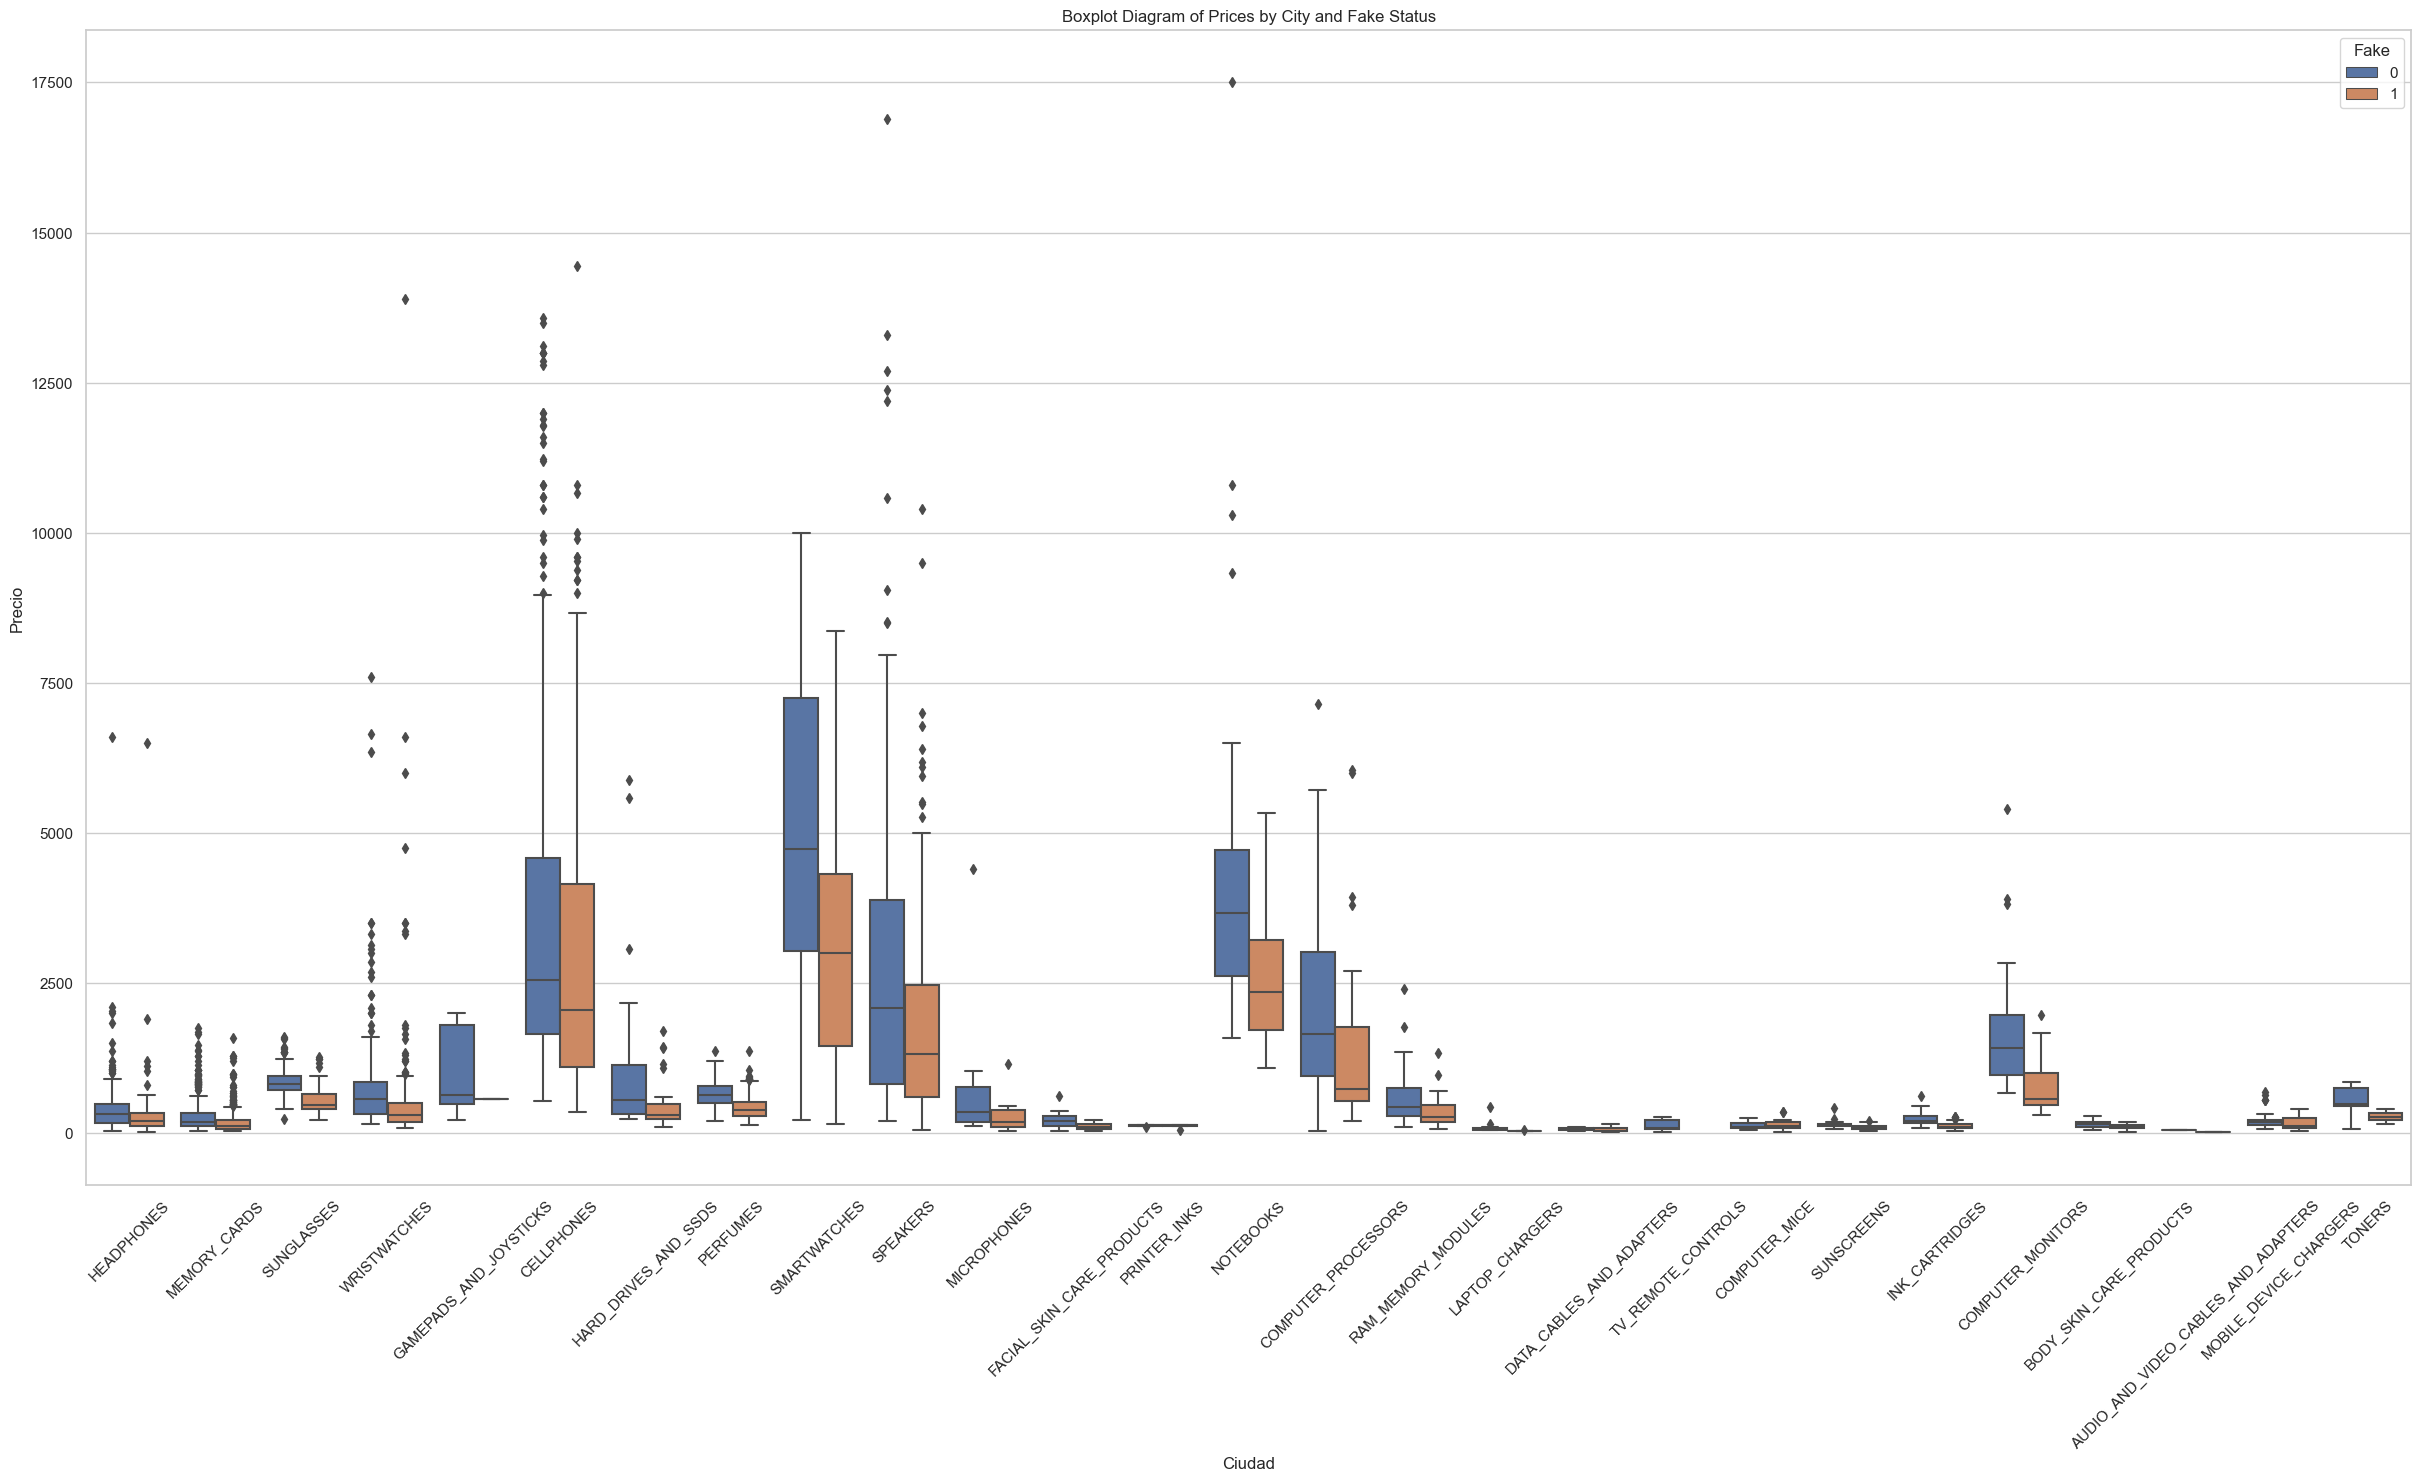

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["BRASIL"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

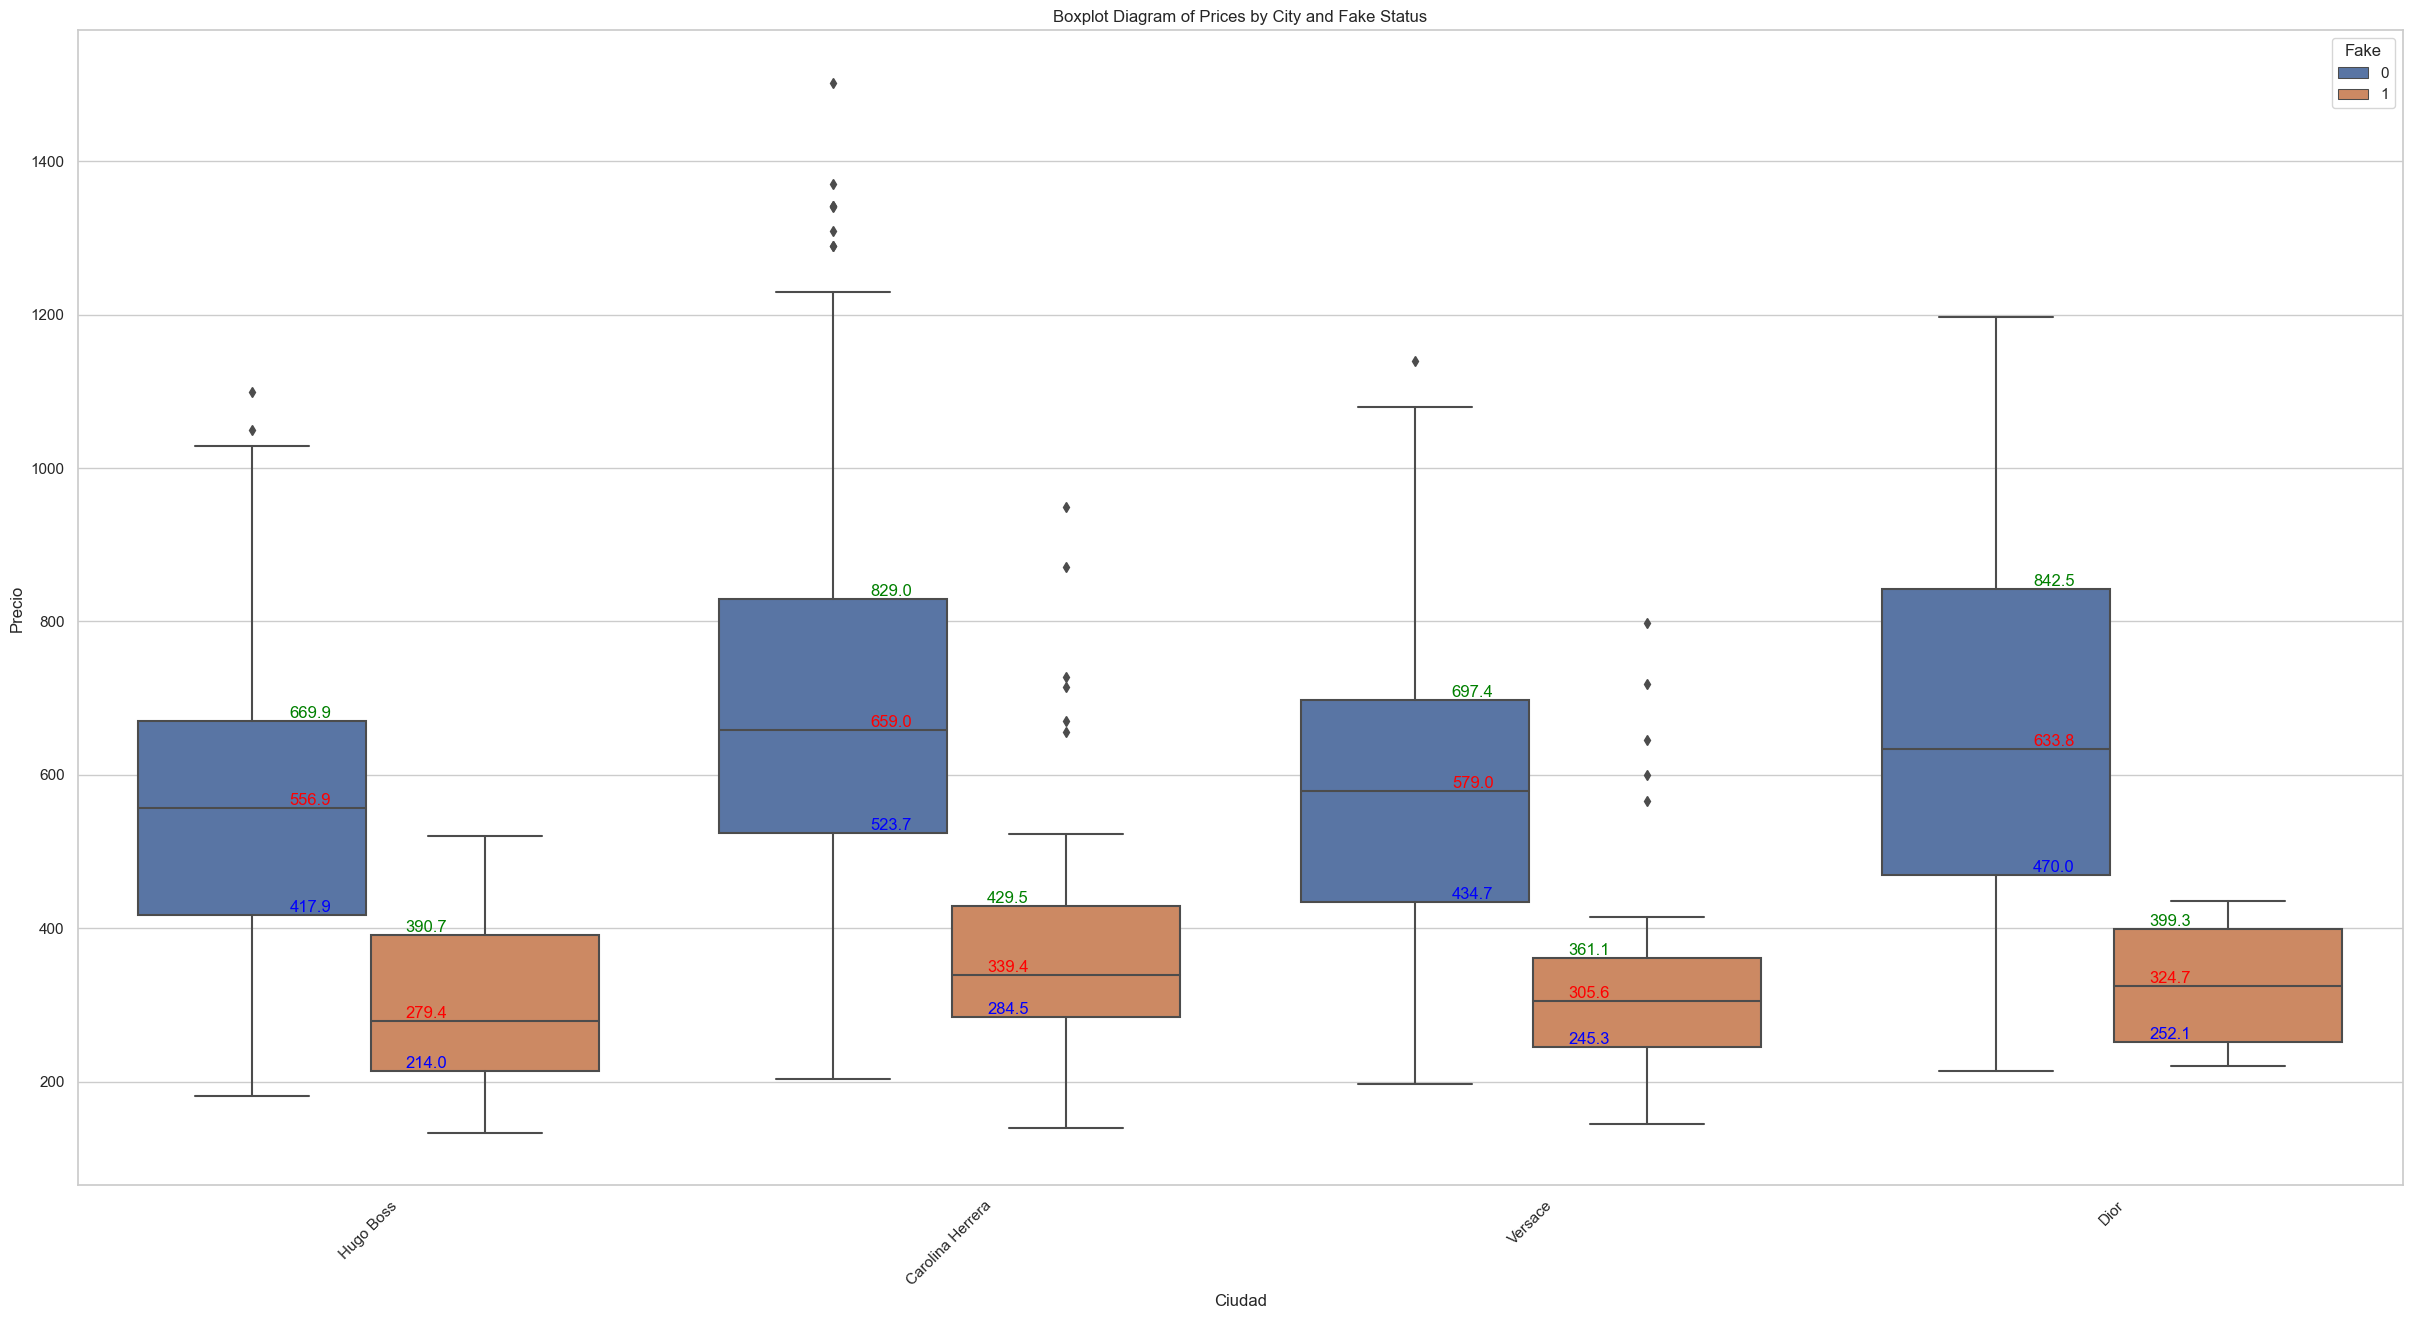

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["BRASIL"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

## _PERU_


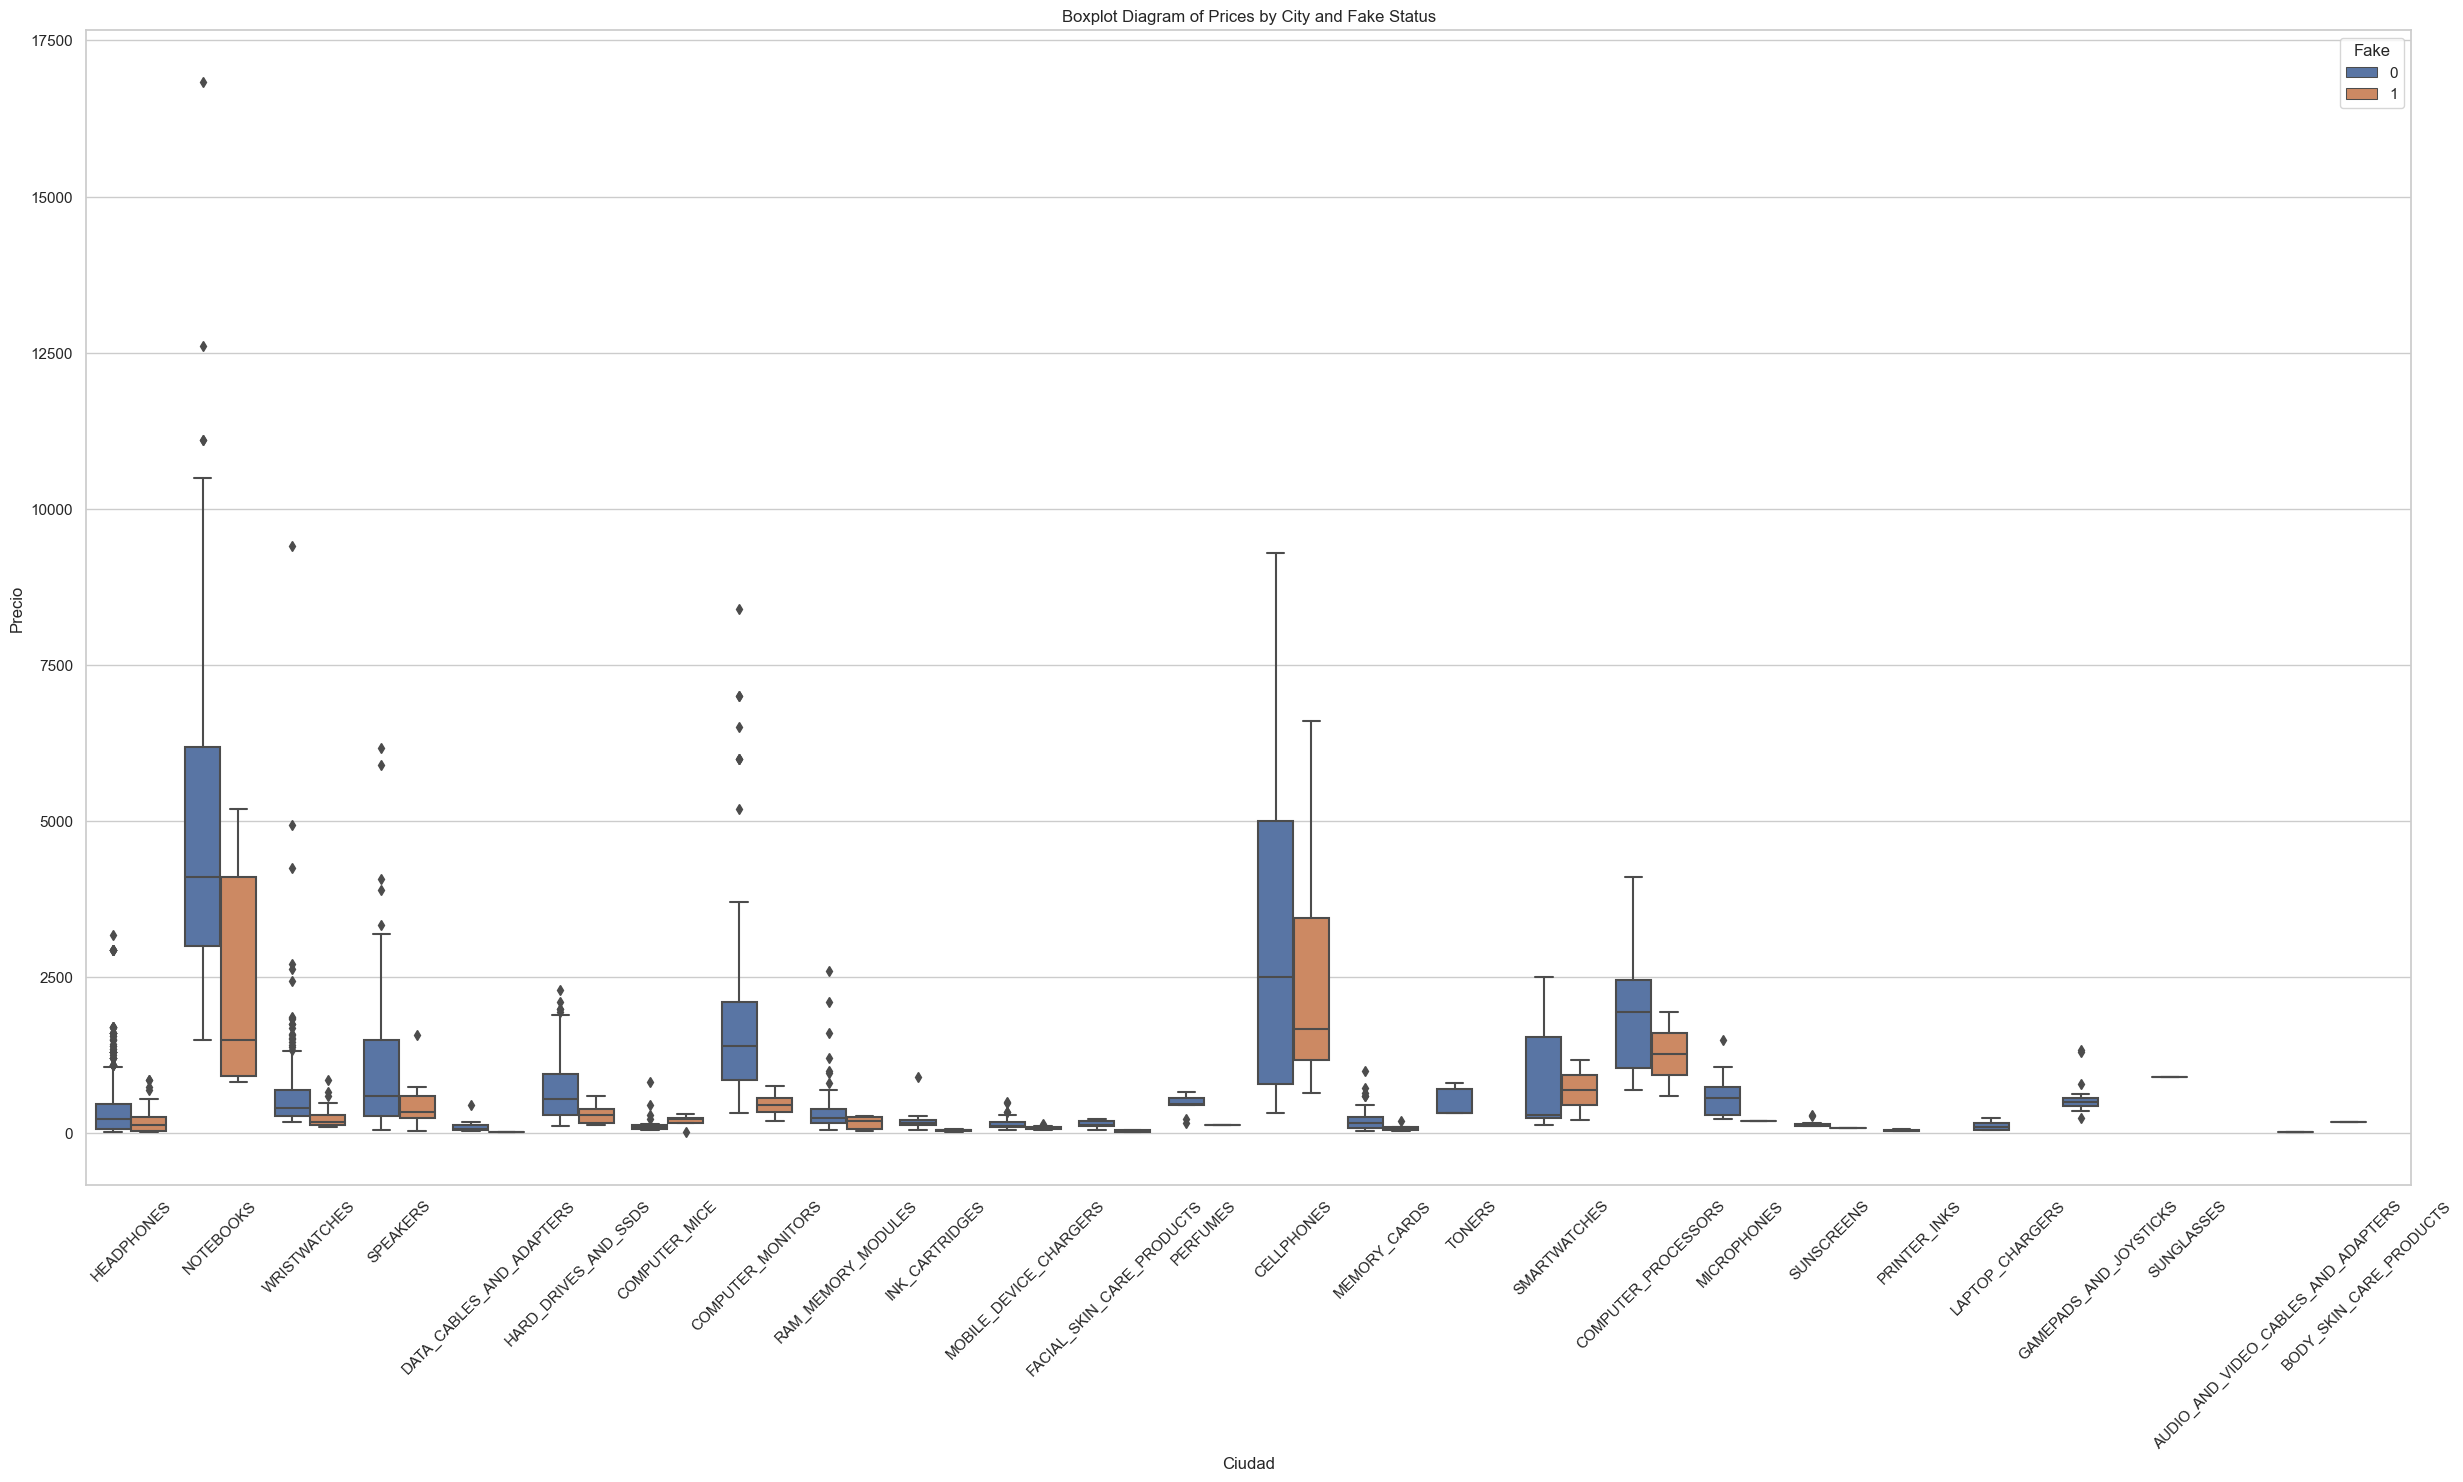

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[
        (data["site_id"].isin(["PERU"]))
        & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
    ],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

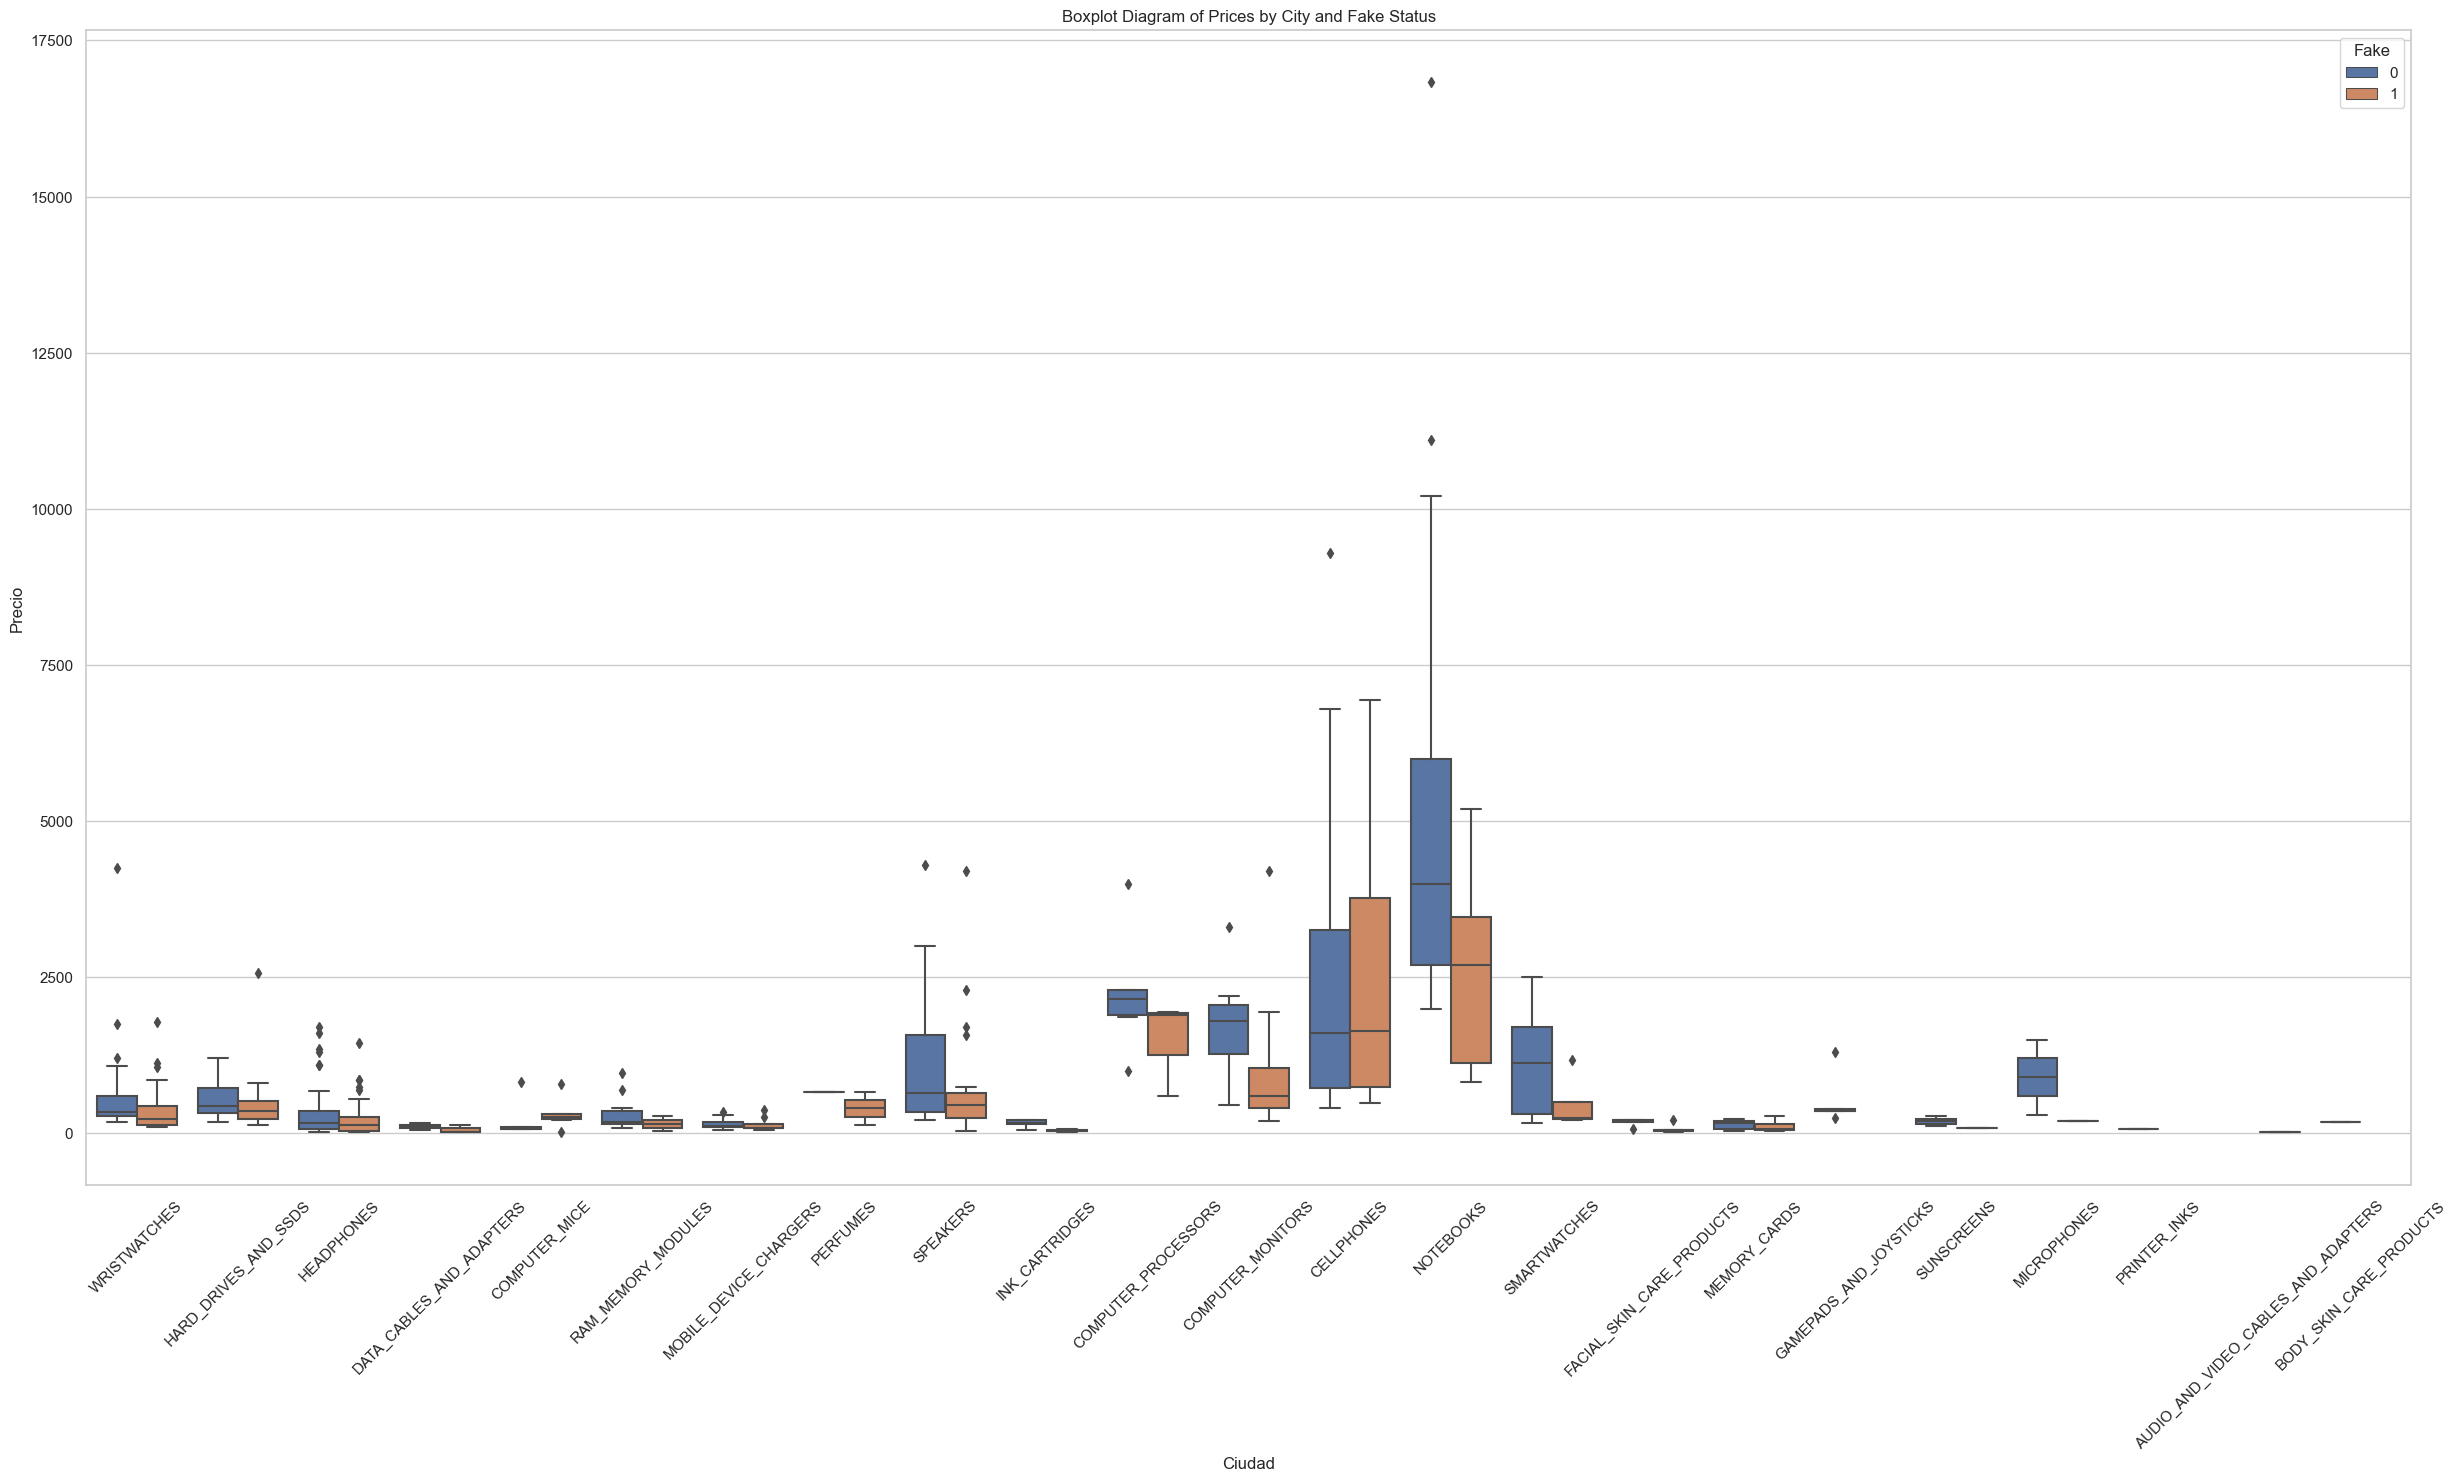

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[(data["site_id"].isin(["PERU"])) & (data["Score"] > 0.76)],
    x="Dominio_normalizado",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

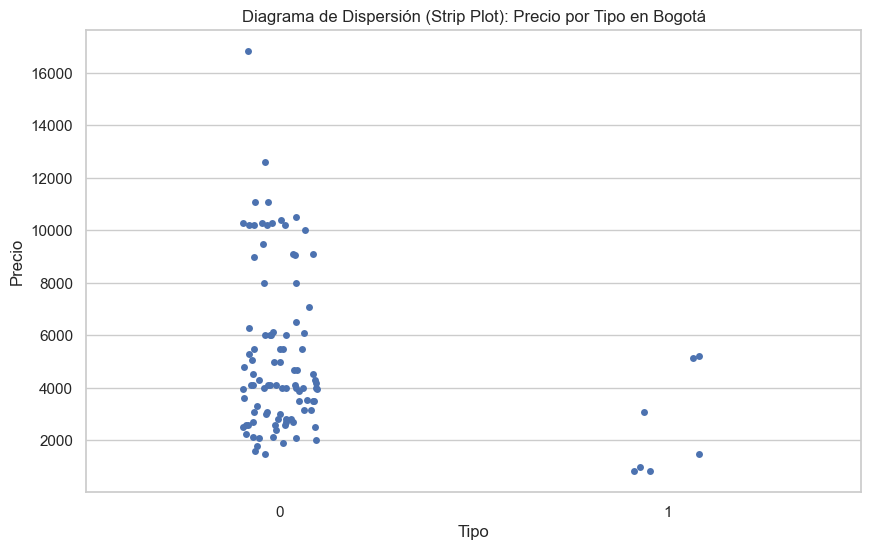

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos para Bogotá
df_bogota = data[
    (data["site_id"] == "PERU")
    & (data["Dominio_normalizado"] == "NOTEBOOKS")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_bogota, x="Fake", y="Precio", jitter=True)

plt.title("Diagrama de Dispersión (Strip Plot): Precio por Tipo en Bogotá")
plt.xlabel("Tipo")
plt.ylabel("Precio")
plt.show()

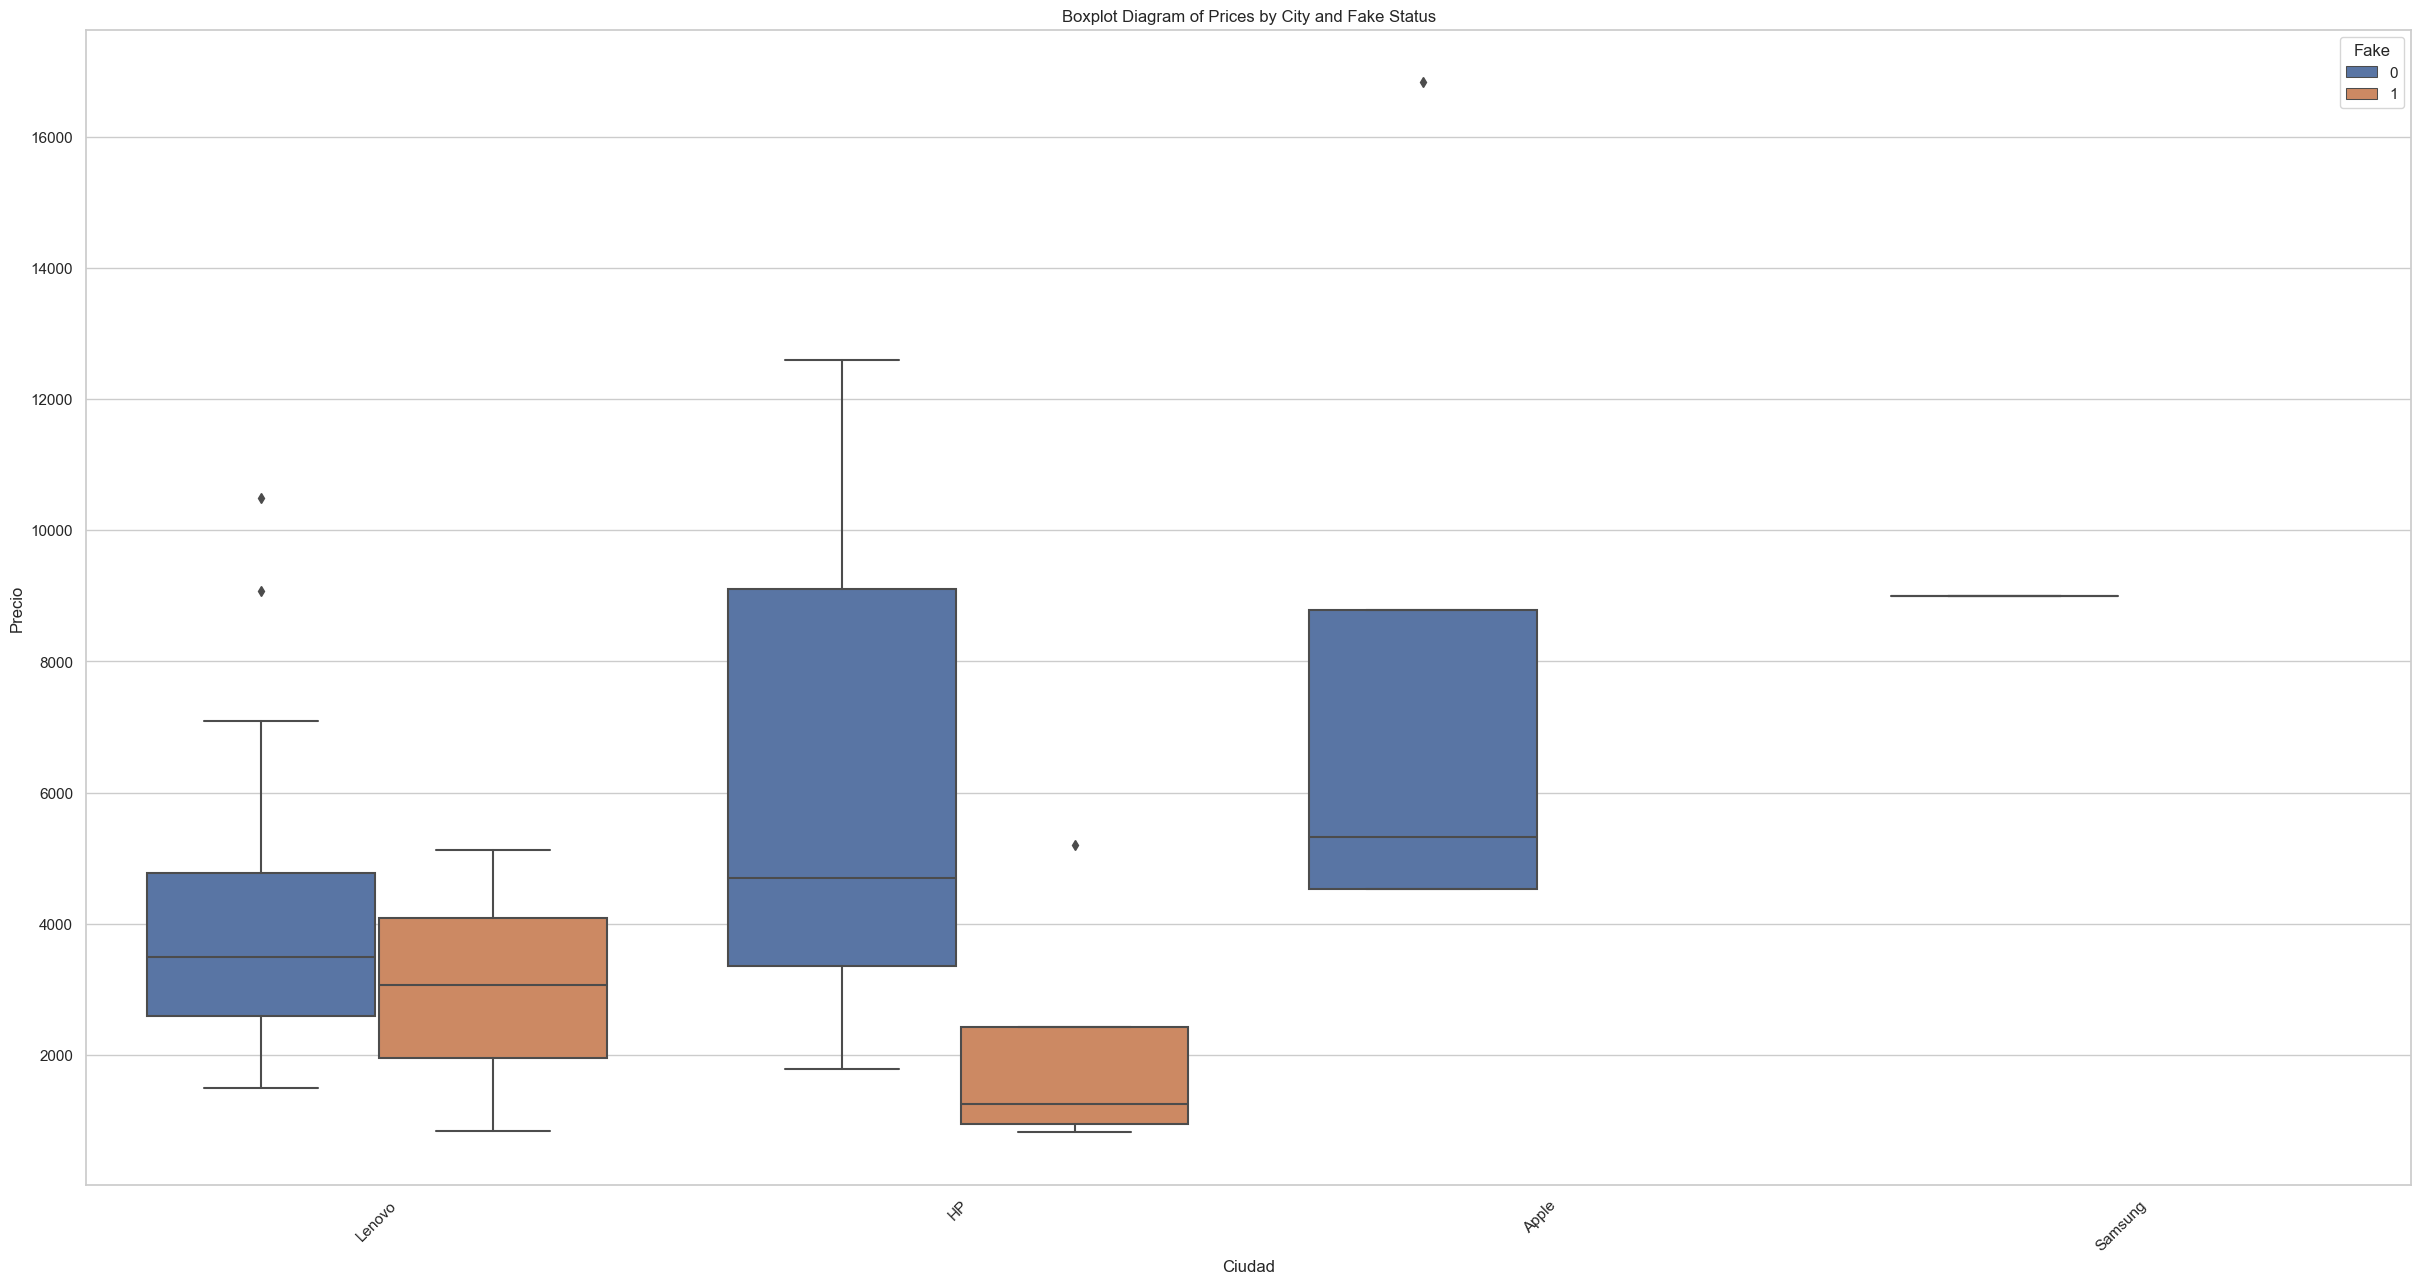

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
sns.boxplot(
    data=data[
        (data["site_id"].isin(["PERU"]))
        & (data["Dominio_normalizado"] == "NOTEBOOKS")
        & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
    ],
    x="Marca",
    y="Precio",
    hue="Fake",
)
plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

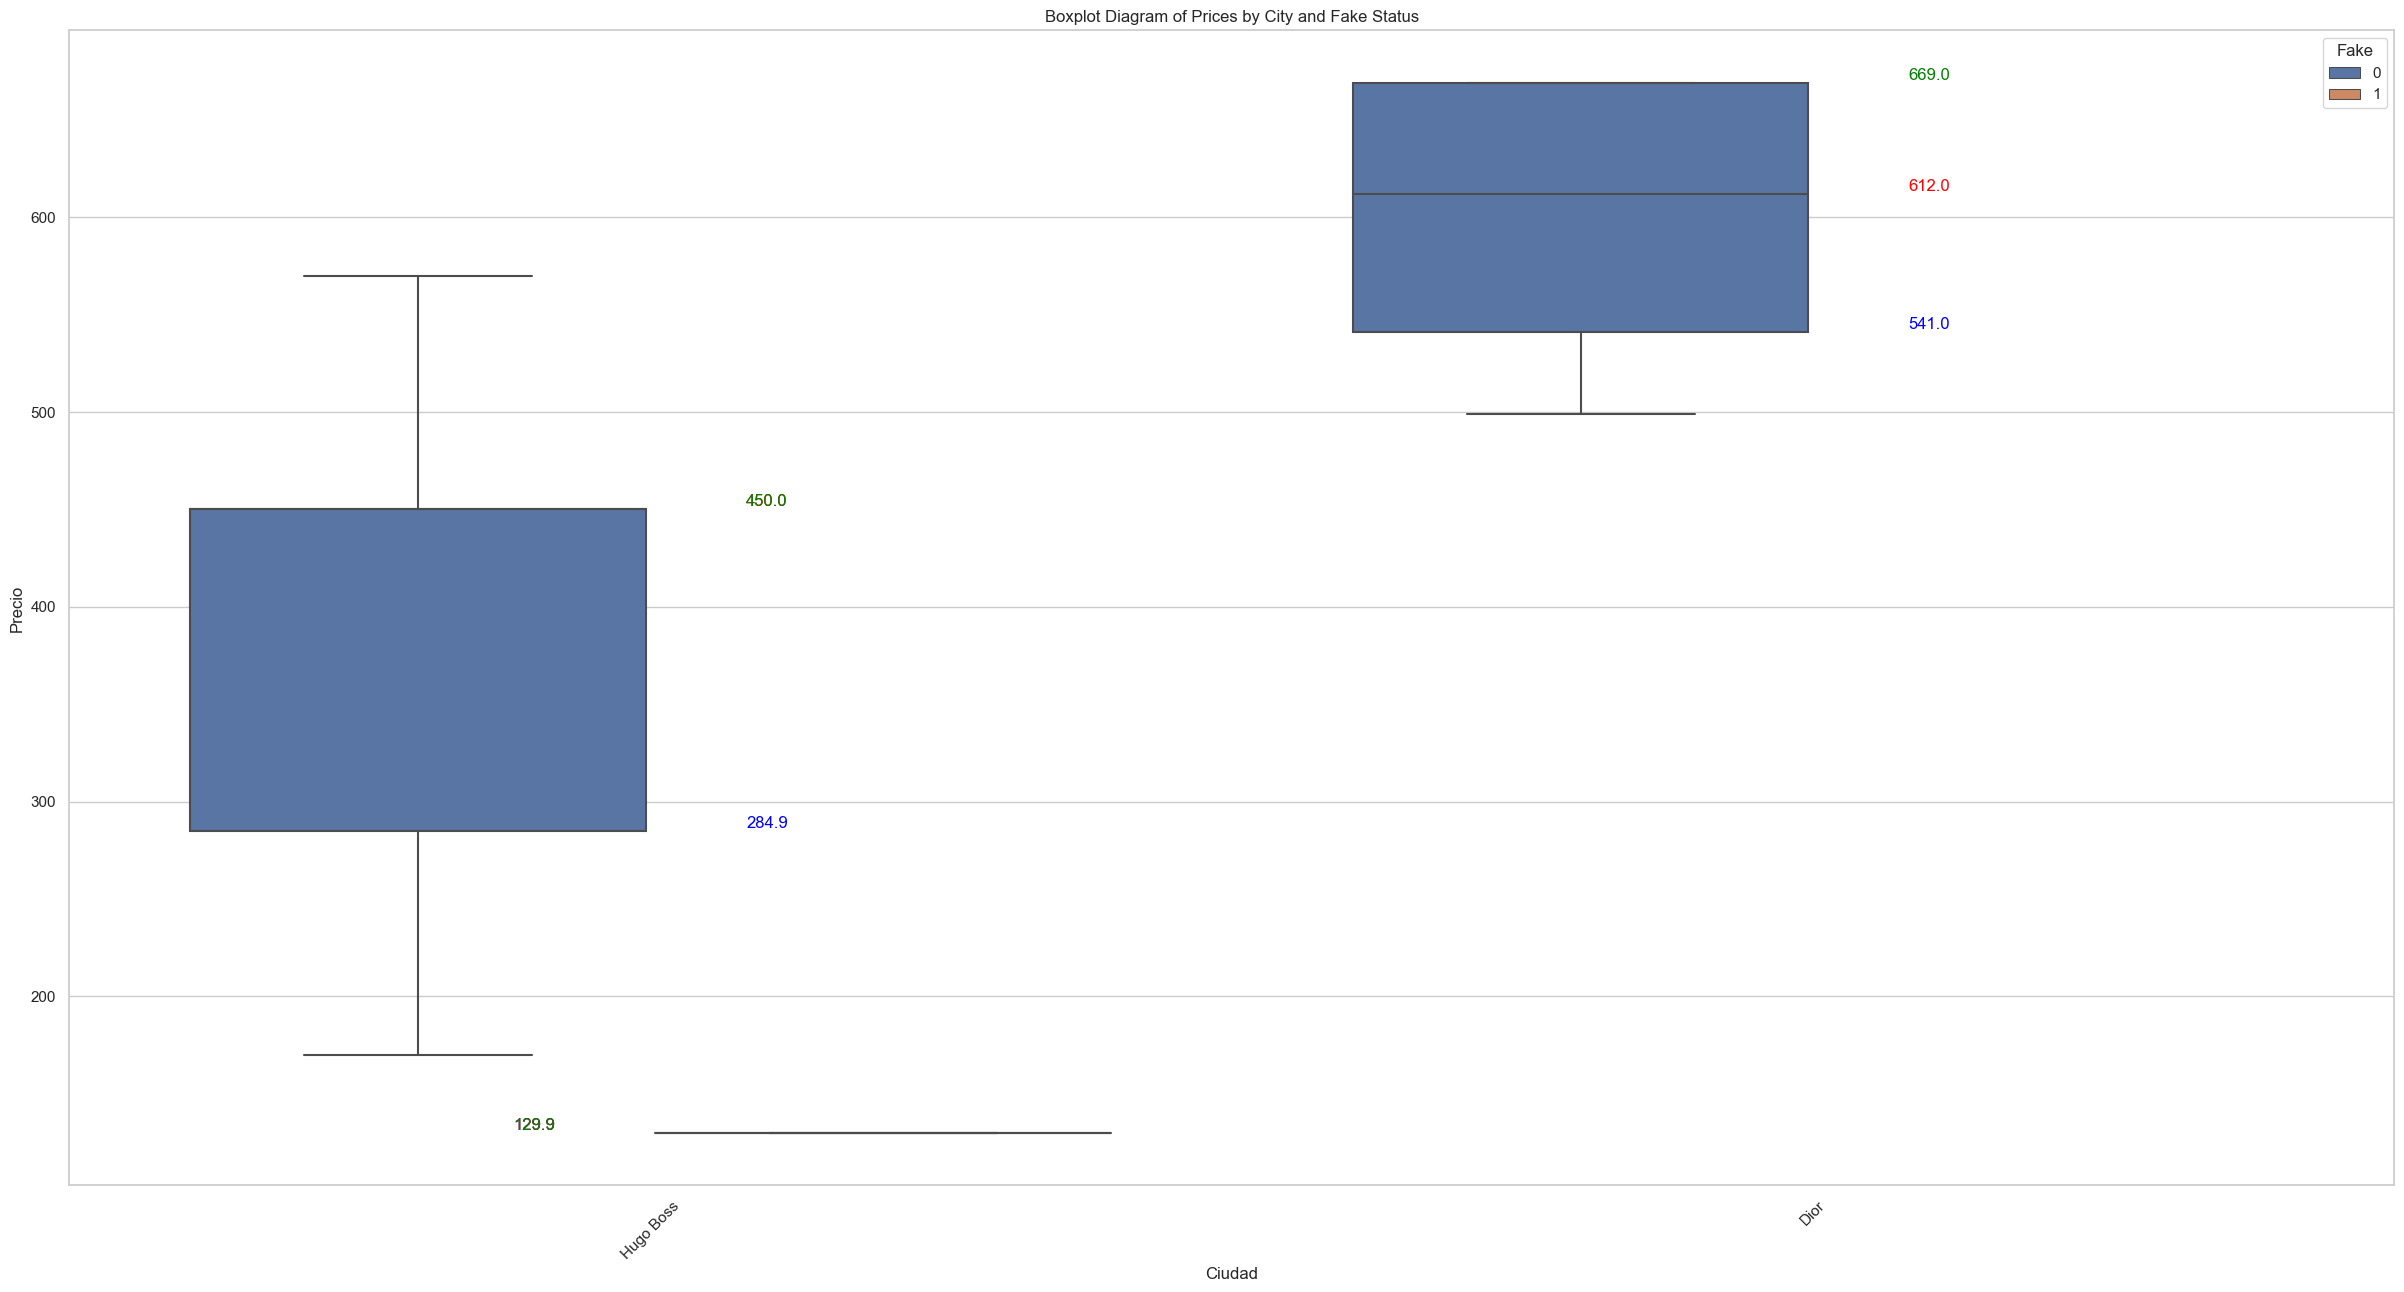

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt


data_use = data[
    (data["site_id"].isin(["PERU"]))
    & (data["Dominio_normalizado"] == "PERFUMES")
    & (data["Rule"].isin([np.NaN, None, "FK_PRICE"]))
]

plt.figure(figsize=(30, 15))
ax = sns.boxplot(data=data_use, x="Marca", y="Precio", hue="Fake")

# Agregar etiquetas para Q1 (25%), mediana (50%) y Q3 (75%)
for i, group in enumerate(data_use["Marca"].unique()):
    for j, f_val in enumerate(data_use["Fake"].unique()):
        # Filtrar datos para la combinación específica
        subset = data_use[(data_use["Marca"] == group) & (data_use["Fake"] == f_val)]
        if subset.empty:
            continue  # si no hay datos para esta combinación, saltar

        # Calcular Q1, mediana, Q3
        q1 = subset["Precio"].quantile(0.25)
        med = subset["Precio"].quantile(0.5)
        q3 = subset["Precio"].quantile(0.75)

        # 4. Calcular posición X de la etiqueta
        #    Por defecto, cada 'ciudad' se ubica en x = i
        #    y cada hue se desplaza un poco hacia la izquierda o derecha
        #    offset centrado en 0 según la cantidad de categorías en hue
        offset = (j - (len(data_use["Fake"].unique()) - 1) / 2) * 0.2
        x_pos = i + offset

        # 5. Anotar valores en el gráfico
        ax.text(x_pos, q1, f"{q1:.1f}", ha="center", va="bottom", color="blue")
        ax.text(x_pos, med, f"{med:.1f}", ha="center", va="bottom", color="red")
        ax.text(x_pos, q3, f"{q3:.1f}", ha="center", va="bottom", color="green")


plt.title("Boxplot Diagram of Prices by City and Fake Status")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=45)
plt.show()

# **Gruped Data to Export**


## _Export Site and Domain_


All


In [186]:
data_2 = data[data["Score"] > 0.76]
df_domains_site_total = (
    data_2.groupby(["site_id", "Dominio_normalizado"])
    .agg(
        {
            "Titulo": lambda x: " ".join(x),
            "seller_id": pd.Series.nunique,
            "element_id": "count",
            "Marca": pd.Series.nunique,
            "Fake": lambda x: x.sum() / len(x),
            "Precio": [
                ("min", "min"),
                ("percentile25", lambda x: x.quantile(0.25)),
                ("mean", "mean"),
                ("median", "median"),
                ("percentile75", lambda x: x.quantile(0.75)),
                ("max", "max"),
                ("std", "std"),
            ],
        }
    )
    .reset_index()
)
df_domains_site_total.columns = [
    "_".join(col).strip() for col in df_domains_site_total.columns.values
]
df_domains_site_total = df_domains_site_total.rename(
    columns={
        "site_id_": "site_id",
        "Dominio_normalizado_": "Dominio_normalizado",
        "Titulo_<lambda>": "titles",
        "seller_id_nunique": "num_sellers",
        "site_id_nunique": "num_countries",
        "element_id_count": "num_elements",
        "Marca_nunique": "num_marca",
        "Fake_<lambda>": "fake",
        "Precio_mean": "mean_price",
        "Precio_percentile25": "percentile25_price",
        "Precio_percentile75": "percentile75_price",
        "Precio_median": "median_price",
        "Precio_min": "min_price",
        "Precio_max": "max_price",
        "Precio_std": "std_price",
    }
)
# df_domains_site_total = df_domains_site_total[]
df_domains_site_total.head()

site_id      Dominio_normalizado   
0  ARGENTINA  BODY_SKIN_CARE_PRODUCTS  \
1  ARGENTINA               CELLPHONES   
2  ARGENTINA            COMPUTER_MICE   
3  ARGENTINA        COMPUTER_MONITORS   
4  ARGENTINA      COMPUTER_PROCESSORS   

                                              titles  num_sellers   
0  La Roche Posay Lipikar Baume Ap+m Eco-tube 200...           16  \
1  Calidad premium! Motorola Moto G04s Concord Bl...           62   
2  Xiaomi Wireless Mouse 3 Color Negro Xiaomi Mou...           13   
3  Monitor Led Samsung Lf27t350 27'' Fullhd Ips 7...           28   
4  Microprocesador Intel Core I5-14400 Bx80715144...           22   

   num_elements  num_marca      fake  min_price  percentile25_price   
0            27          2  0.370370    14772.5          28520.6000  \
1           328          9  0.387195    64500.0         260650.0000   
2            22          3  0.409091     6999.0          15239.1075   
3           146          6  0.438356    89999.5         239120.7500   
4           125          5  0.416000    37999.5         135319.5000   

      mean_price  median_price  percentile75_price   max_price     std_price  
0   51581.943333      49616.00            71355.00    93145.00  2.280496e+04  
1  585563.600305     413516.50           653137.00  4599999.00  6.086185e+05  
2   55418.383182      45082.50            78146.50   307379.00  6.378043e+04  
3  733455.382603     345732.62           729752.25  7861519.00  1.115483e+06  
4  433627.242240     291949.50           549999.00  4069788.36  5.048424e+05

Fake


In [170]:
data_2 = data[(data["Score"] > 0.76) & (data["Fake"] == 1)]
df_domain_site_fake = (
    data_2.groupby(["site_id", "Dominio_normalizado"])
    .agg(
        {
            "Titulo": lambda x: " ".join(x),
            "seller_id": pd.Series.nunique,
            "element_id": "count",
            "Marca": pd.Series.nunique,
            "Fake": lambda x: x.sum() / len(x),
            "Precio": [
                ("min", "min"),
                ("percentile25", lambda x: x.quantile(0.25)),
                ("mean", "mean"),
                ("median", "median"),
                ("percentile75", lambda x: x.quantile(0.75)),
                ("max", "max"),
                ("std", "std"),
            ],
        }
    )
    .reset_index()
)
df_domain_site_fake.columns = [
    "_".join(col).strip() for col in df_domain_site_fake.columns.values
]
df_domain_site_fake = df_domain_site_fake.rename(
    columns={
        "site_id_": "site_id",
        "Dominio_normalizado_": "Dominio_normalizado",
        "Titulo_<lambda>": "titles",
        "seller_id_nunique": "num_sellers",
        "site_id_nunique": "num_countries",
        "element_id_count": "num_elements",
        "Marca_nunique": "num_marca",
        "Fake_<lambda>": "fake",
        "Precio_mean": "mean_price",
        "Precio_percentile25": "percentile25_price",
        "Precio_percentile75": "percentile75_price",
        "Precio_median": "median_price",
        "Precio_min": "min_price",
        "Precio_max": "max_price",
        "Precio_std": "std_price",
    }
)
# df_domain_site_fake = df_domain_site_fake[]
df_domain_site_fake.head()

site_id      Dominio_normalizado   
0  ARGENTINA  BODY_SKIN_CARE_PRODUCTS  \
1  ARGENTINA               CELLPHONES   
2  ARGENTINA            COMPUTER_MICE   
3  ARGENTINA        COMPUTER_MONITORS   
4  ARGENTINA      COMPUTER_PROCESSORS   

                                              titles  num_sellers   
0  Bálsamo Raparador Para Cuerpo La Roche-posay C...           10  \
1  Calidad premium! Motorola Moto G04s Concord Bl...           46   
2  Xiaomi Wireless Mouse 3 Color Negro Xiaomi Mou...            8   
3  Monitor Led Samsung Lf27t350 27'' Fullhd Ips 7...           19   
4  Microprocesador Intel Core I5-14400 Bx80715144...           18   

   num_elements  num_marca  fake  min_price  percentile25_price   
0            10          2   1.0    14772.5          27273.3425  \
1           127          8   1.0    64500.0         187386.2500   
2             9          3   1.0     6999.0          11341.5000   
3            64          5   1.0    89999.5         215749.1250   
4            52          4   1.0    37999.5          97037.0000   

      mean_price  median_price  percentile75_price  max_price     std_price  
0   51635.128000      50766.50          77512.4925    93145.0  2.833522e+04  
1  456108.268031     344499.00         592999.0000  2399999.0  3.974313e+05  
2   28071.158889      12292.50          33657.0000    96599.0  2.991232e+04  
3  707480.830625     333769.50         708324.6250  7861519.0  1.208517e+06  
4  331343.173462     235494.75         525024.0000  1074959.5  2.735639e+05

Not Fake


In [214]:
data_2 = data[(data["Score"] > 0.76) & (data["Fake"] == 0)]
df_domain_site_not_fake = (
    data_2.groupby(["site_id", "Dominio_normalizado"])
    .agg(
        {
            "Titulo": lambda x: " ".join(x),
            "seller_id": pd.Series.nunique,
            "element_id": "count",
            "Marca": pd.Series.nunique,
            "Fake": lambda x: x.sum() / len(x),
            "Precio": [
                ("min", "min"),
                ("percentile25", lambda x: x.quantile(0.25)),
                ("mean", "mean"),
                ("median", "median"),
                ("percentile75", lambda x: x.quantile(0.75)),
                ("max", "max"),
                ("std", "std"),
            ],
        }
    )
    .reset_index()
)
df_domain_site_not_fake.columns = [
    "_".join(col).strip() for col in df_domain_site_not_fake.columns.values
]
df_domain_site_not_fake = df_domain_site_not_fake.rename(
    columns={
        "site_id_": "site_id",
        "Dominio_normalizado_": "Dominio_normalizado",
        "Titulo_<lambda>": "titles",
        "seller_id_nunique": "num_sellers",
        "site_id_nunique": "num_countries",
        "element_id_count": "num_elements",
        "Marca_nunique": "num_marca",
        "Fake_<lambda>": "fake",
        "Precio_mean": "mean_price",
        "Precio_percentile25": "percentile25_price",
        "Precio_percentile75": "percentile75_price",
        "Precio_median": "median_price",
        "Precio_min": "min_price",
        "Precio_max": "max_price",
        "Precio_std": "std_price",
    }
)
# df_domain_site_not_fake = df_domain_site_not_fake[]
df_domain_site_not_fake.head()

site_id      Dominio_normalizado   
0  ARGENTINA  BODY_SKIN_CARE_PRODUCTS  \
1  ARGENTINA               CELLPHONES   
2  ARGENTINA            COMPUTER_MICE   
3  ARGENTINA        COMPUTER_MONITORS   
4  ARGENTINA      COMPUTER_PROCESSORS   

                                              titles  num_sellers   
0  La Roche Posay Lipikar Baume Ap+m Eco-tube 200...           13  \
1  Motorola Edge 40(esim) 256 Gb Eclipse Black 8 ...           57   
2  Xiaomi Wireless Mouse Lite 2 Color Negro Mouse...           10   
3  Monitor Gaming Samsung Odyssey Oled Lls27dg600...           21   
4  Procesador Gamer Intel Core I7-12700kf Bx80715...           22   

   num_elements  num_marca  fake  min_price  percentile25_price   
0            17          1   0.0    26855.0             40675.0  \
1           201          4   0.0   129000.0            319999.0   
2            13          3   0.0    14999.0             36899.0   
3            82          3   0.0   168479.0            241874.0   
4            73          2   0.0    66999.0            160613.0   

      mean_price  median_price  percentile75_price   max_price     std_price  
0   51550.658235       49616.0             60244.0    93145.00  1.983638e+04  
1  667358.760498      457999.0            697558.8  4599999.00  6.991107e+05  
2   74351.076923       57287.0             80999.0   307379.00  7.465375e+04  
3  753728.203659      370903.0            829246.5  7263609.00  1.044295e+06  
4  506487.126849      324898.0            557269.0  4069788.36  6.107272e+05

### Analisis


#### All

In [196]:
data_prop = data[
    (data["Score"] > 0.76) & (data["Rule"].isin(["FK_PRICE", np.nan, None]))
].copy()
df_domain_site = df_domains_site_total[
    [
        "site_id",
        "Dominio_normalizado",
        "mean_price",
        "percentile25_price",
        "percentile75_price",
        "median_price",
        "std_price",
    ]
].copy()
data_analyze = pd.merge(
    data_prop, df_domain_site, on=["site_id", "Dominio_normalizado"], how="left"
)
data_analyze["mean_std"] = data_analyze["mean_price"] - data_analyze["std_price"]
data_analyze["mean_2std"] = data_analyze["mean_price"] - 2 * data_analyze["std_price"]
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  Rollback  FK_TEST1  FK_TEST2   
0       22399.0       NaN   0.80      1  ...         0         0         0  \
1       86249.5  FK_PRICE   0.91      1  ...         0         0         0   
2      935999.5  FK_PRICE   0.99      1  ...         0         1         0   
3     1539998.9       NaN   0.84      1  ...         0         0         0   
4      343840.0       NaN   0.80      1  ...         0         0         0   
...         ...       ...    ...    ...  ...       ...       ...       ...   
9966      349.0       NaN   0.83      1  ...         0         0         0   
9967      245.0       NaN   0.90      1  ...         0         0         0   
9968      299.0       NaN   0.80      1  ...         0         0         0   
9969     2499.0       NaN   0.83      1  ...         0         0         0   
9970       40.0       NaN   0.86      1  ...         0         0         0   

        mean_price  percentile25_price  percentile75_price  median_price   
0     9.327210e+04        3.543100e+04          116024.000      72110.28  \
1     3.467671e+05        7.451900e+04          399999.000     135262.00   
2     1.629486e+06        1.020074e+06         1999999.000    1500525.75   
3     1.629486e+06        1.020074e+06         1999999.000    1500525.75   
4     2.129838e+05        1.586888e+05          257800.000     209896.00   
...            ...                 ...                 ...           ...   
9966  4.530914e+02        2.245000e+02             479.000        329.00   
9967  9.093874e+02        2.999000e+02            1107.000        559.00   
9968  2.741119e+02        5.900000e+01             329.250        141.43   
9969  9.550857e+02        2.328300e+02            1544.320        599.45   
9970  1.282738e+02        6.250250e+01             199.125        104.00   

          std_price       mean_std      mean_2std  
0      87671.545521    5600.550436  -82070.995085  
1     449465.745858 -102698.690362 -552164.436220  
2     838882.698034  790603.414088  -48279.283946  
3     838882.698034  790603.414088  -48279.283946  
4      83986.222326  128997.570862   45011.348536  
...             ...            ...            ...  
9966     511.101549     -58.010151    -569.111700  
9967     957.603838     -

In [198]:
data_analyze["less_mean"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_price"], 1, 0
)
data_analyze["less_25"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile25_price"], 1, 0
)
data_analyze["less_75"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile75_price"], 1, 0
)
data_analyze["less_median"] = np.where(
    data_analyze["Precio"] < data_analyze["median_price"], 1, 0
)
data_analyze["less_mean_std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_std"], 1, 0
)
data_analyze["less_mean_2std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_2std"], 1, 0
)
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  median_price      std_price   
0       22399.0       NaN   0.80      1  ...      72110.28   87671.545521  \
1       86249.5  FK_PRICE   0.91      1  ...     135262.00  449465.745858   
2      935999.5  FK_PRICE   0.99      1  ...    1500525.75  838882.698034   
3     1539998.9       NaN   0.84      1  ...    1500525.75  838882.698034   
4      343840.0       NaN   0.80      1  ...     209896.00   83986.222326   
...         ...       ...    ...    ...  ...           ...            ...   
9966      349.0       NaN   0.83      1  ...        329.00     511.101549   
9967      245.0       NaN   0.90      1  ...        559.00     957.603838   
9968      299.0       NaN   0.80      1  ...        141.43     340.728909   
9969     2499.0       NaN   0.83      1  ...        599.45     843.501294   
9970       40.0       NaN   0.86      1  ...        104.00      79.054350   

           mean_std      mean_2std  less_mean  less_25  less_75  less_median   
0       5600.550436  -82070.995085          1        1        1            1  \
1    -102698.690362 -552164.436220          1        0        1            1   
2     790603.414088  -48279.283946          1        1        1            1   
3     790603.414088  -48279.283946          1        0        1            0   
4     128997.570862   45011.348536          0        0        0            0   
...             ...            ...        ...      ...      ...          ...   
9966     -58.010151    -569.111700          1        0        1            0   
9967     -48.216479   -1005.820317          1        1        1            1   
9968     -66.616996    -407.345905          0        0        1            0   
9969     111.584421    -731.916873          0        0        0            0   
9970      49.219400     -29.834950          1        1        1            1   

      less_mean_std  less_mean_2std  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
9966              0               0  
9967              0               0  
9968              0               0  
9969              0      

In [208]:
less_mean = accuracy_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25 = accuracy_score(data_analyze["Fake"], data_analyze["less_25"])
less_75 = accuracy_score(data_analyze["Fake"], data_analyze["less_75"])
less_median = accuracy_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
less_mean_f = f1_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25_f = f1_score(data_analyze["Fake"], data_analyze["less_25"])
less_75_f = f1_score(data_analyze["Fake"], data_analyze["less_75"])
less_median_f = f1_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
results = pd.DataFrame(
    {
        "accuracy": [
            less_mean,
            less_25,
            less_75,
            less_median,
            less_mean_std,
            less_mean_2std,
        ],
        "f-score": [
            less_mean_f,
            less_25_f,
            less_75_f,
            less_median_f,
            less_mean_std_f,
            less_mean_2std_f,
        ],
    },
    index=[
        "less_mean",
        "less_25",
        "less_75",
        "less_median",
        "less_mean_std",
        "less_mean_2std",
    ],
)
results

accuracy   f-score
less_mean       0.561328  0.527748
less_25         0.750978  0.541120
less_75         0.484204  0.500049
less_median     0.647177  0.551847
less_mean_std   0.742654  0.254503
less_mean_2std  0.712466  0.002088

#### Not Fake

In [215]:
data_prop = data[
    (data["Score"] > 0.76) & (data["Rule"].isin(["FK_PRICE", np.nan, None]))
].copy()
df_domain_site = df_domain_site_not_fake[
    [
        "site_id",
        "Dominio_normalizado",
        "mean_price",
        "percentile25_price",
        "percentile75_price",
        "median_price",
        "std_price",
    ]
].copy()
data_analyze = pd.merge(
    data_prop, df_domain_site, on=["site_id", "Dominio_normalizado"], how="left"
)
data_analyze["mean_std"] = data_analyze["mean_price"] - data_analyze["std_price"]
data_analyze["mean_2std"] = data_analyze["mean_price"] - 2 * data_analyze["std_price"]
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  Rollback  FK_TEST1  FK_TEST2   
0       22399.0       NaN   0.80      1  ...         0         0         0  \
1       86249.5  FK_PRICE   0.91      1  ...         0         0         0   
2      935999.5  FK_PRICE   0.99      1  ...         0         1         0   
3     1539998.9       NaN   0.84      1  ...         0         0         0   
4      343840.0       NaN   0.80      1  ...         0         0         0   
...         ...       ...    ...    ...  ...       ...       ...       ...   
9966      349.0       NaN   0.83      1  ...         0         0         0   
9967      245.0       NaN   0.90      1  ...         0         0         0   
9968      299.0       NaN   0.80      1  ...         0         0         0   
9969     2499.0       NaN   0.83      1  ...         0         0         0   
9970       40.0       NaN   0.86      1  ...         0         0         0   

        mean_price  percentile25_price  percentile75_price  median_price   
0     9.885427e+04           49811.500        1.305440e+05     81329.000  \
1     3.785108e+05           93961.500        3.999990e+05    148833.665   
2     1.854905e+06         1304999.000        2.183599e+06   1680904.000   
3     1.854905e+06         1304999.000        2.183599e+06   1680904.000   
4     2.415460e+05          192690.000        2.700000e+05    225595.000   
...            ...                 ...                 ...           ...   
9966  5.592222e+02             279.000        5.990000e+02       349.000   
9967  1.043817e+03             339.975        1.574000e+03       647.000   
9968  3.221724e+02              69.000        3.534575e+02       171.950   
9969  1.148321e+03             312.175        1.697732e+03      1122.110   
9970  1.411100e+02              69.000        1.990000e+02       158.650   

          std_price      mean_std      mean_2std  
0      75382.896093  2.347137e+04  -51911.522186  
1     493732.351857 -1.152216e+05 -608953.913068  
2     833758.897287  1.021146e+06  187387.241696  
3     833758.897287  1.021146e+06  187387.241696  
4      74230.971847  1.673150e+05   93084.018680  
...             ...           ...            ...  
9966     644.925961 -8.570374e+01    -730.629699  
9967     966.615640  7.720103e+01

In [216]:
data_analyze["less_mean"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_price"], 1, 0
)
data_analyze["less_25"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile25_price"], 1, 0
)
data_analyze["less_75"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile75_price"], 1, 0
)
data_analyze["less_median"] = np.where(
    data_analyze["Precio"] < data_analyze["median_price"], 1, 0
)
data_analyze["less_mean_std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_std"], 1, 0
)
data_analyze["less_mean_2std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_2std"], 1, 0
)
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  median_price      std_price   
0       22399.0       NaN   0.80      1  ...     81329.000   75382.896093  \
1       86249.5  FK_PRICE   0.91      1  ...    148833.665  493732.351857   
2      935999.5  FK_PRICE   0.99      1  ...   1680904.000  833758.897287   
3     1539998.9       NaN   0.84      1  ...   1680904.000  833758.897287   
4      343840.0       NaN   0.80      1  ...    225595.000   74230.971847   
...         ...       ...    ...    ...  ...           ...            ...   
9966      349.0       NaN   0.83      1  ...       349.000     644.925961   
9967      245.0       NaN   0.90      1  ...       647.000     966.615640   
9968      299.0       NaN   0.80      1  ...       171.950     396.682275   
9969     2499.0       NaN   0.83      1  ...      1122.110     899.385002   
9970       40.0       NaN   0.86      1  ...       158.650      70.558034   

          mean_std      mean_2std  less_mean  less_25  less_75  less_median   
0     2.347137e+04  -51911.522186          1        1        1            1  \
1    -1.152216e+05 -608953.913068          1        1        1            1   
2     1.021146e+06  187387.241696          1        1        1            1   
3     1.021146e+06  187387.241696          1        0        1            1   
4     1.673150e+05   93084.018680          0        0        0            0   
...            ...            ...        ...      ...      ...          ...   
9966 -8.570374e+01    -730.629699          1        0        1            0   
9967  7.720103e+01    -889.414612          1        1        1            1   
9968 -7.450986e+01    -471.192137          1        0        1            0   
9969  2.489360e+02    -650.449005          0        0        0            0   
9970  7.055197e+01      -0.006068          1        1        1            1   

      less_mean_std  less_mean_2std  
0                 1               0  
1                 0               0  
2                 1               0  
3                 0               0  
4                 0               0  
...             ...             ...  
9966              0               0  
9967              0               0  
9968              0               0  
9969              0               0  

In [217]:
less_mean = accuracy_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25 = accuracy_score(data_analyze["Fake"], data_analyze["less_25"])
less_75 = accuracy_score(data_analyze["Fake"], data_analyze["less_75"])
less_median = accuracy_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
less_mean_f = f1_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25_f = f1_score(data_analyze["Fake"], data_analyze["less_25"])
less_75_f = f1_score(data_analyze["Fake"], data_analyze["less_75"])
less_median_f = f1_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
results = pd.DataFrame(
    {
        "accuracy": [
            less_mean,
            less_25,
            less_75,
            less_median,
            less_mean_std,
            less_mean_2std,
        ],
        "f-score": [
            less_mean_f,
            less_25_f,
            less_75_f,
            less_median_f,
            less_mean_std_f,
            less_mean_2std_f,
        ],
    },
    index=[
        "less_mean",
        "less_25",
        "less_75",
        "less_median",
        "less_mean_std",
        "less_mean_2std",
    ],
)
results

accuracy   f-score
less_mean       0.508976  0.507742
less_25         0.715675  0.559167
less_75         0.450908  0.488939
less_median     0.592217  0.530268
less_mean_std   0.755491  0.390805
less_mean_2std  0.723799  0.083222

## _Export Site and Domain and Brand_


### All

In [210]:
data_2 = data[data["Score"] > 0.76]
df_domain_site_brand_total = (
    data_2.groupby(["site_id", "Dominio_normalizado", "Marca"])
    .agg(
        {
            "Titulo": lambda x: " ".join(x),
            "seller_id": pd.Series.nunique,
            "element_id": "count",
            "Marca": pd.Series.nunique,
            "Fake": lambda x: x.sum() / len(x),
            "Precio": [
                ("min", "min"),
                ("percentile25", lambda x: x.quantile(0.25)),
                ("mean", "mean"),
                ("median", "median"),
                ("percentile75", lambda x: x.quantile(0.75)),
                ("max", "max"),
                ("std", "std"),
            ],
        }
    )
    .reset_index()
)
df_domain_site_brand_total.columns = [
    "_".join(col).strip() for col in df_domain_site_brand_total.columns.values
]
df_domain_site_brand_total = df_domain_site_brand_total.rename(
    columns={
        "site_id_": "site_id",
        "Dominio_normalizado_": "Dominio_normalizado",
        "Marca_": "Marca",
        "Titulo_<lambda>": "titles",
        "seller_id_nunique": "num_sellers",
        "site_id_nunique": "num_countries",
        "element_id_count": "num_elements",
        "Marca_nunique": "num_marca",
        "Fake_<lambda>": "fake",
        "Precio_mean": "mean_price",
        "Precio_percentile25": "percentile25_price",
        "Precio_percentile75": "percentile75_price",
        "Precio_median": "median_price",
        "Precio_min": "min_price",
        "Precio_max": "max_price",
        "Precio_std": "std_price",
    }
)
# df_domain_site_brand_total = df_domain_site_brand_total[]
df_domain_site_brand_total

site_id      Dominio_normalizado                         Marca   
0    ARGENTINA  BODY_SKIN_CARE_PRODUCTS                La Roche-Posay  \
1    ARGENTINA  BODY_SKIN_CARE_PRODUCTS  Segunda marca La Roche-Posay   
2    ARGENTINA               CELLPHONES                         Apple   
3    ARGENTINA               CELLPHONES                      Generico   
4    ARGENTINA               CELLPHONES                      Motorola   
..         ...                      ...                           ...   
559       PERU                 SPEAKERS                          Sony   
560       PERU                 SPEAKERS                        Xiaomi   
561       PERU               SUNSCREENS                La Roche-Posay   
562       PERU             WRISTWATCHES                         Casio   
563       PERU             WRISTWATCHES                   Simil Casio   

                                                titles  num_sellers   
0    La Roche Posay Lipikar Baume Ap+m Eco-tube 200...           15  \
1    Calidad premium! La Roche Posay Lipikar Baume ...            1   
2    Apple iPhone SE (2da Generación) 128 Gb - Negr...            4   
3    Motorola Moto G23 De 128 Gb 4 Gb Ram Blanco Pr...            2   
4    Calidad premium! Motorola Moto G04s Concord Bl...           33   
..                                                 ...          ...   
559  Sony Parlante Bluetooth Srs-ult10 Portátil Ult...            4   
560  Parlante Xiaomi Sound Outdoor Azul Bocina Xiao...            2   
561  Protector Solar Infantil La Roche-posay Anthel...            3   
562  Reloj Casio Day Date Colores Unisex E-watch Ca...            2   
563  Reloj Para Unisex Casio Lrw250h-1a3vdf Negro C...            1   

     num_elements  num_marca      fake   min_price  percentile25_price   
0              26          1  0.346154    14772.50        2.771990e+04  \
1               1          1  1.000000    57375.00        5.737500e+04   
2               7          1  0.000000  1377776.00        2.645000e+06   
3               2          1  1.000000   259000.00        2.954448e+05   
4             162          1  0.382716    65094.50        2.226367e+05   
..            ...        ...       ...         ...                 ...   
559             6          1  0.166667      320.00        4.617250e+02   
560             2          1  0.500000      159.00        1.867500e+02   
561             3          1  0.333333       82.95        1.009250e+02   
562            92          1  0.510870       99.50        2.206250e+02   
563             1          1  1.000000      609.00        6.090000e+02   

       mean_price  median_price  percentile75_price  max_price     std_price  
0    5.135913e+04      48512.50            71355.00    93145.0  2.322660e+04  
1    5.737500e+04      57375.00            57375.00    57375.0           NaN  
2    3.252539e+06    3499999.00          3999999.00  4599999.0  1.204663e+06  
3    3.318895e+05     331889.50           368334.25   404779.0  1.030813e+05  
4    4.532180e+05     368875.25           573759.50  2062719.0  3.235745e+05  
..            ...           ...                 ...        ...           ...  
559  1.794317e+03       1349.45             2799.00     4299.0  1.646054e+03  
560  2.145000e+02        214.50              242.25      270.0  7.848885e+01  
561  1.582500e+02        118.90              195.90      272.9  1.009038e+02  
562  4.513967e+02        314.00              479.00     4249.0  5.136393e+02  
563  6.090000e+02        609.00              609.00      609.0           NaN  

[564 rows x 15 columns]

In [211]:
data_prop = data[
    (data["Score"] > 0.76) & (data["Rule"].isin(["FK_PRICE", np.nan, None]))
].copy()
df_domain_site_brand = df_domain_site_brand_total[
    [
        "site_id",
        "Dominio_normalizado",
        "Marca",
        "mean_price",
        "percentile25_price",
        "percentile75_price",
        "median_price",
        "std_price",
    ]
].copy()
data_analyze = pd.merge(
    data_prop, df_domain_site_brand, on=["site_id", "Dominio_normalizado", "Marca"], how="left"
)
data_analyze["mean_std"] = data_analyze["mean_price"] - data_analyze["std_price"]
data_analyze["mean_2std"] = data_analyze["mean_price"] - 2 * data_analyze["std_price"]
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  Rollback  FK_TEST1  FK_TEST2   
0       22399.0       NaN   0.80      1  ...         0         0         0  \
1       86249.5  FK_PRICE   0.91      1  ...         0         0         0   
2      935999.5  FK_PRICE   0.99      1  ...         0         1         0   
3     1539998.9       NaN   0.84      1  ...         0         0         0   
4      343840.0       NaN   0.80      1  ...         0         0         0   
...         ...       ...    ...    ...  ...       ...       ...       ...   
9966      349.0       NaN   0.83      1  ...         0         0         0   
9967      245.0       NaN   0.90      1  ...         0         0         0   
9968      299.0       NaN   0.80      1  ...         0         0         0   
9969     2499.0       NaN   0.83      1  ...         0         0         0   
9970       40.0       NaN   0.86      1  ...         0         0         0   

        mean_price  percentile25_price  percentile75_price  median_price   
0     9.027568e+04           36319.500        1.160240e+05     72110.280  \
1     9.072119e+04           62174.500        1.099990e+05     79999.000   
2     1.635865e+06         1034999.500        2.003999e+06   1536749.500   
3     1.635865e+06         1034999.500        2.003999e+06   1536749.500   
4     2.065385e+05          163930.000        2.523500e+05    211187.000   
...            ...                 ...                 ...           ...   
9966  4.513967e+02             220.625        4.790000e+02       314.000   
9967  9.064587e+02             334.500        1.401000e+03       602.750   
9968  3.048824e+02             169.900        3.557200e+02       261.000   
9969  1.810752e+03            1544.320        2.201217e+03      1646.595   
9970  9.365500e+01              40.000        1.059625e+02        66.170   

          std_price       mean_std     mean_2std  
0      77892.737131   12382.938339 -65509.798791  
1      62266.591637   28454.600671 -33811.990966  
2     811706.305734  824158.300770  12451.995036  
3     811706.305734  824158.300770  12451.995036  
4      66702.744633  139835.776243  73133.031609  
...             ...            ...           ...  
9966     513.639345     -62.242606   -575.881951  
9967     836.772156      69.68652

In [212]:
data_analyze["less_mean"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_price"], 1, 0
)
data_analyze["less_25"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile25_price"], 1, 0
)
data_analyze["less_75"] = np.where(
    data_analyze["Precio"] < data_analyze["percentile75_price"], 1, 0
)
data_analyze["less_median"] = np.where(
    data_analyze["Precio"] < data_analyze["median_price"], 1, 0
)
data_analyze["less_mean_std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_std"], 1, 0
)
data_analyze["less_mean_2std"] = np.where(
    data_analyze["Precio"] < data_analyze["mean_2std"], 1, 0
)
data_analyze

element_id    site_id   seller_id Dominio_normalizado   
0     ARG1004623658  ARGENTINA   127503700  RAM_MEMORY_MODULES  \
1     ARG1006111558  ARGENTINA   656166228            SPEAKERS   
2     ARG1016419460  ARGENTINA   127503700           NOTEBOOKS   
3     ARG1016644072  ARGENTINA    60385780           NOTEBOOKS   
4     ARG1019825812  ARGENTINA   439396844            PERFUMES   
...             ...        ...         ...                 ...   
9966  PER9927446698       PERU  2495083952        WRISTWATCHES   
9967  PER9967799627       PERU  1770551020            SPEAKERS   
9968  PER9979619481       PERU   699068980          HEADPHONES   
9969  PER9980515950       PERU  1510316564        SMARTWATCHES   
9970  PER9998709046       PERU  2092108424        MEMORY_CARDS   

                                                 Titulo             Marca   
0     Memoria Ram Valueram Color Verde 8gb 1 Kingsto...          Kingston  \
1     Parlante Xiaomi Sound Outdoor Mdz-38-db Portát...            Xiaomi   
2     Notebook Lenovo V15 Intel Core I3-1215u 16 Gb ...            Lenovo   
3     Notebook Lenovo Thinkbook 16 G6 Irl Intel Core...            Lenovo   
4     Herrera For Men Carolina Herrera Tradicional E...  Carolina Herrera   
...                                                 ...               ...   
9966  Reloj Pulsera Digital Casio Ae-1200 Con Correa...             Casio   
9967  Bocina Jbl Wind Jblwind3sam Jblwind3sam Portát...               JBL   
9968  Audifonos Jbl Tune 520 Bt Bluetooth On Ear Col...               JBL   
9969  Apple Watch Series 10 Gps  Caja De Aluminio Ne...             Apple   
9970  Kingston Sdcs2/64gb, Tarjeta De Memoria Micro ...          Kingston   

         Precio      Rule  Score  Total  ...  median_price      std_price   
0       22399.0       NaN   0.80      1  ...     72110.280   77892.737131  \
1       86249.5  FK_PRICE   0.91      1  ...     79999.000   62266.591637   
2      935999.5  FK_PRICE   0.99      1  ...   1536749.500  811706.305734   
3     1539998.9       NaN   0.84      1  ...   1536749.500  811706.305734   
4      343840.0       NaN   0.80      1  ...    211187.000   66702.744633   
...         ...       ...    ...    ...  ...           ...            ...   
9966      349.0       NaN   0.83      1  ...       314.000     513.639345   
9967      245.0       NaN   0.90      1  ...       602.750     836.772156   
9968      299.0       NaN   0.80      1  ...       261.000     244.313235   
9969     2499.0       NaN   0.83      1  ...      1646.595     512.902761   
9970       40.0       NaN   0.86      1  ...        66.170      74.013887   

           mean_std     mean_2std  less_mean  less_25  less_75  less_median   
0      12382.938339 -65509.798791          1        1        1            1  \
1      28454.600671 -33811.990966          1        0        1            0   
2     824158.300770  12451.995036          1        1        1            1   
3     824158.300770  12451.995036          1        0        1            0   
4     139835.776243  73133.031609          0        0        0            0   
...             ...           ...        ...      ...      ...          ...   
9966     -62.242606   -575.881951          1        0        1            0   
9967      69.686529   -767.085627          1        1        1            1   
9968      60.569179   -183.744056          1        0        1            0   
9969    1297.848906    784.946144          0        0        0            0   
9970      19.641113    -54.372774          1        0        1            1   

      less_mean_std  less_mean_2std  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
9966              0               0  
9967              0               0  
9968              0               0  
9969              0               0  

In [213]:
less_mean = accuracy_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25 = accuracy_score(data_analyze["Fake"], data_analyze["less_25"])
less_75 = accuracy_score(data_analyze["Fake"], data_analyze["less_75"])
less_median = accuracy_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std = accuracy_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
less_mean_f = f1_score(data_analyze["Fake"], data_analyze["less_mean"])
less_25_f = f1_score(data_analyze["Fake"], data_analyze["less_25"])
less_75_f = f1_score(data_analyze["Fake"], data_analyze["less_75"])
less_median_f = f1_score(data_analyze["Fake"], data_analyze["less_median"])
less_mean_std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_std"])
less_mean_2std_f = f1_score(data_analyze["Fake"], data_analyze["less_mean_2std"])
results = pd.DataFrame(
    {
        "accuracy": [
            less_mean,
            less_25,
            less_75,
            less_median,
            less_mean_std,
            less_mean_2std,
        ],
        "f-score": [
            less_mean_f,
            less_25_f,
            less_75_f,
            less_median_f,
            less_mean_std_f,
            less_mean_2std_f,
        ],
    },
    index=[
        "less_mean",
        "less_25",
        "less_75",
        "less_median",
        "less_mean_std",
        "less_mean_2std",
    ],
)
results

accuracy   f-score
less_mean       0.584495  0.541551
less_25         0.760806  0.557596
less_75         0.496941  0.506591
less_median     0.662020  0.565273
less_mean_std   0.752382  0.311681
less_mean_2std  0.712867  0.004866

### Not Fake